## <span style="font-family: Algerian; font-weight:bold;font-size:1.5em;color:Red; center">      Project on Ensemble Technique:

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Green;">Contents:

[Data Description](#Ds)

[Attribute Information](#AI)

[Objective](#O)

[Steps, Tasks and Solution](#sts)



<a id='the_destination'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Data Description
<a id='Ds'></a>
    <font color=darkblue>
        
- Parkinson’s disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds),hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
        
        
-	 Basically, there are four primary motor symptoms of Parkinson's disease: tremor, rigidity, bradykinesia (slow movement) and postural instability (balance problems). Since there is no definitive laboratory test to diagnosis PD, diagnosis is often difficult, particularly in the early stages when motor effects are not that much severe. 
        
        
-	Since PD patients exhibit characteristic vocal features as well, voice recordings are a useful and non-invasive tool for diagnosis of PD.
        
        
-	The data at hand contains voice recordings (vocal features) of 195 patients visited hospital for diagnosis of the Parkinson's disease. These voice recordings include both Healthy person's voice and persons affected by PD.

        
        
 </font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;">Attribute Information
<a id='AI'></a>
    <font color=darkblue> 
    
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA -Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Objective
<a id='O'></a>
    <font color=darkblue> Main purpose is to classify the patients into the respective labels using the attributes from their voice recordings. 
    </font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Steps, Tasks and Solutions
<a id='sts'></a>
    <font color=red>
1. [Import the necessary libraries](#I)
        
2. [Read the data as a data frame](#R)
        
3. [Perform basic EDA](#EDA)
        
    * a. [Description of the dataset (general operations and statistical description)](#S)
        
    * b. [Univariate Analysis](#UV) 
        
    * c. [Multivariate analysis](#MV) 
        
    * d. [Bivariate analysis (some intrinsic columns)](#BV)
              
        
4. [Splitting of Dataset into training and testing & Scaling](#STT)
   
    
5. [Operation -1 Without Scaling ](#O1SE)
        
    * a. [Train and test using Standard Classification Algorithms](#O1SC) 
        
    * b. [Train and test using Standard Ensemble Models](#O1SEM) 
         
    * c. [Train and Test using Stacking](#O1S) 
         
    * d. [Observations on accuracies ](#O1O) 
        
           
6. [Operation -2 With Standard Scaling](#O2SE)
        
    * a. [Train and test using Standard Classification Algorithims](#O2SC) 
        
    * b. [Train and test using Standard Emsemble Models](#O2SEM) 
         
    * c. [Train and Test using Stacking](#O2S) 
         
    * d. [Observations on accurices ](#O2O) 
   
        
7. [Operation -3 With MinMax Scaling](#O3SE)
        
    * a. [Train and test using Standard Classification Algorithims](#O3SC) 
        
    * b. [Train and test using Standard Emsemble Models](#O3SEM) 
         
    * c. [Train and Test using Stacking](#O3S) 
         
    * d. [Observations on accurices ](#O3O) 
             

8. [Operation -4 With VIF & MinMax Scaling](#O4SE)
        
    * a. [Train and test using Standard Classification Algorithims](#O4SC) 
        
    * b. [Train and test using Standard Emsemble Models](#O4SEM) 
         
    * c. [Observations on accurices ](#O4O) 
         
            
        
9. [Observations / Conclusion / Comments](#C)
     
</font>
    <a id='the_destination'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 1. Import the necessary libraries
<a id='I'></a>
   

In [3]:
import numpy as np
# importing the necessary package for performing advanced mathematical operation

import pandas as pd
# importing the necessary package for managing data

import seaborn as sns

import matplotlib.pyplot as plt
# importing the necessary packages for visualisation

sns.set (color_codes = True) # it will add a nice background to the graphs
%matplotlib inline 
# commmand to tell Python to display my graphs
sns.set_style(style= 'darkgrid')

# pre-processing method
from sklearn.model_selection import train_test_split

# the Classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from mlxtend.classifier import StackingClassifier

# methods and classes for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 2. Read the data as a data frame
<a id='R'></a>

In [4]:
df = pd.read_csv('Data - Parkinsons') # Importing the dataset

In [576]:
df.head(7).T # Checking for the top 7 rows to have an idea about the dataset

0         1         2         3         4         5  \
MDVP_Fo_Hz       0.184308  0.198327  0.165039  0.165004  0.161150  0.187568   
MDVP_Fhi_Hz      0.112592  0.094930  0.059128  0.072927  0.080909  0.059232   
MDVP_Flo_Hz      0.054815  0.278323  0.265288  0.264200  0.260107  0.278139   
MDVP_Jitter_per  0.195680  0.254130  0.280178  0.263342  0.354511  0.254130   
MDVP_Jitter_Abs  0.249012  0.288538  0.328063  0.328063  0.407115  0.288538   
MDVP_RAP         0.145472  0.191233  0.229287  0.209056  0.282755  0.190270   
MDVP_PPQ         0.247588  0.323687  0.369239  0.324759  0.437299  0.352626   
Jitter_DDP       0.145288  0.191042  0.229411  0.208862  0.282870  0.190079   
MDVP_Shimmer     0.312215  0.472887  0.390634  0.414278  0.499452  0.342067   
MDVP_Shimmer_dB  0.280197  0.444536  0.326212  0.354971  0.410025  0.304848   
Shimmer_APQ3     0.332627  0.515986  0.443374  0.475539  0.584553  0.360747   
Shimmer_APQ5     0.347354  0.535685  0.446133  0.466079  0.577341  0.401085   
MDVP_APQ         0.172448  0.279424  0.219848  0.233785  0.286852  0.193277   
Shimmer_DDA      0.332584  0.516048  0.443317  0.475478  0.584542  0.360829   
NHR              0.068307  0.059331  0.039596  0.040997  0.054174  0.036827   
HNR              0.511745  0.432577  0.496220  0.495936  0.455499  0.525766   
status           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
RPDE             0.369155  0.470830  0.404416  0.416255  0.375159  0.370978   
DFA              0.960148  0.977024  1.000000  0.975885  0.992813  0.999128   
spread1          0.569875  0.703277  0.636745  0.695627  0.762472  0.672961   
spread2          0.585765  0.741337  0.686371  0.738089  0.513798  0.659218   
D2               0.390661  0.473145  0.408819  0.436977  0.404336  0.339999   
PPE              0.497310  0.671326  0.596682  0.671949  0.757611  0.648753   

                        6  
MDVP_Fo_Hz       0.185909  
MDVP_Fhi_Hz      0.071647  
MDVP_Flo_Hz      0.284086  
MDVP_Jitter_per  0.052414  
MDVP_Jitter_Abs  0.090909  
MDVP_RAP         0.041908  
MDVP_PPQ         0.058950  
Jitter_DDP       0.042061  
MDVP_Shimmer     0.059704  
MDVP_Shimmer_dB  0.045193  
Shimmer_APQ3     0.062404  
Shimmer_APQ5     0.049796  
MDVP_APQ         0.048396  
Shimmer_DDA      0.062460  
NHR              0.017252  
HNR              0.668333  
status           1.000000  
RPDE             0.792079  
DFA              0.756277  
spread1          0.421385  
spread2          0.565955  
D2               0.191959  
PPE              0.346328

In [577]:
df.tail(7).T # Checking for the bottom 7 rows to have an idea about the dataset

188       189       190       191       192       193  \
MDVP_Fo_Hz       0.152702  0.660416  0.499820  0.705488  0.502730  0.642893   
MDVP_Fhi_Hz      0.034747  0.327754  0.262986  0.307974  0.281413  0.601807   
MDVP_Flo_Hz      0.121887  0.073416  0.165722  0.138243  0.050727  0.054279   
MDVP_Jitter_per  0.050508  0.167090  0.092440  0.125794  0.378653  0.181703   
MDVP_Jitter_Abs  0.090909  0.090909  0.090909  0.090909  0.288538  0.130435   
MDVP_RAP         0.037572  0.165703  0.093931  0.126686  0.267823  0.145472   
MDVP_PPQ         0.049303  0.162915  0.089496  0.107181  0.252947  0.159700   
Jitter_DDP       0.037727  0.165516  0.094076  0.126826  0.267940  0.145288   
MDVP_Shimmer     0.021088  0.147891  0.286014  0.164050  0.123608  0.122512   
MDVP_Shimmer_dB  0.017256  0.139688  0.262942  0.146261  0.140509  0.128184   
Shimmer_APQ3     0.019646  0.192411  0.362288  0.221302  0.156587  0.156009   
Shimmer_APQ5     0.020488  0.137313  0.261601  0.147490  0.107870  0.101900   
MDVP_APQ         0.028792  0.079562  0.155142  0.088828  0.072594  0.066544   
Shimmer_DDA      0.019771  0.192515  0.362306  0.221338  0.156631  0.155989   
NHR              0.020307  0.139288  0.085909  0.055543  0.338988  0.227838   
HNR              0.663822  0.444079  0.450134  0.435097  0.383728  0.429936   
status           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
RPDE             0.697028  0.587775  0.447684  0.408567  0.352318  0.454176   
DFA              0.338040  0.436161  0.333127  0.434101  0.324299  0.277579   
spread1          0.226862  0.186317  0.257894  0.319956  0.212945  0.220650   
spread2          0.322859  0.345811  0.260408  0.276956  0.342577  0.452885   
D2               0.218297  0.397292  0.549049  0.605474  0.558967  0.318222   
PPE              0.159970  0.141456  0.183318  0.257558  0.180580  0.163137   

                      194  
MDVP_Fo_Hz       0.733274  
MDVP_Fhi_Hz      0.322794  
MDVP_Flo_Hz      0.071948  
MDVP_Jitter_per  0.126747  
MDVP_Jitter_Abs  0.090909  
MDVP_RAP         0.109345  
MDVP_PPQ         0.120579  
Jitter_DDP       0.109327  
MDVP_Shimmer     0.084900  
MDVP_Shimmer_dB  0.086278  
Shimmer_APQ3     0.109977  
Shimmer_APQ5     0.080190  
MDVP_APQ         0.050080  
Shimmer_DDA      0.110027  
NHR              0.137919  
HNR              0.518898  
status           0.000000  
RPDE             0.481200  
DFA              0.358856  
spread1          0.405161  
spread2          0.415095  
D2               0.503673  
PPE              0.215460

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 3. Performing basic Exploratory Data Analysis (EDA) 
<a id='EDA'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.a. Shape of the data
<a id='S'></a>

In [7]:
# Here we will be checking the missing values, unique values, Duplicate values and some rows present in the dataset
def indetailtable(df):  # Defining a method with input argument as the dataframe and inside this method we shall be calling various objects
    print(f'Dataset Shape : {df.shape}') # attribute defined to print the shape of dataset
    print('Total Number of rows in dataset = {}'.format(df.shape[0])) # attribute defined to print the No. of rows present in dataset
    print('Total Number of columns in dataset = {}'.format(df.shape[1])) # attribute defined to print the No. of columns present in dataset
    print('Various datatypes present in the dataseta are: {}\n'.format(df.dtypes.value_counts())) # checking for the various datatypes present in the dataset
    # Below an attribute is defined to make a dataframe with help of Pandas profiling, this will give us the summary of the dataset
    summary = pd.DataFrame(df.dtypes,columns = ['dtypes']) # attribute - Dataframe
    summary = summary.reset_index() # attribute -> Summary-DataFrame -> Index Values defined
    summary['Name'] = summary['index'] # attribute -> Summary-DataFrame -> Name of the columns/features defined as index name
    summary = summary[['Name', 'dtypes']] # attribute -> Summary-DataFrame -> to execute the datatypes of various columns/featurs
    summary['Missing_values'] = df.isnull().sum().values # attribute -> Summary-DataFrame -> to check the missing values if any present in dataset
    summary['Unique_values'] = df.nunique().values # attribute -> Summary-DataFrame -> to check the unique values if any present in dataset
    summary['Duplicat_Values'] = df.duplicated().sum() # attribute -> Summary-DataFrame -> to check the duplicate values if any present in dataset
    summary['1st Value'] = df.loc[0].values # attribute -> Summary-DataFrame -> to see the first row of the dataset
    summary['2nd Value'] = df.loc[1].values # attribute -> Summary-DataFrame -> to see the second row of the dataset
    summary['194th Value'] = df.loc[193].values # attribute -> Summary-DataFrame -> to see the 194th row of the dataset
    summary['195th Value'] = df.loc[194].values # attribute -> Summary-DataFrame -> to see the 195th row of the dataset
    return summary # will return the 'summary dataframe' defined as an attribute inside the class 'indetailtable' defined inside the method

In [8]:
# Here 'indetailtable' is a class/datatype defined in the above method, so we will be calling the above method to run.
brief = indetailtable(df) # assigning the class defined above and executing the code for the current dataset
brief # printing the dataset

Dataset Shape : (195, 24)
Total Number of rows in dataset = 195
Total Number of columns in dataset = 24
Various datatypes present in the dataseta are: float64    22
int64       1
object      1
dtype: int64



Name   dtypes  Missing_values  Unique_values  Duplicat_Values  \
0               name   object               0            195                0   
1        MDVP:Fo(Hz)  float64               0            195                0   
2       MDVP:Fhi(Hz)  float64               0            195                0   
3       MDVP:Flo(Hz)  float64               0            195                0   
4     MDVP:Jitter(%)  float64               0            173                0   
5   MDVP:Jitter(Abs)  float64               0             19                0   
6           MDVP:RAP  float64               0            155                0   
7           MDVP:PPQ  float64               0            165                0   
8         Jitter:DDP  float64               0            180                0   
9       MDVP:Shimmer  float64               0            188                0   
10  MDVP:Shimmer(dB)  float64               0            149                0   
11      Shimmer:APQ3  float64               0            184                0   
12      Shimmer:APQ5  float64               0            189                0   
13          MDVP:APQ  float64               0            189                0   
14       Shimmer:DDA  float64               0            189                0   
15               NHR  float64               0            185                0   
16               HNR  float64               0            195                0   
17            status    int64               0              2                0   
18              RPDE  float64               0            195                0   
19               DFA  float64               0            195                0   
20           spread1  float64               0            195                0   
21           spread2  float64               0            194                0   
22                D2  float64               0            195                0   
23               PPE  float64               0            195                0   

         1st Value       2nd Value     194th Value     195th Value  
0   phon_R01_S01_1  phon_R01_S01_2  phon_R01_S50_5  phon_R01_S50_6  
1          119.992           122.4         198.764         214.289  
2          157.302          148.65         396.961         260.277  
3           74.997         113.819          74.904          77.973  
4          0.00784         0.00968          0.0074         0.00567  
5            7e-05           8e-05           4e-05           3e-05  
6           0.0037         0.00465          0.0037         0.00295  
7          0.00554         0.00696          0.0039         0.00317  
8          0.01109         0.01394         0.01109         0.00885  
9          0.04374         0.06134         0.02296         0.01884  
10           0.426           0.626           0.241            0.19  
11         0.02182         0.03134         0.01265         0.01026  
12          0.0313         0.04518         0.01321         0.01161  
13         0.02971         0.04368         0.01588         0.01373  
14         0.06545         0.09403         0.03794         0.03078  
15         0.02211         0.01929         0.07223         0.04398  
16          21.033          19.085           19.02          21.209  
17               1               1               0               0  
18        0.414783        0.458359        0.451221        0.462803  
19        0.815285        0.819521        0.643956        0.664357  
20        -4.81303        -4.07519        -6.74458        -5.72406  
21        0.266482         0.33559        0.207454        0.190667  
22         2.30144         2.48685         2.13861         2.55548  
23        0.284654        0.368674        0.123306        0.148569

### *Comments:*
<font color = blue>
    
1.	There are basically 195 number of data points / observations and 24 number of columns/features present in the dataset.

2.	Out of which 22 number of rows are of float data type, one is integer, and one is object. The column ‘Name’ is object datatype in nature and it contains names and recording numbers in ASCII codes format.

3.	There are no missing values present in the dataset, so it can be treated as clean in terms of presence of missing values.

4.	Similarly, there are no duplicate values present in the dataset, so it can also be treated as clean in terms of duplicate values.

5.	Except the status column which is our target column, all other columns are filled with many number of unique values. 

6.	The status column which is integer in terms of datatype has two unique values such as 1 and 0. Where, 0 signifies the Healthy Patient and 1 signifies the patient affected by Parkinson’s disease.  




### Statistical Description of DataFrame

In [9]:
df.describe().T # Looking for the statistical Inferences 

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

### *Comments:*


<font color = blue>
    
    
In the above table 5 point summary have been described, i.e., minimum value, 25%, 50%, 75%, and maximum value.

•	In the above statistical distribution analysis, it is noticed that, most of the features are having unique values and have a unique distribution.

•	Each columns do have different units or scales. Some of the columns indicate measure of frequency, whose unit is in Hertz (Hz). Thus these columns have unique values and unique distribution as per their scales.

•	Some of the columns give measure of Amplitude Perturbation Measure of the sound waves, these are the sound waves derived from the voice recordings of patients. Thus the scale of these features pertaining to amplitude are also different than frequency. Therefore, this unit differentiate the amplitude from frequency features.

•	Similarly, NHR & HNR, both are ratios, so they might be unit less or have different unit, which differentiate themselves from other features. 

•	The same assumption can also be followed up for rest of the features. 

•	Some of the features have values mostly more than 100 and some of them are below 1. Thus uneven distribution of the feature columns can be observed from the above statistical description. 

•	The status column which is binomial in nature has two categories such as 0 and 1.

•	The column Spread1, which gives a nonlinear measure of fundamental frequency has only negative value, which has unique value among all the columns. It has a maximum value of -2.434 and minimum value of -7.964. 

Further Checking individually

Feature names contain certain characters which may show error while doing any operation on the dataset. Therefore, it is better to avoid any kind of errors at later stage of analysis, here we can change or modify the column names. 

In [10]:
# Renaming the columns
df = df.rename(columns = {'MDVP:Fo(Hz)':'MDVP_Fo_Hz', 'MDVP:Fhi(Hz)': 'MDVP_Fhi_Hz', 'MDVP:Flo(Hz)':'MDVP_Flo_Hz',
                          'MDVP:Jitter(%)':'MDVP_Jitter_per', 'MDVP:Jitter(Abs)':'MDVP_Jitter_Abs','MDVP:RAP':'MDVP_RAP',
                          'MDVP:PPQ':'MDVP_PPQ','Jitter:DDP':'Jitter_DDP','MDVP:Shimmer':'MDVP_Shimmer', 'MDVP:Shimmer(dB)':'MDVP_Shimmer_dB',
                          'Shimmer:APQ3':'Shimmer_APQ3','Shimmer:APQ5':'Shimmer_APQ5','MDVP:APQ':'MDVP_APQ','Shimmer:DDA':'Shimmer_DDA'})


In [11]:
df.columns

Index(['name', 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

Using the below code we are going to test whether this data frame consists of categorical variables with values such as “?”.

In [12]:
for value in ['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']:
    print(value,":", sum(df[value] == '?'))

MDVP_Fo_Hz : 0
MDVP_Fhi_Hz : 0
MDVP_Flo_Hz : 0
MDVP_Jitter_per : 0
MDVP_Jitter_Abs : 0
MDVP_RAP : 0
MDVP_PPQ : 0
Jitter_DDP : 0
MDVP_Shimmer : 0
MDVP_Shimmer_dB : 0
Shimmer_APQ3 : 0
Shimmer_APQ5 : 0
MDVP_APQ : 0
Shimmer_DDA : 0
NHR : 0
HNR : 0
status : 0
RPDE : 0
DFA : 0
spread1 : 0
spread2 : 0
D2 : 0
PPE : 0


C:\Users\VAIO\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


#### - No such values are present in this data set..
#### - So, it can be treated as a clean dataset on which we can perform the further course of action.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.b. Univariate Analysis 
<a id='UV'></a>

<font Color = green>
    
### Univariate Analysis on Average, Maximum and minimum vocal fundamental frequencies.

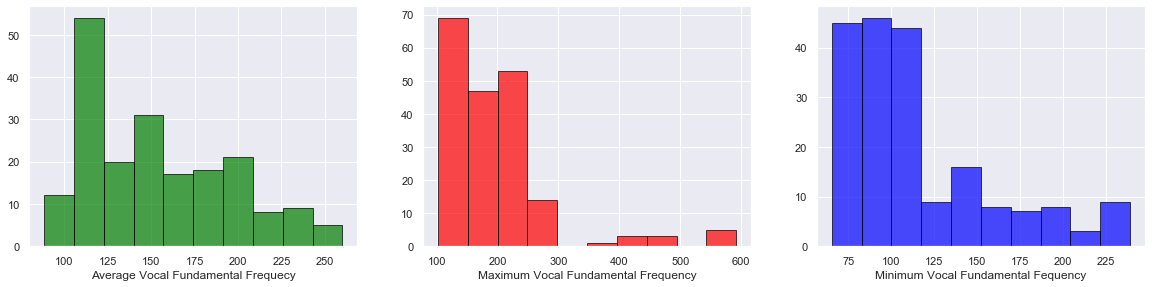

In [13]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.MDVP_Fo_Hz, color = 'green', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Average Vocal Fundamental Frequecy')

plt.subplot(3,3,2)
plt.hist(df.MDVP_Fhi_Hz, color = 'red', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Maximum Vocal Fundamental Frequency')

plt.subplot(3,3,3)
plt.hist(df.MDVP_Flo_Hz, color = 'blue', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Minimum Vocal Fundamental Fequency') ;

<font color = blue>
    
- Here, we have taken three features such as Average, Maximum and Minimum vocal fundamental frequencies measured. From the above histogram plot without KDE, it can be noticed that, all these three features are right skewed and the Gaussian Distribution curve for all these three features can be treated as bimodal or multimodal, though the order of modality is comparatively very less.

Text(0.5, 0, 'Minimum Vocal Fundamental Fequency')

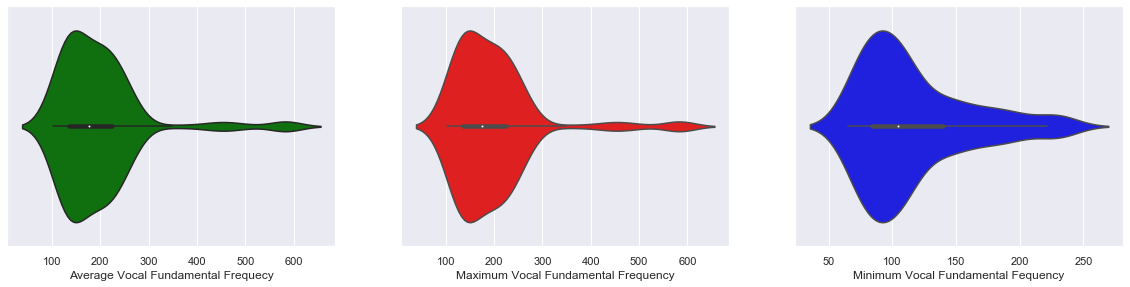

In [14]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.violinplot(df['MDVP_Fhi_Hz'], color = 'green')
plt.xlabel('Average Vocal Fundamental Frequecy')

plt.subplot(3,3,2)
sns.violinplot(df['MDVP_Fhi_Hz'], color = 'red')
plt.xlabel('Maximum Vocal Fundamental Frequency')

plt.subplot(3,3,3)
sns.violinplot(df['MDVP_Flo_Hz'], color = 'blue')
plt.xlabel('Minimum Vocal Fundamental Fequency') 

<font color = blue>
    
- The violin plots shown above are drawn for the Average, Maximum and Minimum vocal fundamental frequencies. This plot is the vertical mirror image of the distribution plot. This curve is much more helpful to check the multimodal nature of distribution or KDE compare to box plot or bar plot. The centre point is the median value of the feature and the line (Black) is the 95% interval for that feature. The thick line here indicates the interquartile range which contains 50% of the data. Thus, by comparing these three features, it can be inferred that, the minimum vocal fundamental frequency has high spread with more values and has a large confidence interval. The spread in all these three columns shows the skewness of the data points towards right.  

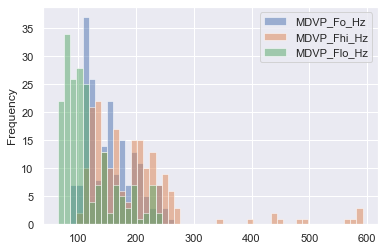

In [15]:
fund_frq_col = ['MDVP_Fo_Hz','MDVP_Fhi_Hz', 'MDVP_Flo_Hz']
df[fund_frq_col].plot.hist(alpha=0.5,bins=50);

<font color = blue>
    
- The above graph shows a comparative view of ranges between Average, Maximum and minimum vocal fundamental frequency.
    
- It is to be noted that, Maximum vocal fundamental frequency has a very high range compared to other two.


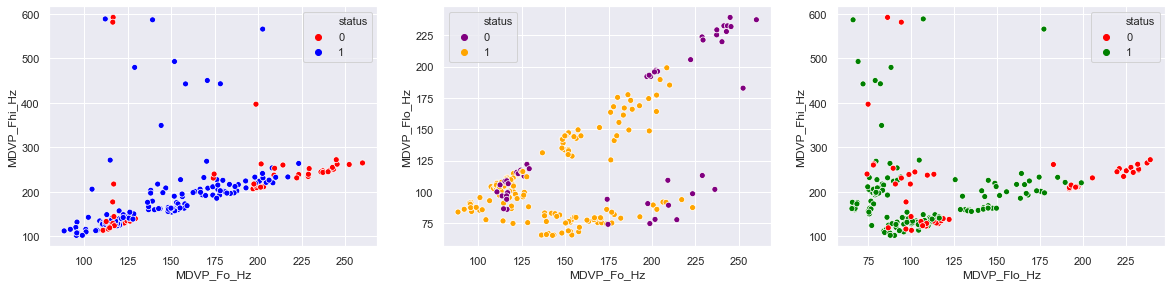

In [16]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.scatterplot(df.MDVP_Fo_Hz, df.MDVP_Fhi_Hz, hue = df.status, palette = ['red', 'blue'])

plt.subplot(3,3,2)
sns.scatterplot(df.MDVP_Fo_Hz, df.MDVP_Flo_Hz, hue = df.status, palette = ['purple', 'orange'])

plt.subplot(3,3,3)
sns.scatterplot(df.MDVP_Flo_Hz, df.MDVP_Fhi_Hz, hue = df.status, palette = ['red', 'green']);

- Presence of outliers can be observed form the above scatter plot among all the measure of vocal fundamental frequencies. The correlation among some of the features are quit insignificant in nature and has very less influence on each other.

<font color = green>

### Univariate Analysis on several measures of variation in Fundamental frequencies such as 

MDVP_Jitter_per: MDVP Jitter in Percentage
MDVP_Jitter_Abs: MDVP Jitter in Absolute value
MDVP_RAP: MDVP relative amplitude perturbation
MDVP_PPQ: MDVP period perturbation quotient
Jitter_DDP: Average absolute difference of differences between jitter cycles

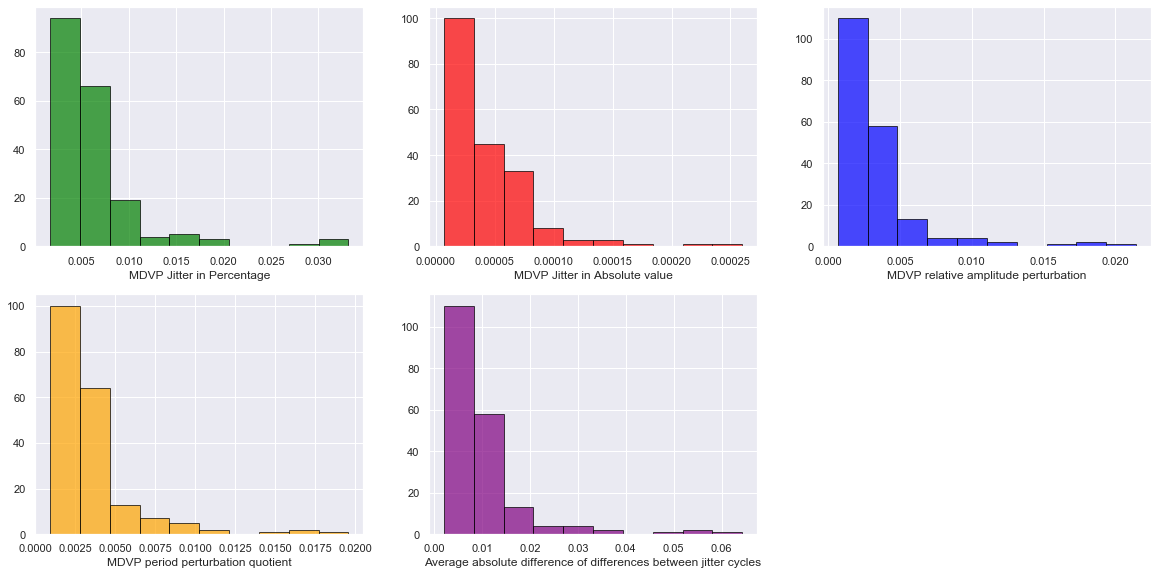

In [17]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.MDVP_Jitter_per, color = 'green', edgecolor = 'black', alpha = 0.7);
plt.xlabel('MDVP Jitter in Percentage')

plt.subplot(3,3,2)
plt.hist(df.MDVP_Jitter_Abs, color = 'red', edgecolor = 'black', alpha = 0.7);
plt.xlabel('MDVP Jitter in Absolute value')

plt.subplot(3,3,3)
plt.hist(df.MDVP_RAP, color = 'blue', edgecolor = 'black', alpha = 0.7);
plt.xlabel('MDVP relative amplitude perturbation') 

plt.subplot(3,3,4)
plt.hist(df.MDVP_PPQ, color = 'orange', edgecolor = 'black', alpha = 0.7);
plt.xlabel('MDVP period perturbation quotient') 

plt.subplot(3,3,5)
plt.hist(df.Jitter_DDP, color = 'purple', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Average absolute difference of differences between jitter cycles'); 

<font color = blue>
    
- Here, we have taken five features which give us several measures of variation in fundamental frequency. From the above histogram plot, it can be noticed that, all these five features are right skewed and the Gaussian Distribution curve for all these three features can be treated as bimodal or multimodal, though the order of modality is comparatively very less.

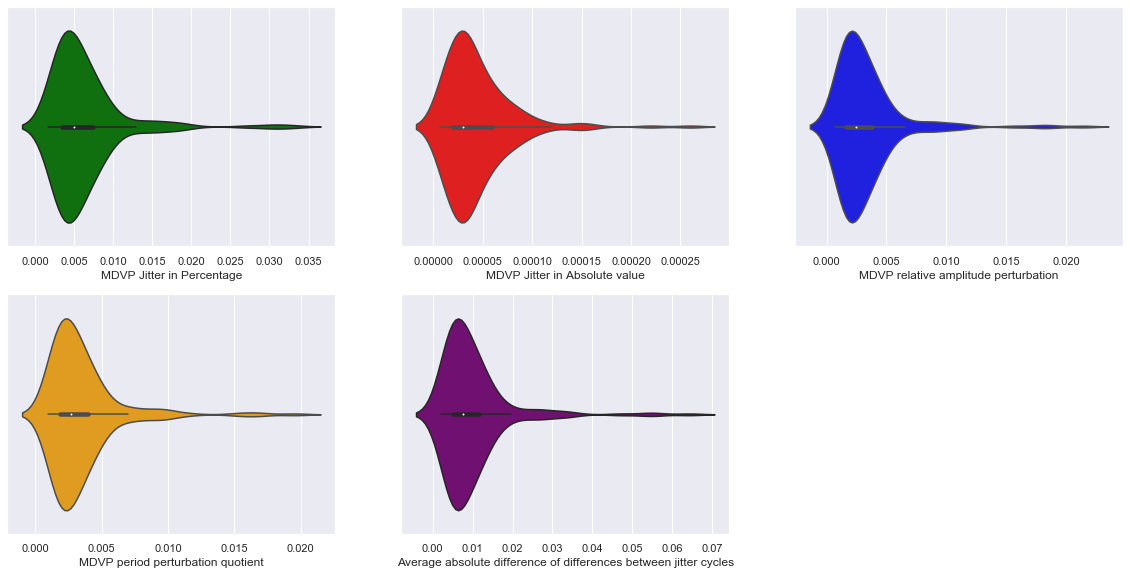

In [18]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.violinplot(df['MDVP_Jitter_per'], color = 'green')
plt.xlabel('MDVP Jitter in Percentage')

plt.subplot(3,3,2)
sns.violinplot(df['MDVP_Jitter_Abs'], color = 'red')
plt.xlabel('MDVP Jitter in Absolute value')

plt.subplot(3,3,3)
sns.violinplot(df['MDVP_RAP'], color = 'blue')
plt.xlabel('MDVP relative amplitude perturbation') 


plt.subplot(3,3,4)
sns.violinplot(df['MDVP_PPQ'], color = 'orange')
plt.xlabel('MDVP period perturbation quotient') 

plt.subplot(3,3,5)
sns.violinplot(df['Jitter_DDP'], color = 'purple')
plt.xlabel('Average absolute difference of differences between jitter cycles') ;

<font color = blue>
    
- The violin plots shown above are drawn for the several measures of variation in fundamental frequencies. This plot is the vertical mirror image of the distribution plot. This curve is much more helpful to check the multimodal nature of distribution or KDE compare to box plot or bar plot. The centre point is the median value of the feature and the line (Black) is the 95% interval for that feature. The thick line here indicates the interquartile range which contains 50% of the data. Thus, by comparing these five features, it can be inferred that, all the measure of variations in fundamental frequency spread towards right and has a large confidence interval. Hence, Though the values or observations are different in each column, the spread in all these five columns shows the skewness of the data points towards right.  

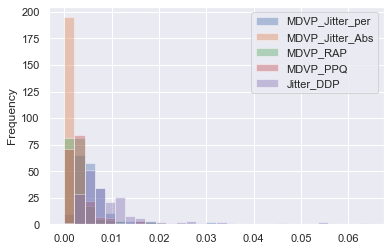

In [19]:
fund_freq_meas = ['MDVP_Jitter_per','MDVP_Jitter_Abs','MDVP_RAP','MDVP_PPQ','Jitter_DDP' ]
df[fund_freq_meas].plot.hist(alpha=0.4, bins = 30);

- The above graph shows a comparative view of ranges of several measures of variation in fundamental frequency.
- Absolute value of MDVP jitter has highest frequency, however, the range of all the frequencies are almost equal

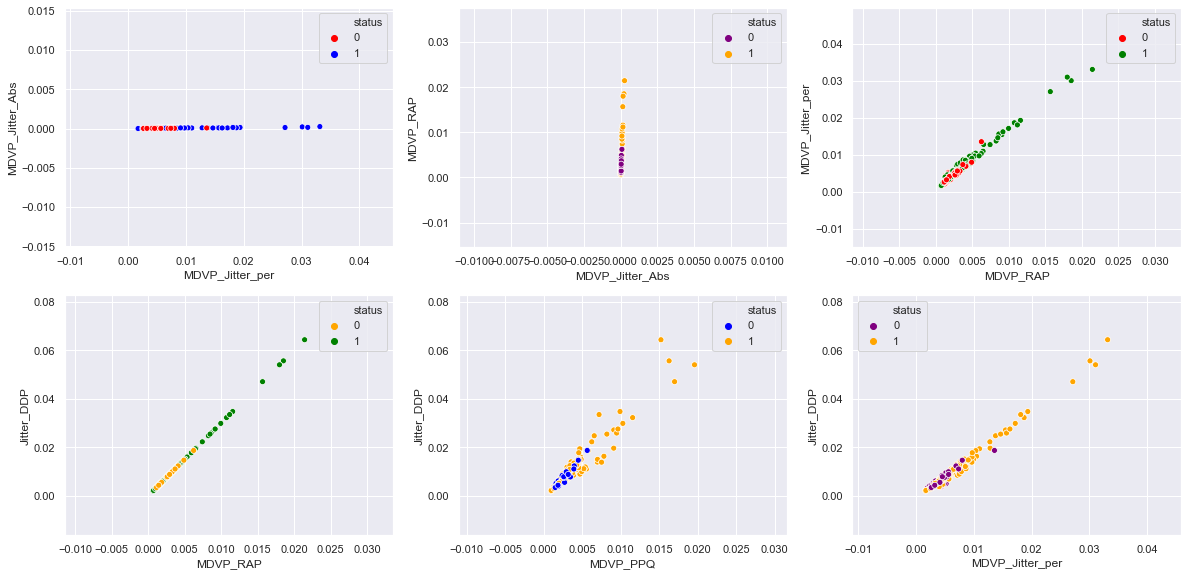

In [20]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.scatterplot(df.MDVP_Jitter_per, df.MDVP_Jitter_Abs, hue = df.status, palette = ['red', 'blue'])

plt.subplot(3,3,2)
sns.scatterplot(df.MDVP_Jitter_Abs, df.MDVP_RAP, hue = df.status, palette = ['purple', 'orange'])

plt.subplot(3,3,3)
sns.scatterplot(df.MDVP_RAP, df.MDVP_Jitter_per, hue = df.status, palette = ['red', 'green']);

plt.subplot(3,3,4)
sns.scatterplot(df.MDVP_RAP, df.Jitter_DDP, hue = df.status, palette = ['orange', 'green']);

plt.subplot(3,3,5)
sns.scatterplot(df.MDVP_PPQ, df.Jitter_DDP, hue = df.status, palette = ['blue', 'orange']);

plt.subplot(3,3,6)
sns.scatterplot(df.MDVP_Jitter_per, df.Jitter_DDP, hue = df.status, palette = ['purple', 'orange']);

<font color = blue>

- The above plot shows us the correlation between multiple columns. Features like MDVP_RAP, Jitter_DDP, MDVP_Jitter_Abs ets. have a very good correlaion among them. it means they directly affect ech other and one represents another.
    
- The correlation between MDVP_Jitter_Abs and MDVP_RAP is quit unique in nature. Means MDVP_Jitter_abs has no effect on MDVP_RAP. 

<font color = green>

### Univariate Analysis on several measures of variation in Amplitude such as 


MDVP_Shimmer:MDVP local shimmer,
MDVP_Shimmer_dB:MDVP local shimmer in dB,
Shimmer_APQ3: Three-point amplitude perturbation quotient,
Shimmer_APQ5: Five-point amplitude perturbation quotient,
MDVP_APQ:MDVP amplitude perturbation quotient,
Shimmer_DDA:Average absolute differences between the amplitudes of consecutive periods

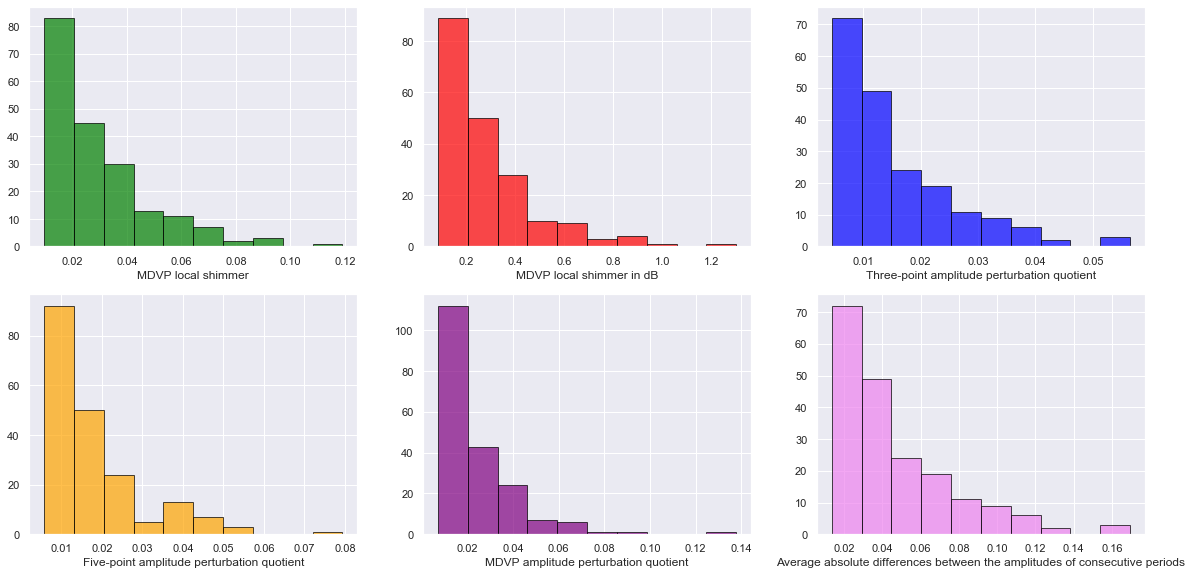

In [21]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.MDVP_Shimmer, color = 'green', edgecolor = 'black', alpha = 0.7);
plt.xlabel('MDVP local shimmer')

plt.subplot(3,3,2)
plt.hist(df.MDVP_Shimmer_dB, color = 'red', edgecolor = 'black', alpha = 0.7);
# sns.distplot(df['MDVP_Fhi_Hz'], color = 'red')
plt.xlabel('MDVP local shimmer in dB')

plt.subplot(3,3,3)
plt.hist(df.Shimmer_APQ3, color = 'blue', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Three-point amplitude perturbation quotient') 

plt.subplot(3,3,4)
plt.hist(df.Shimmer_APQ5, color = 'orange', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Five-point amplitude perturbation quotient') 

plt.subplot(3,3,5)
plt.hist(df.MDVP_APQ, color = 'purple', edgecolor = 'black', alpha = 0.7);
plt.xlabel('MDVP amplitude perturbation quotient') 

plt.subplot(3,3,6)
plt.hist(df.Shimmer_DDA, color = 'violet', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Average absolute differences between the amplitudes of consecutive periods') ;

<font color = blue>
    
- Here, we have taken six features of several measures of variation in amplitude. From the above histogram plot without KDE, it can be noticed that, all these features are right skewed and the Gaussian Distribution curve for all these three features can be treated as bimodal or multimodal, though the order of modality is comparatively very less. The column Shimmer_DDA and Shimmer_APQ3 have a good amount of spread towards right.

Text(0.5, 0, 'Average absolute differences between the amplitudes of consecutive periods')

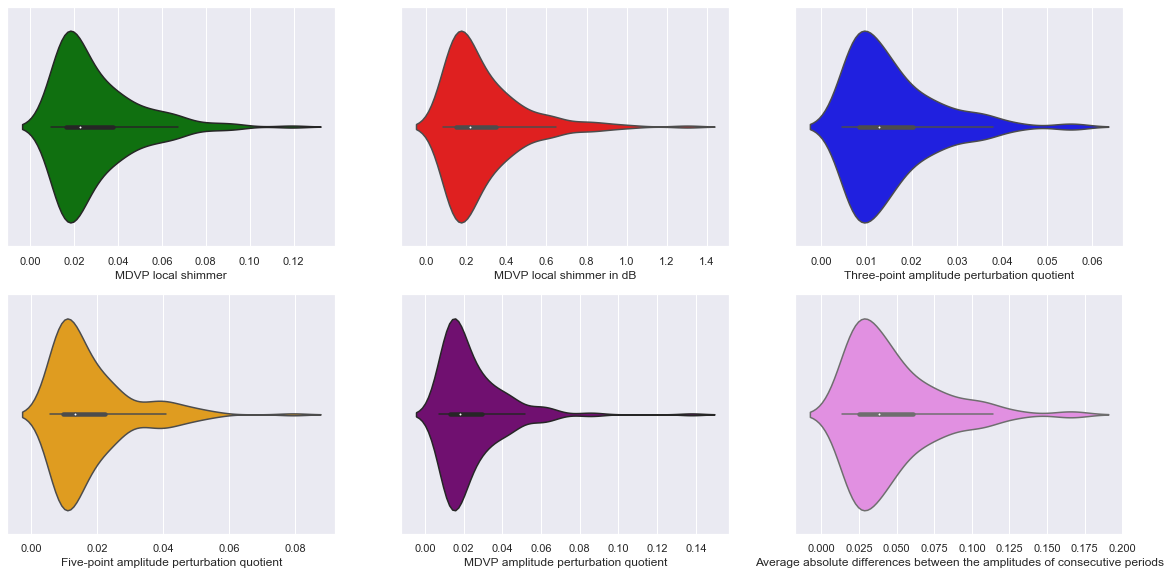

In [22]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.violinplot(df['MDVP_Shimmer'], color = 'green');
plt.xlabel('MDVP local shimmer')

plt.subplot(3,3,2)
sns.violinplot(df['MDVP_Shimmer_dB'], color = 'red');
plt.xlabel('MDVP local shimmer in dB')

plt.subplot(3,3,3)
sns.violinplot(df['Shimmer_APQ3'], color = 'blue');
plt.xlabel('Three-point amplitude perturbation quotient') 

plt.subplot(3,3,4)
sns.violinplot(df['Shimmer_APQ5'], color = 'orange');
plt.xlabel('Five-point amplitude perturbation quotient') 

plt.subplot(3,3,5)
sns.violinplot(df['MDVP_APQ'], color = 'purple');
plt.xlabel('MDVP amplitude perturbation quotient') 

plt.subplot(3,3,6)
sns.violinplot(df['Shimmer_DDA'], color = 'violet')
plt.xlabel('Average absolute differences between the amplitudes of consecutive periods') 

<font color = blue>
    
- The violin plots shown above are drawn for the several measures of variation in Amplitude. This plot is the vertical mirror image of the distribution plot. The area under the curve is much more helpful to check the multimodal nature of distribution or KDE compare to box plot or bar plot. The centre point is the median value of the feature and the line (Black) is the 95% interval for that feature. The thick line here indicates the interquartile range which contains 50% of the data. Thus, by comparing these six features, it can be inferred that, all the measure of variations in fundamental frequency spread towards right and has a large confidence interval. Though the values or observations are different in each column, the spread in all these six columns shows the skewness of the data points towards right.

<font color = green>

### Univariate Analysis on various features such as 

    
NHR:Noise-to-harmonics ratio, 
HNR:Harmonics-to-noise ratio,
RPDE:Recurrence period density entropy measure, 
DFA:Signal fractal scaling exponent of detrended fluctuation analysis,
spread1:Two nonlinear measures of fundamental,
spread2:Frequency variation,
D2:Correlation dimension,
PPE:Pitch period entropy

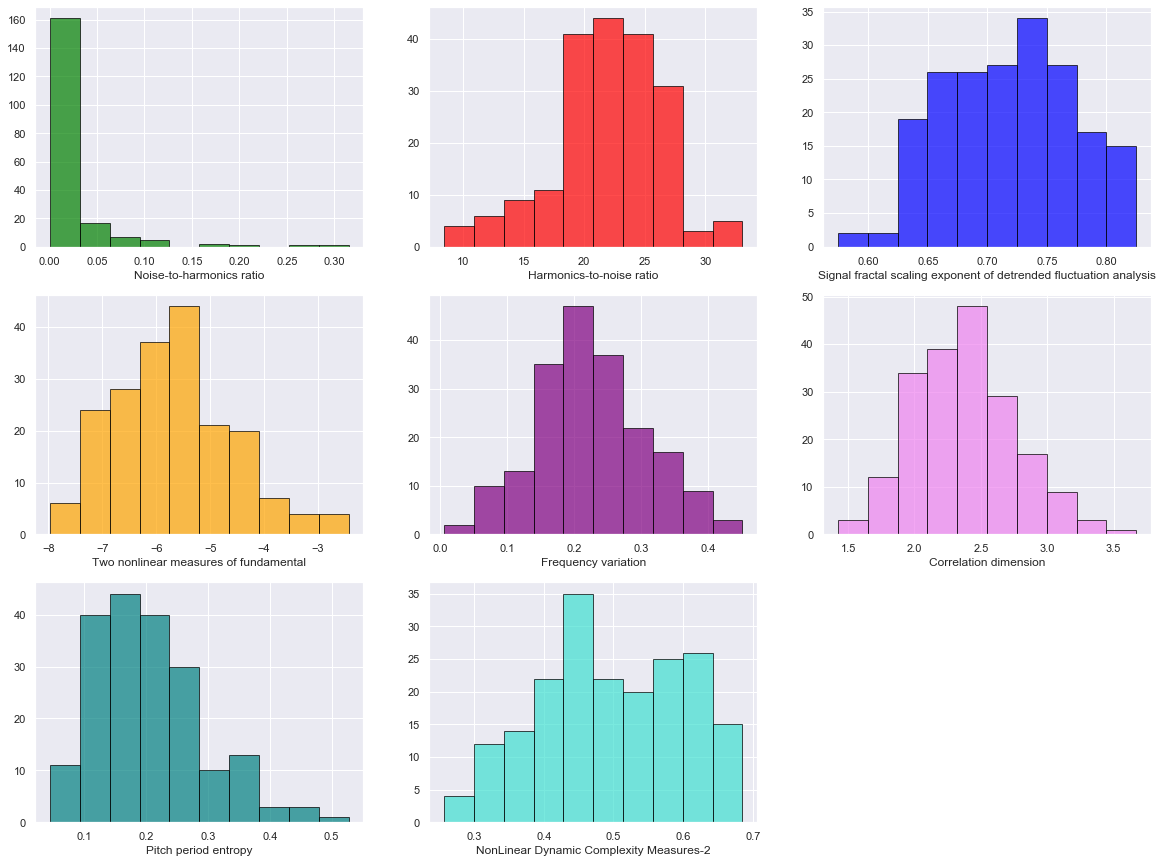

In [23]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.NHR, color = 'green', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Noise-to-harmonics ratio')

plt.subplot(3,3,2)
plt.hist(df.HNR, color = 'red', edgecolor = 'black', alpha = 0.7);
# sns.distplot(df['MDVP_Fhi_Hz'], color = 'red')
plt.xlabel('Harmonics-to-noise ratio')

plt.subplot(3,3,3)
plt.hist(df.DFA, color = 'blue', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Signal fractal scaling exponent of detrended fluctuation analysis') 

plt.subplot(3,3,4)
plt.hist(df.spread1, color = 'orange', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Two nonlinear measures of fundamental') 

plt.subplot(3,3,5)
plt.hist(df.spread2, color = 'purple', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Frequency variation') 

plt.subplot(3,3,6)
plt.hist(df.D2, color = 'violet', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Correlation dimension') 

plt.subplot(3,3,7)
plt.hist(df.PPE, color = 'teal', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Pitch period entropy') 

plt.subplot(3,3,8)
plt.hist(df.RPDE, color = 'turquoise', edgecolor = 'black', alpha = 0.7);
plt.xlabel('NonLinear Dynamic Complexity Measures-2');

<font color = blue>
    
- Here, we have ploted frequency plot/distribution plot various features such as for non linear dynamically complexity measures, nonlinear measures of fundamental frequencies, Signal Fractal Scaling Component, Noise to Harmonics ratio and Harmonics to noise ratio etc... From the above histogram plot with KDE, it can be noticed that, all column NHR is right skewed and the Gaussian Distribution curve for this feature can be treated as unimodal. rest of the columns shows us either a bimodal or multimodal Gaussian Distribution curve, though the order of modality is varies for all.

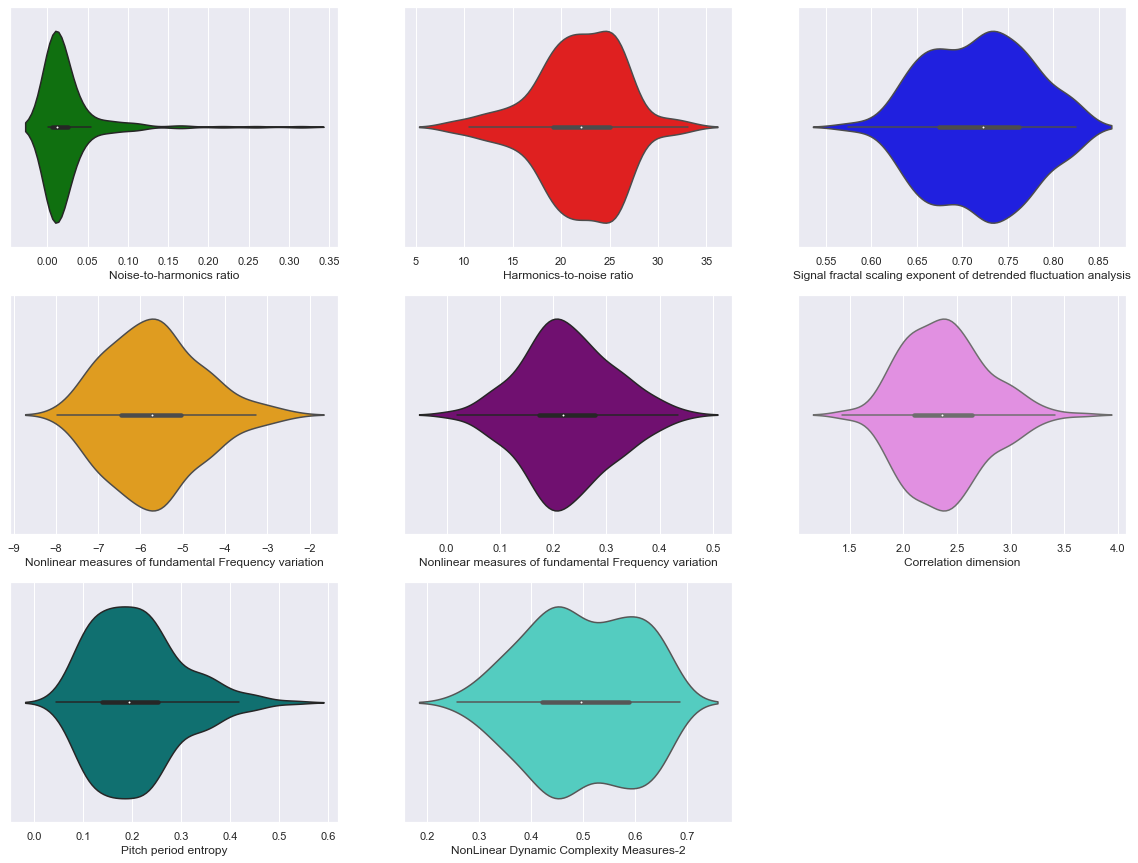

In [24]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
# plt.hist(df.NHR, color = 'green', edgecolor = 'black', alpha = 0.7);
sns.violinplot(df['NHR'], color = 'green')
plt.xlabel('Noise-to-harmonics ratio')

plt.subplot(3,3,2)
# plt.hist(df.HNR, color = 'red', edgecolor = 'black', alpha = 0.7);
sns.violinplot(df['HNR'], color = 'red')
plt.xlabel('Harmonics-to-noise ratio')

plt.subplot(3,3,3)
# plt.hist(df.DFA, color = 'blue', edgecolor = 'black', alpha = 0.7);
sns.violinplot(df['DFA'], color = 'blue')
plt.xlabel('Signal fractal scaling exponent of detrended fluctuation analysis') 

plt.subplot(3,3,4)
# plt.hist(df.spread1, color = 'orange', edgecolor = 'black', alpha = 0.7);
sns.violinplot(df['spread1'], color = 'orange')
plt.xlabel('Nonlinear measures of fundamental Frequency variation') 

plt.subplot(3,3,5)
# plt.hist(df.spread2, color = 'purple', edgecolor = 'black', alpha = 0.7);
sns.violinplot(df['spread2'], color = 'purple')
plt.xlabel('Nonlinear measures of fundamental Frequency variation') 

plt.subplot(3,3,6)
# plt.hist(df.D2, color = 'violet', edgecolor = 'black', alpha = 0.7);
sns.violinplot(df['D2'], color = 'violet')
plt.xlabel('Correlation dimension') 

plt.subplot(3,3,7)
sns.violinplot(df['PPE'], color = 'teal')
plt.xlabel('Pitch period entropy') 

plt.subplot(3,3,8)
sns.violinplot(df['RPDE'], color = 'turquoise')
plt.xlabel('NonLinear Dynamic Complexity Measures-2');

<font color = blue>
    
- The violin plots shown above are drawn for non linear dynamically complexity measures, nonlinear measures of fundamental frequencies, Signal Fractal Scaling Component, Noise to Harmonics ratio and Harmonics to noise ratio. This plot is the vertical mirror image of the distribution plot. This curve is much more helpful to check the multimodal nature of distribution or KDE compare to box plot or bar plot. The centre point is the median value of the feature and the line (Black) is the 95% interval for that feature. The thick line here indicates the interquartile range which contains 50% of the data. Thus, by comparing these features, it can be inferred that, all the measure of variations has a different spread, some are towards right and some are centered with a large confidence interval. Though the values or observations are different in each column, the spread in all these columns shows an interesting pattern of skewness, columns like NHR, PPE and Spread1 have the data points towards right skewed. Columns like non linear dynamic complexity (RPDE), spread2 are symmetric data point distribution. HNR column is some how left skewed. 

<font color = purple>
    
- The skewness of all the columns can be checked, below written code gives us the skewness of all the columns.

In [25]:
# for doing statistical calculation
import scipy
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import scipy.stats as stats
from scipy.stats import skew

# Preparing a pandas dataframe to store the skewness of each column.
Skewness = pd.DataFrame({'Skewness': [stats.skew(df.MDVP_Fo_Hz), stats.skew(df.MDVP_Fhi_Hz), stats.skew(df.MDVP_Flo_Hz),
                                     stats.skew(df.MDVP_Jitter_per), stats.skew(df.MDVP_Jitter_Abs), stats.skew(df.MDVP_RAP),
                                      stats.skew(df.MDVP_PPQ), stats.skew(df.Jitter_DDP), stats.skew(df.MDVP_Shimmer),
                                      stats.skew(df.MDVP_Shimmer_dB), stats.skew(df.Shimmer_APQ3), stats.skew(df.Shimmer_APQ5),
                                      stats.skew(df.MDVP_APQ), stats.skew(df.Shimmer_DDA), stats.skew(df.NHR), stats.skew(df.HNR),
                                      stats.skew(df.RPDE), stats.skew(df.DFA), stats.skew(df.spread1),
                                      stats.skew(df.spread2), stats.skew(df.D2), stats.skew(df.PPE)]}, 
                        index = ['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per','MDVP_Jitter_Abs', 'MDVP_RAP', 
                                 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer','MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 
                                 'MDVP_APQ','Shimmer_DDA','NHR', 'HNR','RPDE','DFA','spread1','spread2', 'D2','PPE'])
Skewness

Skewness
MDVP_Fo_Hz       0.587176
MDVP_Fhi_Hz      2.522549
MDVP_Flo_Hz      1.207966
MDVP_Jitter_per  3.061165
MDVP_Jitter_Abs  2.628650
MDVP_RAP         3.334801
MDVP_PPQ         3.050196
Jitter_DDP       3.336141
MDVP_Shimmer     1.653634
MDVP_Shimmer_dB  1.983976
Shimmer_APQ3     1.568392
Shimmer_APQ5     1.784831
MDVP_APQ         2.597864
Shimmer_DDA      1.568433
NHR              4.188173
HNR             -0.510353
RPDE            -0.142297
DFA             -0.032958
spread1          0.428808
spread2          0.143317
D2               0.427066
PPE              0.791343

<font color = blue>

- NHR is highly right skewed, and HNR is highly left skewed among all the variables/features, this is because, both are reciprocal of each other

<font color = teal>

### * Now to check the presence of outliers, box plot can be drawn for independent continous variables

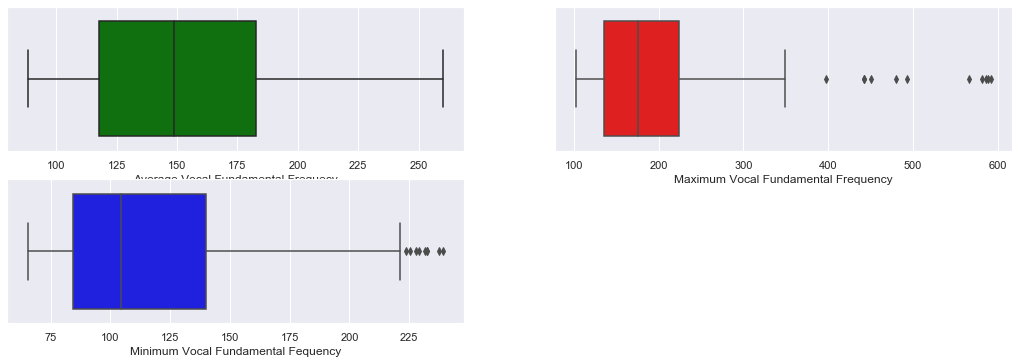

In [26]:
plt.figure(figsize = (18,9))

plt.subplot(3,2,1)
sns.boxplot(x= df.MDVP_Fo_Hz,  color='green')
plt.xlabel('Average Vocal Fundamental Frequecy')

plt.subplot(3,2,2)
sns.boxplot(x= df.MDVP_Fhi_Hz,  color='red')
plt.xlabel('Maximum Vocal Fundamental Frequency')

plt.subplot(3,2,3)
sns.boxplot(x= df.MDVP_Flo_Hz,  color='blue')
plt.xlabel('Minimum Vocal Fundamental Fequency') ;

<font color = blue>

- From the above drawn Box plot, it is noticed that, Average Vocal Frequency is free from outliers, however, Maximum and Minimum Vocal frequencies have outliers present in the dataset. and the range of spread of outliers is very high in case of Maximum Vocal frequency compared to Minimum 

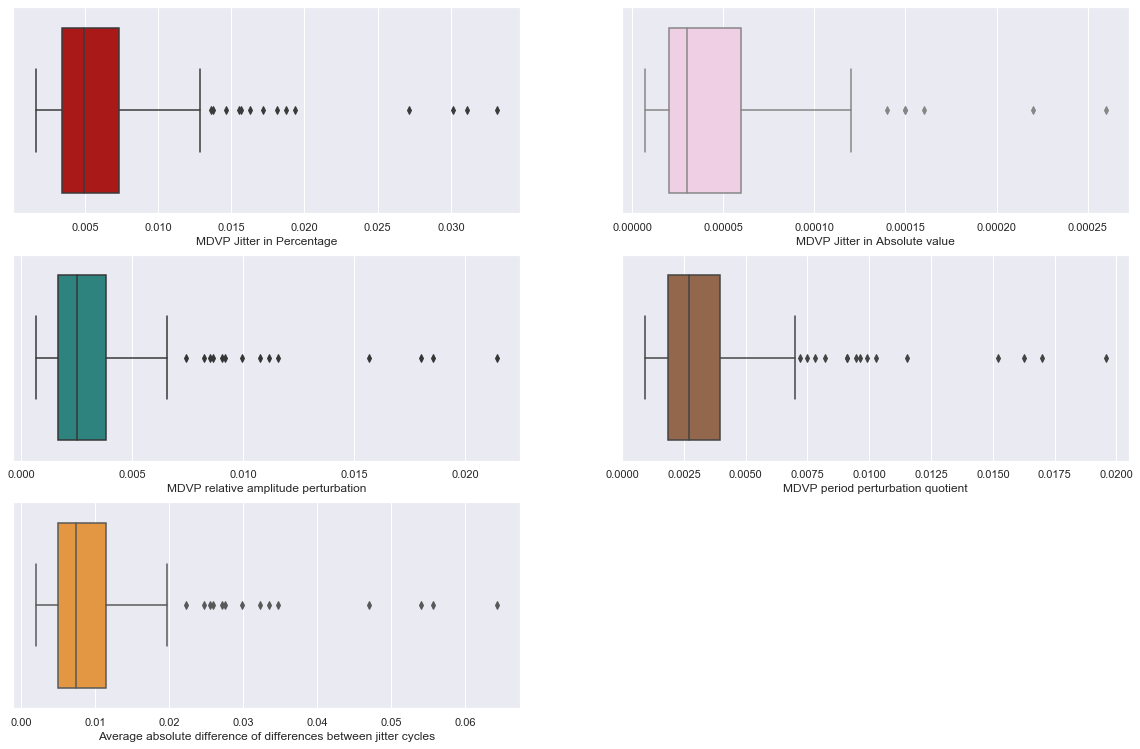

In [27]:
plt.figure(figsize = (20,22))

plt.subplot(5,2,1)
sns.boxplot(x= df.MDVP_Jitter_per,  palette = 'gist_heat')
plt.xlabel('MDVP Jitter in Percentage')

plt.subplot(5,2,2)
sns.boxplot(x= df.MDVP_Jitter_Abs,  palette = 'Pastel2_r')
plt.xlabel('MDVP Jitter in Absolute value')

plt.subplot(5,2,3)
sns.boxplot(x= df.MDVP_RAP,  palette = 'viridis')
plt.xlabel('MDVP relative amplitude perturbation') 

plt.subplot(5,2,4)
sns.boxplot(x= df.MDVP_PPQ,  palette = 'copper')
plt.xlabel('MDVP period perturbation quotient') 

plt.subplot(5,2,5)
sns.boxplot(x= df.Jitter_DDP,  palette = 'YlOrBr')
plt.xlabel('Average absolute difference of differences between jitter cycles');


<font color = blue>

- All the measures of variation in fundamental frequency can be seen as victim of outliers. in some of the case, the range or spread of outliers is observed to be less, however, the presence of huge amount of outliers can be seen in all.

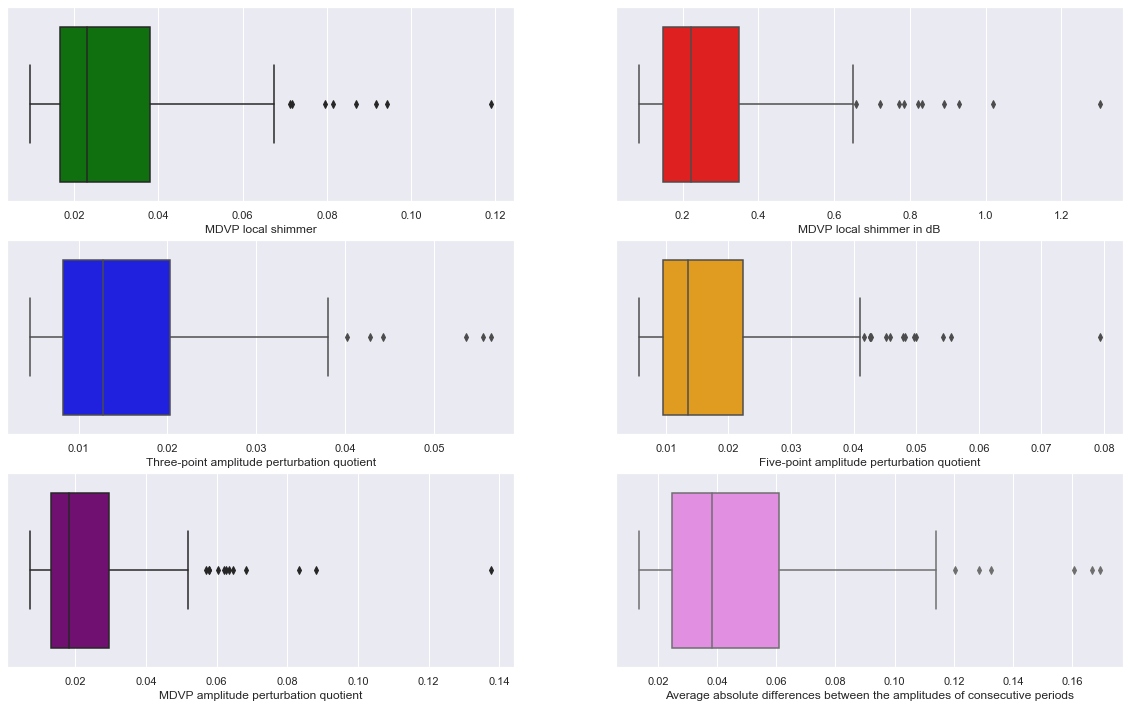

In [28]:
plt.figure(figsize = (20,25))

plt.subplot(6,2,1)
sns.boxplot(x= df.MDVP_Shimmer,color = 'green');
plt.xlabel('MDVP local shimmer')

plt.subplot(6,2,2)
sns.boxplot(x= df.MDVP_Shimmer_dB, color = 'red');
plt.xlabel('MDVP local shimmer in dB')

plt.subplot(6,2,3)
sns.boxplot(x= df.Shimmer_APQ3, color = 'blue');
plt.xlabel('Three-point amplitude perturbation quotient') 

plt.subplot(6,2,4)
sns.boxplot(x= df.Shimmer_APQ5, color = 'orange');
plt.xlabel('Five-point amplitude perturbation quotient') 

plt.subplot(6,2,5)
sns.boxplot(x= df.MDVP_APQ, color = 'purple');
plt.xlabel('MDVP amplitude perturbation quotient') 

plt.subplot(6,2,6)
sns.boxplot(x= df.Shimmer_DDA, color = 'violet')
plt.xlabel('Average absolute differences between the amplitudes of consecutive periods');

<font color = blue>

- From the above boxplot shown for several measures of variation in amplitude also indicates the presence of outliers in each feature. However, a little difference in spread of outliers can be observed while comparing each features.

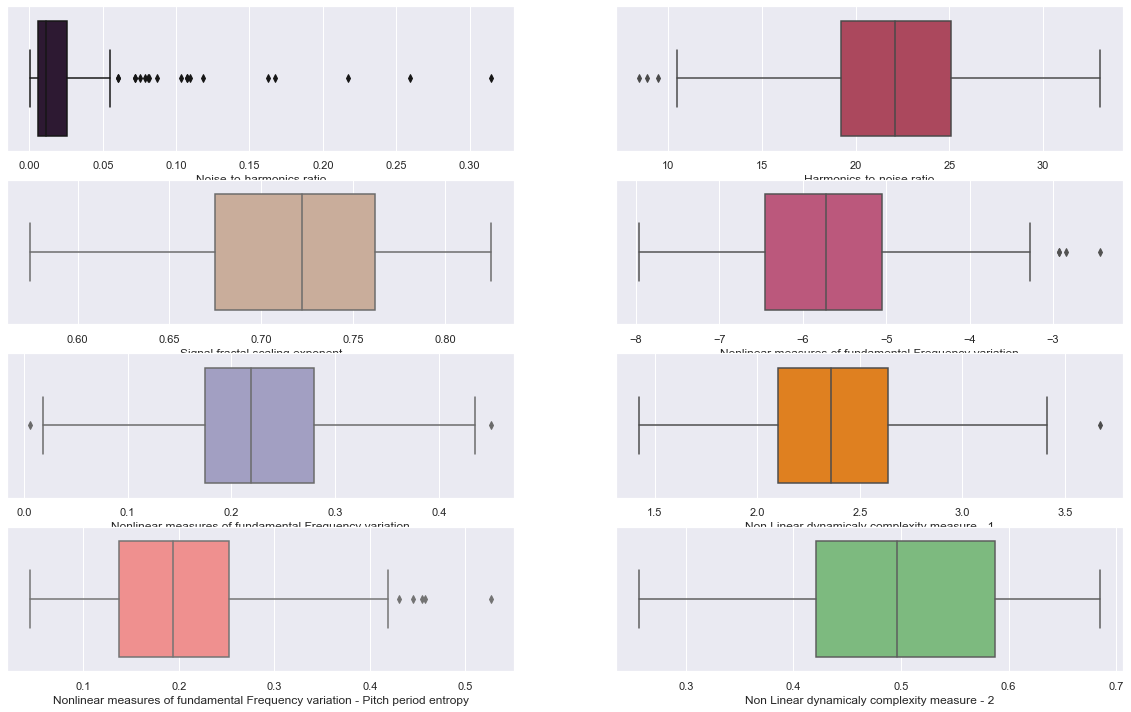

In [29]:
plt.figure(figsize = (20,25))

plt.subplot(8,2,1)
sns.boxplot(x= df.NHR,  palette = 'twilight')
plt.xlabel('Noise-to-harmonics ratio')

plt.subplot(8,2,2)
sns.boxplot(x= df.HNR,  palette = 'inferno')
plt.xlabel('Harmonics-to-noise ratio')

plt.subplot(8,2,3)
sns.boxplot(x= df.DFA,  palette = 'pink')
plt.xlabel('Signal fractal scaling exponent') 

plt.subplot(8,2,4)
sns.boxplot(x= df.spread1,  palette = 'plasma')
plt.xlabel('Nonlinear measures of fundamental Frequency variation') 

plt.subplot(8,2,5)
sns.boxplot(x= df.spread2,  palette = 'Purples')
plt.xlabel('Nonlinear measures of fundamental Frequency variation') 

plt.subplot(8,2,6)
sns.boxplot(x= df.D2,  palette = 'autumn')
plt.xlabel('Non Linear dynamicaly complexity measure - 1') 

plt.subplot(8,2,7)
sns.boxplot(x= df.PPE,  palette = 'spring')
plt.xlabel('Nonlinear measures of fundamental Frequency variation - Pitch period entropy') ;

plt.subplot(8,2,8)
sns.boxplot(x= df.RPDE,  palette = 'Greens')
plt.xlabel('Non Linear dynamicaly complexity measure - 2') ;

<font color = blue>

- From the above boxplot, it can be observed that, very less features are being affected by outliers, and the range of those outliers are quit less compared to the features shown before.
    
    
- The presence of outliers have been observed in almost all features except one or two, the outliers can be treated with the help of Z-score and median values can be implimented to gain the accuracy in later stage. 

In [30]:
# Checking the value of counts for Status of PD
pd.value_counts(df['status'])

1    147
0     48
Name: status, dtype: int64

<font color = blue>
- The dataset is looking to be unbalanced since, there is no uniform distibution between two classes of status..

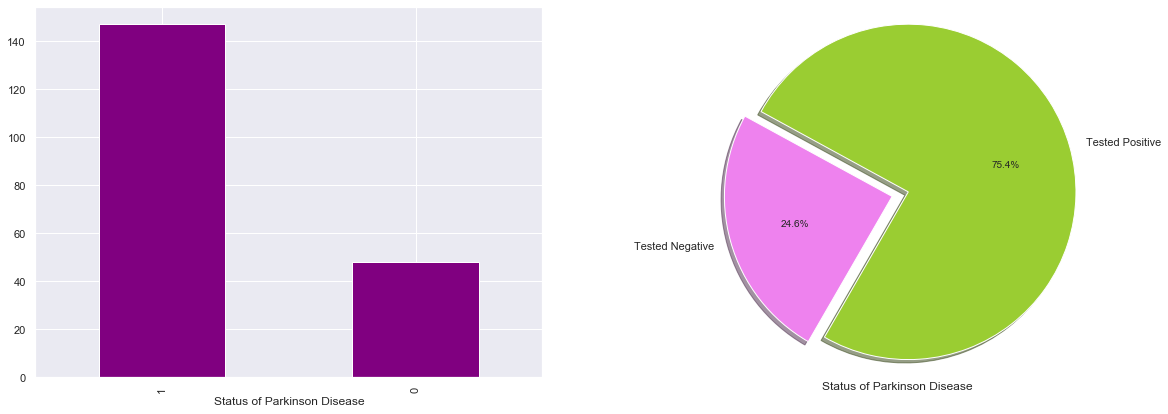

Number of Patients affected by Parkinson Dieses: 147 (75.38%)
Number of Healthy Patients: 48 (24.62%)


In [31]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)

pd.value_counts(df['status']).plot(kind = 'bar', color = 'purple'); # to plot a bar chart
plt.xlabel('Status of Parkinson Disease');

plt.subplot(2,2,2)
# Data to plot
labels = 'Tested Positive', 'Tested Negative'
sizes = [147, 48]
colors = ['yellowgreen', 'violet']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels, colors=colors, # to plot a pie chart
autopct='%1.1f%%', shadow=True, startangle= - 120)
plt.xlabel('Status of Parkinson Disease');
plt.axis('equal')
plt.show()
n_true = len(df.loc[df['status'] == True])
n_false = len(df.loc[df['status'] == False])
print("Number of Patients affected by Parkinson Dieses: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Healthy Patients: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

In [32]:
df.groupby(['status']).count() 

name  MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  \
status                                                                
0         48          48           48           48               48   
1        147         147          147          147              147   

        MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  ...  \
status                                                                 ...   
0                    48        48        48          48            48  ...   
1                   147       147       147         147           147  ...   

        MDVP_APQ  Shimmer_DDA  NHR  HNR  RPDE  DFA  spread1  spread2   D2  PPE  
status                                                                          
0             48           48   48   48    48   48       48       48   48   48  
1            147          147  147  147   147  147      147      147  147  147  

[2 rows x 23 columns]

<font color = blue>
    
> 75.38% of patients are detected to be affected by PD and 24.62% of patients are not affected by PD
    
> This dataset is skewed in terms of target column, due to uneven distribution of patients having PD and not having PD.
    
> There are few records in class 0, i.e. patients who's health status is good and not affected by PD.
    
> And the main target or class of interest is to correctly identify the patients status on PD, through their voice recordings !
    
> Here we do not want to misclassify any patient preferablly patients who are affected by PD and detected or recognized as not affected by PD, i.e. we have to minimize the False Negative or Type II error to gain the maximum predection accuracy  and to save precious life.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.c. Multivariate analysis
<a id='MV'></a>

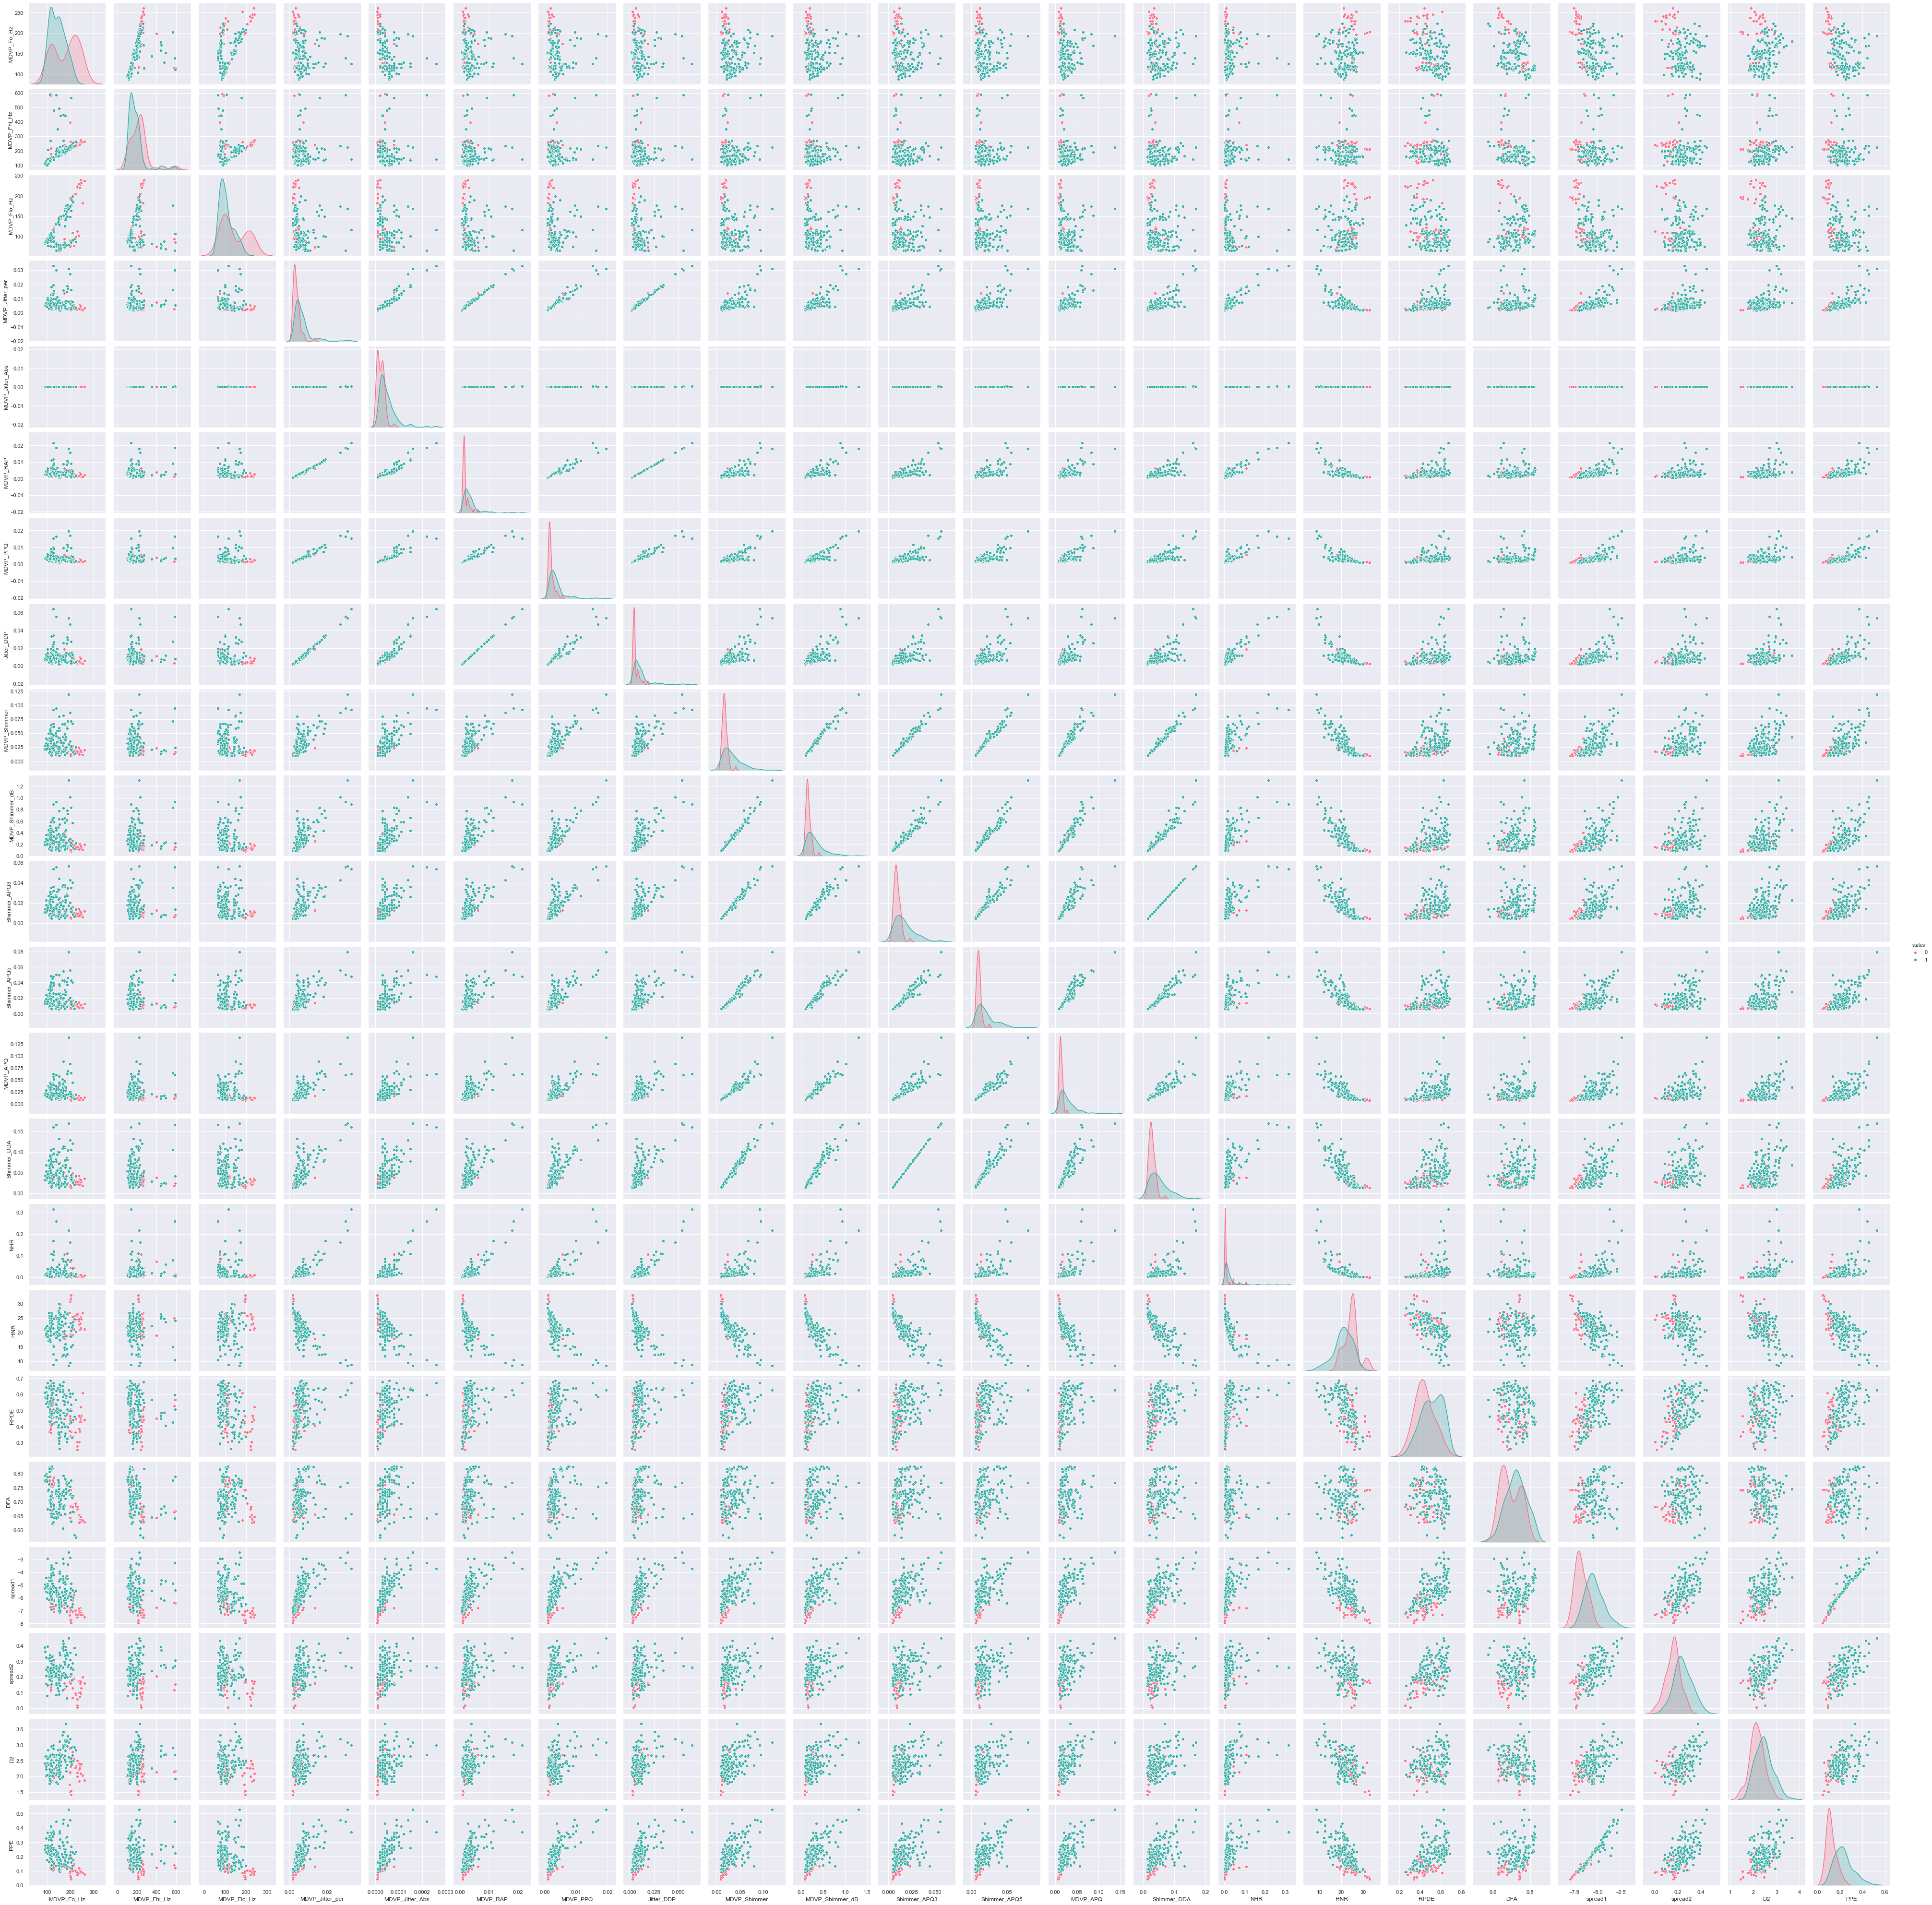

In [33]:
sns.pairplot(df, hue="status", palette="husl");

In [34]:
df.corr().T

MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  \
MDVP_Fo_Hz         1.000000     0.400985     0.596546        -0.118003   
MDVP_Fhi_Hz        0.400985     1.000000     0.084951         0.102086   
MDVP_Flo_Hz        0.596546     0.084951     1.000000        -0.139919   
MDVP_Jitter_per   -0.118003     0.102086    -0.139919         1.000000   
MDVP_Jitter_Abs   -0.382027    -0.029198    -0.277815         0.935714   
MDVP_RAP          -0.076194     0.097177    -0.100519         0.990276   
MDVP_PPQ          -0.112165     0.091126    -0.095828         0.974256   
Jitter_DDP        -0.076213     0.097150    -0.100488         0.990276   
MDVP_Shimmer      -0.098374     0.002281    -0.144543         0.769063   
MDVP_Shimmer_dB   -0.073742     0.043465    -0.119089         0.804289   
Shimmer_APQ3      -0.094717    -0.003743    -0.150747         0.746625   
Shimmer_APQ5      -0.070682    -0.009997    -0.101095         0.725561   
MDVP_APQ          -0.077774     0.004937    -0.107293         0.758255   
Shimmer_DDA       -0.094732    -0.003733    -0.150737         0.746635   
NHR               -0.021981     0.163766    -0.108670         0.906959   
HNR                0.059144    -0.024893     0.210851        -0.728165   
status            -0.383535    -0.166136    -0.380200         0.278220   
RPDE              -0.383894    -0.112404    -0.400143         0.360673   
DFA               -0.446013    -0.343097    -0.050406         0.098572   
spread1           -0.413738    -0.076658    -0.394857         0.693577   
spread2           -0.249450    -0.002954    -0.243829         0.385123   
D2                 0.177980     0.176323    -0.100629         0.433434   
PPE               -0.372356    -0.069543    -0.340071         0.721543   

                 MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  \
MDVP_Fo_Hz             -0.382027 -0.076194 -0.112165   -0.076213   
MDVP_Fhi_Hz            -0.029198  0.097177  0.091126    0.097150   
MDVP_Flo_Hz            -0.277815 -0.100519 -0.095828   -0.100488   
MDVP_Jitter_per         0.935714  0.990276  0.974256    0.990276   
MDVP_Jitter_Abs         1.000000  0.922911  0.897778    0.922913   
MDVP_RAP                0.922911  1.000000  0.957317    1.000000   
MDVP_PPQ                0.897778  0.957317  1.000000    0.957319   
Jitter_DDP              0.922913  1.000000  0.957319    1.000000   
MDVP_Shimmer            0.703322  0.759581  0.797826    0.759555   
MDVP_Shimmer_dB         0.716601  0.790652  0.839239    0.790621   
Shimmer_APQ3            0.697153  0.744912  0.763580    0.744894   
Shimmer_APQ5            0.648961  0.709927  0.786780    0.709907   
MDVP_APQ                0.648793  0.737455  0.804139    0.737439   
Shimmer_DDA             0.697170  0.744919  0.763592    0.744901   
NHR                     0.834972  0.919521  0.844604    0.919548   
HNR                    -0.656810 -0.721543 -0.731510   -0.721494   
status                  0.338653  0.266668  0.288698    0.266646   
RPDE                    0.441839  0.342140  0.333274    0.342079   
DFA                     0.175036  0.064083  0.196301    0.064026   
spread1                 0.735779  0.648328  0.716489    0.648328   
spread2                 0.388543  0.324407  0.407605    0.324377   
D2                      0.310694  0.426605  0.412524    0.426556   
PPE                     0.748162  0.670999  0.769647    0.671005   

                 MDVP_Shimmer  MDVP_Shimmer_dB  ...  Shimmer_DDA       NHR  \
MDVP_Fo_Hz          -0.098374        -0.073742  ...    -0.094732 -0.021981   
MDVP_Fhi_Hz          0.002281         0.043465  ...    -0.003733  0.163766   
MDVP_Flo_Hz         -0.144543        -0.119089  ...    -0.150737 -0.108670   
MDVP_Jitter_per      0.769063         0.804289  ...     0.746635  0.906959   
MDVP_Jitter_Abs      0.703322         0.716601  ...     0.697170  0.834972   
MDVP_RAP             0.759581         0.790652  ...     0.744919  0.919521   
MDVP_PPQ             0.797826         0.839239  ...     0.763

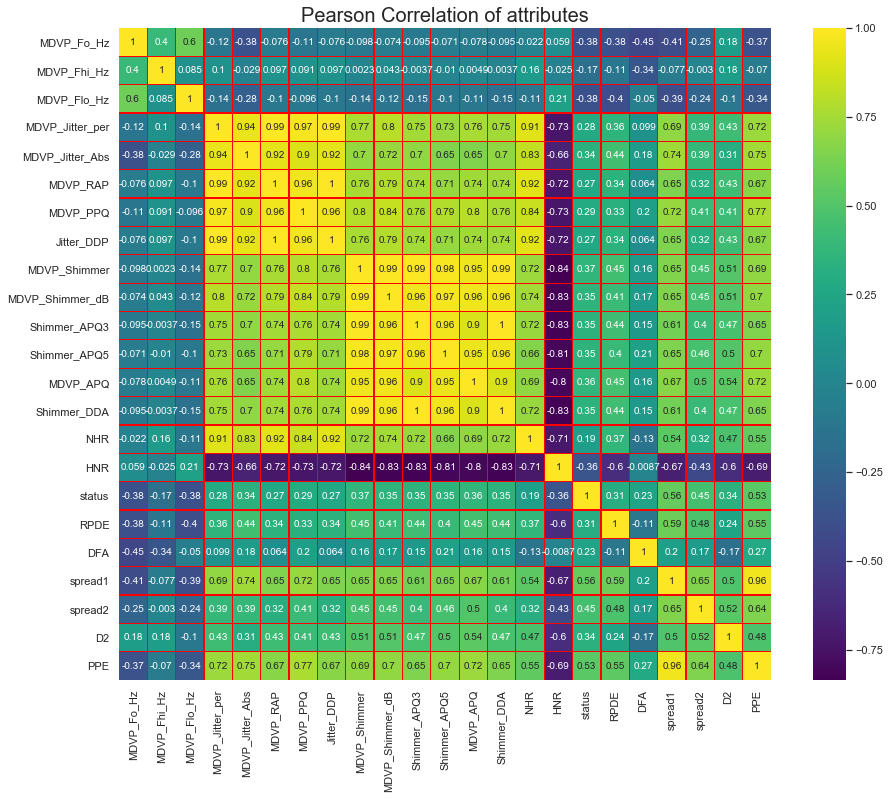

In [35]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (15,12))
plt.title('Pearson Correlation of attributes', y=1, size = 20)
sns.heatmap(df.corr(), linewidth = 0.2, vmax = 1.0,
           square = True,  cmap = colormap,linecolor = 'red', annot = True); 

## Comments:
<font color = blue>
    
- The correlation matrix between pairs of vocal measures is shown is above. It is noted that a number of vocal measures are highly correlated with the others, because some measures indicated the similar characteristics of the acoustic signals in the data set. They are highly correlated to each other in such way that, the individual effect of both columns will have same impact on the target column. These columns are highly dependent to each other and a small change in value of one column will affect another column in same way.

- The similar vocal measure groups are period perturbations (MDVP: Jitter (%), MDVP: Jitter (Abs), MDVP: RAP, MDVP: PPQ, Jitter: DDP), amplitude perturbations (MDVP: Shimmer, MDVP: Shimmer (dB), Shimmer: APQ3, Shimmer: APQ5, MDVP: APQ11, Shimmer: DDA), and nonlinear measures (DFA, PPE). In particular, the Shimmer: DDA and Shimmer: APQ3 measures exhibit completely collinear relationship (the correlation coefficient equal to 1).

- These highly correlated columns/ features with correlation value more than equal to 0.95 can be dropped off with proper hyper parameter tuning and feature engineering process.
        

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.d. Bivariate analysis (some intrinsic columns)
<a id='BV'></a>

### Let's check the target column distribution with the help of Scatter Plot

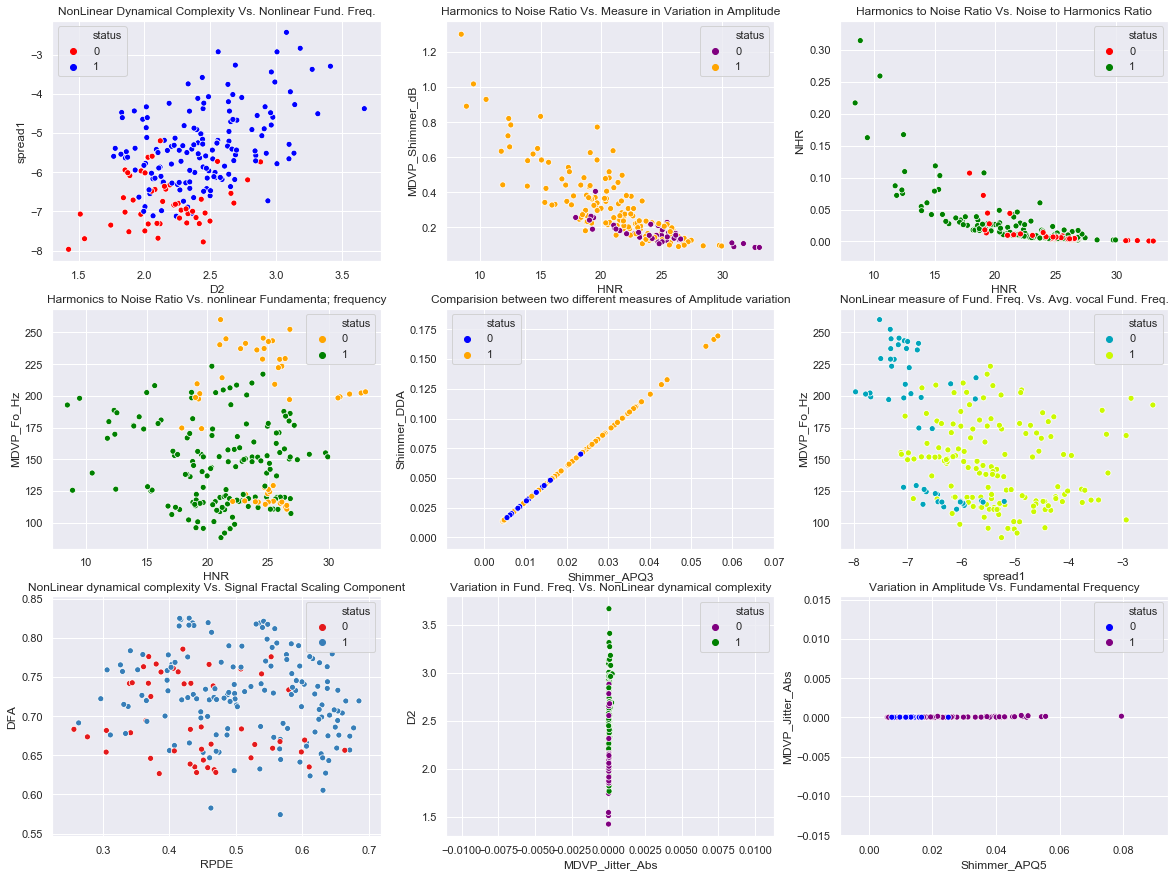

In [36]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.scatterplot(df.D2, df.spread1, hue = df.status, palette = ['red', 'blue'])
plt.title('NonLinear Dynamical Complexity Vs. Nonlinear Fund. Freq.');

plt.subplot(3,3,2)
sns.scatterplot(df.HNR, df.MDVP_Shimmer_dB, hue = df.status, palette = ['purple', 'orange'])
plt.title('Harmonics to Noise Ratio Vs. Measure in Variation in Amplitude');

plt.subplot(3,3,3)
sns.scatterplot(df.HNR, df.NHR, hue = df.status, palette = ['red', 'green']);
plt.title('Harmonics to Noise Ratio Vs. Noise to Harmonics Ratio');

plt.subplot(3,3,4)
sns.scatterplot(df.HNR, df.MDVP_Fo_Hz, hue = df.status, palette = ['orange', 'green']);
plt.title('Harmonics to Noise Ratio Vs. nonlinear Fundamenta; frequency');

plt.subplot(3,3,5)
sns.scatterplot(df.Shimmer_APQ3, df.Shimmer_DDA, hue = df.status, palette = ['blue', 'orange']);
plt.title('Comparision between two different measures of Amplitude variation');

plt.subplot(3,3,6)
sns.scatterplot(df.spread1, df.MDVP_Fo_Hz, hue = df.status, palette='nipy_spectral');
plt.title('NonLinear measure of Fund. Freq. Vs. Avg. vocal Fund. Freq.');

plt.subplot(3,3,7)
sns.scatterplot(df.RPDE, df.DFA, hue = df.status, palette='Set1');
plt.title('NonLinear dynamical complexity Vs. Signal Fractal Scaling Component');

plt.subplot(3,3,8)
sns.scatterplot(df.MDVP_Jitter_Abs, df.D2, hue = df.status, palette = ['purple', 'green']);
plt.title('Variation in Fund. Freq. Vs. NonLinear dynamical complexity');

plt.subplot(3,3,9)
sns.scatterplot(df.Shimmer_APQ5, df.MDVP_Jitter_Abs, hue = df.status, palette = ['Blue', 'purple']);
plt.title('Variation in Amplitude Vs. Fundamental Frequency');


### Comments:

<font color = blue>
    
- The above scatter plots were drawn between various selected features to check the correlation among them in detail. 
    
- Thus, form the above plots it can be inferred that, some of the features are nonlinearly correlated to each other and some of them are linearly related, however, the linear relationship among them varies feature to feature. 
    
- Some of the features are correlated with either zero slop or infinite slop of the line.


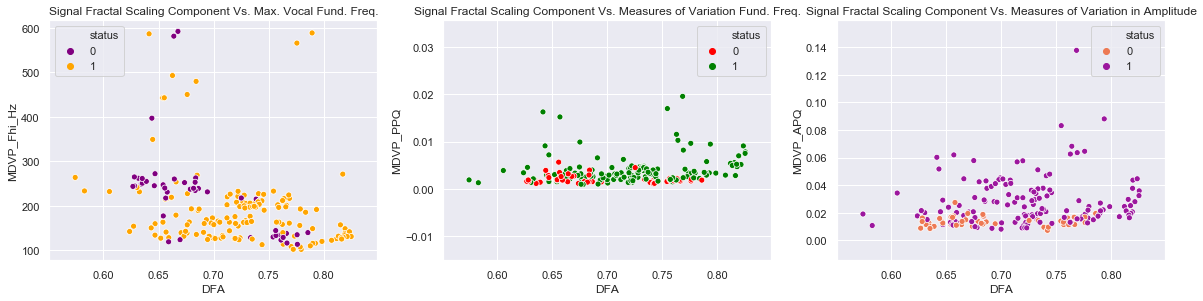

In [37]:
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.scatterplot(df.DFA, df.MDVP_Fhi_Hz, hue = df.status, palette = ['purple', 'orange']);
plt.title('Signal Fractal Scaling Component Vs. Max. Vocal Fund. Freq.');

plt.subplot(3,3,2)
sns.scatterplot(df.DFA, df.MDVP_PPQ, hue = df.status, palette = ['red', 'green']);
plt.title('Signal Fractal Scaling Component Vs. Measures of Variation Fund. Freq.');

plt.subplot(3,3,3)
sns.scatterplot(df.DFA, df.MDVP_APQ, hue = df.status, palette='plasma_r');
plt.title('Signal Fractal Scaling Component Vs. Measures of Variation in Amplitude');

### Comments:

<font color = blue>
    
- From the above scatter plot, it can be inferred that, between the feature DFA and MDVP_Fhi_Hz an arbitrary relationship exists, by which one feature doesn’t affect the other. Outliers can be observed between these two features.
    
- Similarly DFA (signal fractal scaling component) has a nonlinear relationship between MDVO_PPQ and MDVP_APQ, which are measure of variation in fundamental frequency and measure of variation in amplitude respectively.
m

### Comments:
<font color = blue>
    
- A huge multicolinearity can be observed between many of the features or columns. These features are highly corelatead to each other, and their values are also very near to 1. From these values, it can be interpreted that,a perfrect collinearity exists between these features, this is very rare in practice. Thus while calculating the accuracy, some of the columns can be dropped off.
- By dropping some of the columns, we can able to achive a simple model, and can also avoid overfitting of the model. Which inturn will give us a good result in both training and testing sets.
- This above method can be done by assuming the concept behind Principle of Parsimoney, and the model can be made simpler (Occam's Razor) while capturing the collective effort of other independent variables on target variable.
- It is to be noted that, non of the independent variables are having a very good collinerity with target column.

### **NB:**
<font color = blue>
    
> Out of several measures of fundamental frequencies, MDVP_RAP can be dropped off, since,this feature column is highly coorealated to other measures of variation in fundamental frequencies. 
     
> Out of several measures of amplitude, MDVP_APQ3 can be dropped off, since,this feature column is highly coorealated to other measures of variation in amplitude. 
    
> Out of three non linear measures, any one can be deleted between spread 1 and PPE, since these two  are highly coorelatated. In addition to this, these two are also having a very good coorelation with other independent attributes.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 4. Splitting of Dataset into training and testing & Scaling 
<a id='STT'></a>

In [38]:
df.columns

Index(['name', 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

- Before spliting into train and test sets we can remove the name column which is catagorical in nature and we can only consider numerical values.

In [39]:
df = df.drop(['name'], axis = 1)
df.columns

Index(['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
X = df.drop('status', axis = 1) # predictor feature columns or independent columns (22 * m)
y = df['status'] # target / predicted class (1 = Parkinson, 0 = Healthy) (1 * m)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [41]:
X.head()

MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  MDVP_Jitter_Abs  \
0     119.992      157.302       74.997          0.00784          0.00007   
1     122.400      148.650      113.819          0.00968          0.00008   
2     116.682      131.111      111.555          0.01050          0.00009   
3     116.676      137.871      111.366          0.00997          0.00009   
4     116.014      141.781      110.655          0.01284          0.00011   

   MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
0   0.00370   0.00554     0.01109       0.04374            0.426  ...   
1   0.00465   0.00696     0.01394       0.06134            0.626  ...   
2   0.00544   0.00781     0.01633       0.05233            0.482  ...   
3   0.00502   0.00698     0.01505       0.05492            0.517  ...   
4   0.00655   0.00908     0.01966       0.06425            0.584  ...   

   MDVP_APQ  Shimmer_DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 22 columns]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 537)
x_train.head()

MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  MDVP_Jitter_Abs  \
155     117.870      127.349       95.654          0.00647          0.00005   
69      148.090      162.824       67.343          0.00762          0.00005   
65      228.969      239.541      113.201          0.00238          0.00001   
19      156.405      189.398      142.822          0.00768          0.00005   
99      126.512      141.756       99.770          0.01936          0.00015   

     MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
155   0.00356   0.00300     0.01067       0.03087            0.276  ...   
69    0.00467   0.00354     0.01400       0.05428            0.497  ...   
65    0.00136   0.00140     0.00408       0.01745            0.154  ...   
19    0.00372   0.00399     0.01116       0.03995            0.348  ...   
99    0.01159   0.00990     0.03476       0.06734            0.659  ...   

     MDVP_APQ  Shimmer_DDA      NHR     HNR      RPDE       DFA   spread1  \
155   0.02402      0.04977  0.02631  22.431  0.628300  0.652025 -3.583722   
69    0.03635      0.10070  0.02431  21.718  0.487407  0.727313 -6.261141   
65    0.01234      0.02827  0.00420  24.547  0.305429  0.681811 -7.314237   
19    0.04310      0.05164  0.03365  17.153  0.649554  0.686080 -4.554466   
99    0.05783      0.10833  0.16744  12.435  0.638545  0.674953 -3.760348   

      spread2        D2       PPE  
155  0.207914  2.439597  0.206256  
69   0.120956  2.137075  0.141958  
65   0.006274  2.118596  0.091546  
19   0.340176  2.856676  0.322111  
99   0.242861  2.634633  0.378483  

[5 rows x 22 columns]

In [43]:
# checking the split of data
print('{0:0.2f}% data is in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% data is in testing set'.format((len(x_test)/len(df.index))*100))

69.74% data is in training set
30.26% data is in testing set


In [44]:
print("Total No. of Healthy persons present in given dataset: {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 1]), (len(df.loc[df['status'] == 1])/len(df.index)) * 100))
print("Total No. of patients affected by Parkinson Disease as per given dataset: {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 0]), (len(df.loc[df['status'] == 0])/len(df.index)) * 100))
print("")
print("Patients not affected by Parkinson Disease present in Training set: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Patients affected by Parkinson Disease present in Training set: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Patients not affected by Parkinson Disease present in Testing set: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Patients affected by Parkinson Disease present in Testing set: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Total No. of Healthy persons present in given dataset: 147 (75.38%)
Total No. of patients affected by Parkinson Disease as per given dataset: 48 (24.62%)

Patients not affected by Parkinson Disease present in Training set: 102 (75.00%)
Patients affected by Parkinson Disease present in Training set: 34 (25.00%)

Patients not affected by Parkinson Disease present in Testing set: 45 (76.27%)
Patients affected by Parkinson Disease present in Testing set: 14 (23.73%)


In [45]:
# Correlation of entire dataframe
corr_matrix = df.corr()
# Features more related to Patient's Status
corr_matrix['status'].sort_values(ascending = False)

status             1.000000
spread1            0.564838
PPE                0.531039
spread2            0.454842
MDVP_Shimmer       0.367430
MDVP_APQ           0.364316
Shimmer_APQ5       0.351148
MDVP_Shimmer_dB    0.350697
Shimmer_APQ3       0.347617
Shimmer_DDA        0.347608
D2                 0.340232
MDVP_Jitter_Abs    0.338653
RPDE               0.308567
MDVP_PPQ           0.288698
MDVP_Jitter_per    0.278220
MDVP_RAP           0.266668
Jitter_DDP         0.266646
DFA                0.231739
NHR                0.189429
MDVP_Fhi_Hz       -0.166136
HNR               -0.361515
MDVP_Flo_Hz       -0.380200
MDVP_Fo_Hz        -0.383535
Name: status, dtype: float64

<font color = blue>

- Features such as spread1, PPE, spread2 are highly correlated to the Status column, these three variables are the non linear measures of the fundamental frequency variation.
- Features like MDVP_Fhi_Hz,HNR, MDVP_Flo_Hz, MDVP_Fo_Hz are least correlated to the target featurs, so any changes in these variables will less likely affect the target column. These three columns such as MDVP_Fhi_Hz, MDVP_Flo_Hz, MDVP_Fo_Hz are minimum, maximum and average volcal fundamental frequencies.

In [46]:
print(x_train.shape)
print(y_train.shape)

(136, 22)
(136,)


In [47]:
print(x_test.shape)
print(y_test.shape)

(59, 22)
(59,)


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 5. Operation -1 Without Scaling
<a id='O1SE'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   5.a. Train and test using Standard Classification Algorithms
<a id='O1SC'></a>

<font color = violet>
    
### Classification Model Logistic Regression

In [48]:
# Fit the model on train
model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(x_train, y_train)

# Predict on test
y_predict = model_lr.predict(x_test)

# Checking for the coefficient / slope of all columns and intercept. 
coef_df = pd.DataFrame(model_lr.coef_)
coef_df['intercepter'] = model_lr.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.013004  0.000769 -0.001716  0.009836  0.000061  0.008981  0.006742   

          7         8         9  ...        13        14        15        16  \
0  0.026909  0.094734  0.832811  ...  0.158282  0.004087  0.142331  0.380232   

        17        18        19        20       21  intercepter  
0  0.81946  1.199741  0.552783  2.292549  0.54594     0.715544  

[1 rows x 23 columns]


In [49]:
model_score_train = model_lr.score(x_train, y_train)
print('The accuracy of train model is {0:0.2f}%'.format(model_score_train*100))

model_score_test = model_lr.score(x_test, y_test)
print("The accuracy of Test model is {0:0.2f}% ".format(model_score_test*100))

The accuracy of train model is 86.76%
The accuracy of Test model is 81.36% 


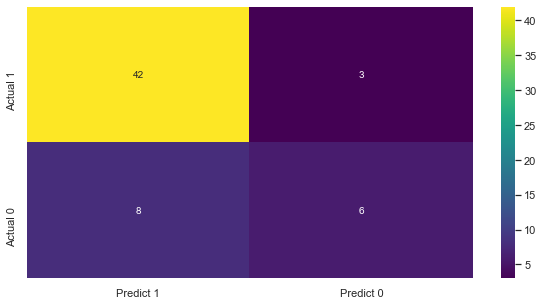

In [50]:
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 1', 'Actual 0']],
                                 columns = [i for i in ['Predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red' );


<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 42
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 6
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 8 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 3 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - Logistic

In [51]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        14
           1       0.84      0.93      0.88        45

    accuracy                           0.81        59
   macro avg       0.75      0.68      0.70        59
weighted avg       0.80      0.81      0.80        59



In [52]:
resultsdf = pd.DataFrame({'Technique w/o scaling': ['Logistic Regression'], 'Accuracy (%)': [model_score_test*100] })
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0   Logistic Regression     81.355932

<font color = violet>
    
### Classification Model - Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB_fit = model_GNB.fit(x_train, y_train)

- Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

In [54]:
y_train_pred_GNB = model_GNB.predict(x_train)

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

y_test_pred_GNB = model_GNB.predict(x_test)
print('Testing Model Accuracy: {0:0.2f}%'.format(metrics.accuracy_score(y_test, y_test_pred_GNB)))

Testing Model Accuracy: 0.75%


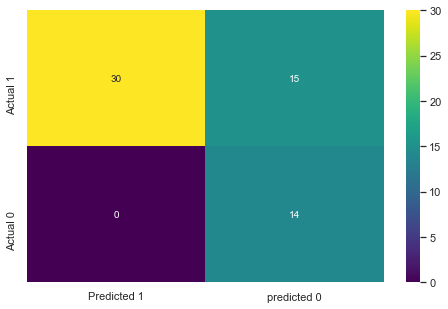

In [55]:
cmGNB = metrics.confusion_matrix(y_test, y_test_pred_GNB, labels = [1,0])
df_cmGNB = pd.DataFrame(cmGNB, index = [ i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmGNB, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 30
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 14
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 0 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 15 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - GNB

In [56]:
print(metrics.classification_report(y_test, y_test_pred_GNB, labels = [1,0]))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80        45
           0       0.48      1.00      0.65        14

    accuracy                           0.75        59
   macro avg       0.74      0.83      0.73        59
weighted avg       0.88      0.75      0.76        59



Here f1-score is more than 70%, however the FN value is coming very high..

In [57]:
tempresultsdf = pd.DataFrame({'Technique w/o scaling': ['GNB'], 'Accuracy (%)': [metrics.accuracy_score(y_test, y_test_pred_GNB)*100] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0   Logistic Regression     81.355932
0                   GNB     74.576271

<font color = violet>

### Classification Model - K-NN

- Build the model and train, test on Training Set and Testing Set Respectively using Scikit-Learn. Print the accuracy of the model with different values of k = 3, 5, 9

In [58]:
# Loading Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Learning the model (k=3)
knn3 = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
knn_fit3 = knn3.fit(x_train, y_train)

y_train_pred_knn3 = knn_fit3.predict(x_train)
print('Training Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y_train, y_train_pred_knn3)))

y_test_pred_knn3 = knn_fit3.predict(x_test)
print('Testing Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y_test, y_test_pred_knn3)))
print()

# Learning the model (k=5)
knn5 = KNeighborsClassifier(n_neighbors = 5)

# Fitting the model
knn_fit5 = knn5.fit(x_train, y_train)

y_train_pred_knn5 = knn_fit5.predict(x_train)
print('Training Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y_train, y_train_pred_knn5)))

y_test_pred_knn5 = knn_fit5.predict(x_test)
print('Testing Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y_test, y_test_pred_knn5)))
print()

# Learning the model (k=9)
knn9 = KNeighborsClassifier(n_neighbors = 9)

# Fitting the model
knn_fit9 = knn9.fit(x_train, y_train)

y_train_pred_knn9 = knn_fit9.predict(x_train)
print('Training Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y_train, y_train_pred_knn9)))

y_test_pred_knn9 = knn_fit9.predict(x_test)
print('Testing Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y_test, y_test_pred_knn9)))
print()

Training Model Accuracy for k = 3:0.93%
Testing Model Accuracy for k = 3:0.81%

Training Model Accuracy for k = 5:0.90%
Testing Model Accuracy for k = 5:0.83%

Training Model Accuracy for k = 9:0.86%
Testing Model Accuracy for k = 9:0.81%



In [59]:
# Creating odd list of k for KNN
mylist = list(range(1,20))

# Substituting just the odd ones
neighbors = list(filter(lambda x: x % 2!=0, mylist))

#### Run the KNN with No. of Neighbours ranging from 1,3,5,9...19 and find the optimal number of neighbours from the above list using the Misclassification error

In [60]:
# Creating an empty list to hold accurcy scores
ac_scores = []

# Performing accuracy metrics for values from 1,3,5,7...19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    # predict the response
    y_predKNN = knn.predict(x_test)
    # Evaluate accuracy
    scores = accuracy_score(y_test, y_predKNN)
    ac_scores.append(scores)
    
# Changing to miscalssification error
MSE = [1-x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The Optimal number of neighbors is %d'% optimal_k)

The Optimal number of neighbors is 1


#### Plot misclassification error vs k (with k value on x-axis) using matplotlib.

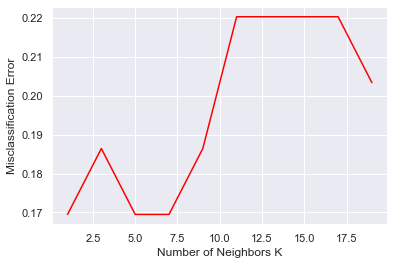

In [61]:
# Misclassification error Vs. K
plt.plot(neighbors, MSE, color = 'red')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Hence, the misclassification error is minimum at k valus of 1 and any value between 5 to 7.5

In [62]:
# Using k = 7 for the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 7)
#  Fitting the model
knn_fit = knn.fit(x_train, y_train)

y_train_pred_knn = knn_fit.predict(x_train)

print('Training Model Accuracy value for k=7: {0:0.2f}% '.format(metrics.accuracy_score(y_train, y_train_pred_knn)))

print('Training Model recall value for k = 7:{0:0.2f}%'.format(metrics.recall_score(y_train, y_train_pred_knn)))
print()

y_test_pred_knn = knn_fit.predict(x_test)
print('Testing Model Accuracy value for k=7: {0:0.2f}%'.format(metrics.accuracy_score(y_test, y_test_pred_knn)))
print('Testing Model Recall value for k=7: {0:0.2f}%'.format(metrics.recall_score(y_test, y_test_pred_knn)))

Training Model Accuracy value for k=7: 0.89% 
Training Model recall value for k = 7:0.97%

Testing Model Accuracy value for k=7: 0.83%
Testing Model Recall value for k=7: 0.93%


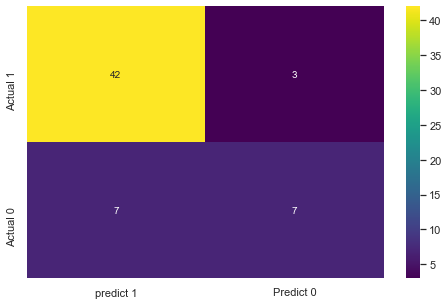

In [63]:
cmKNN = metrics.confusion_matrix(y_test, y_test_pred_knn, labels = [1,0])

df_cmKNN = pd.DataFrame(cmKNN, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmKNN, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 42
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 7
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 7 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 3 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

#### Classification Report - KNN

In [64]:
print(metrics.classification_report(y_test, y_test_pred_knn, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.86      0.93      0.89        45
           0       0.70      0.50      0.58        14

    accuracy                           0.83        59
   macro avg       0.78      0.72      0.74        59
weighted avg       0.82      0.83      0.82        59



In [65]:
tempresultsdf = pd.DataFrame({'Technique w/o scaling': ['KNN'], 'Accuracy (%)': [metrics.accuracy_score(y_test, y_test_pred_knn)*100] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0   Logistic Regression     81.355932
0                   GNB     74.576271
0                   KNN     83.050847

<font color = violet>

### Classification model using SVM

In [66]:
from sklearn.svm import SVC

# Building a support vector Machine on train data
svc_model = SVC(C =0.1, kernel = 'linear', gamma = 1)
svc_fit = svc_model.fit(x_train, y_train)

y_train_pred_svc = svc_fit.predict(x_train)

print('Training Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_train,y_train_pred_svc)))

y_test_pred_svc = svc_fit.predict(x_test)
print('Testing Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_test, y_test_pred_svc)))

Training Model Accuracy value: 0.88%
Testing Model Accuracy value: 0.86%


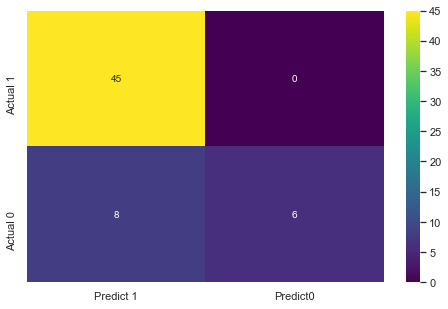

In [67]:
cmSVC = metrics.confusion_matrix(y_test, y_test_pred_svc, labels = [1,0])
df_cmSVC = pd.DataFrame(cmSVC, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [ i for i in ['Predict 1', 'Predict0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 6
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 8 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

In [68]:
print(metrics.classification_report(y_test,y_test_pred_svc, labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.85      1.00      0.92        45

    accuracy                           0.86        59
   macro avg       0.92      0.71      0.76        59
weighted avg       0.88      0.86      0.84        59



In [69]:
tempresultsdf = pd.DataFrame({'Technique w/o scaling': ['SVM'], 'Accuracy (%)': [accuracy_score(y_test, y_test_pred_svc)*100] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0   Logistic Regression     81.355932
0                   GNB     74.576271
0                   KNN     83.050847
0                   SVM     86.440678

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   5.b. Train and test using Standard Ensemble Models
<a id='O1SEM'></a>

<font color = violet>

### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state = 559, max_features = 12 )
rfcl = rfcl.fit(x_train, y_train)


y_predict_rfcl = rfcl.predict(x_test)


In [71]:
print(rfcl.score(x_train, y_train))
print(rfcl.score(x_test, y_test))

1.0
0.9322033898305084


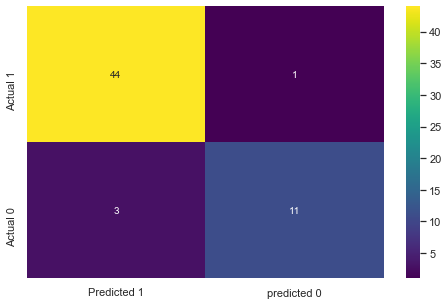

In [72]:
cm_rfcl = metrics.confusion_matrix(y_test, y_predict_rfcl, labels = [1,0])

df_cm_rfcl = pd.DataFrame(cm_rfcl, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

In [73]:
print(metrics.classification_report(y_test,y_predict_rfcl, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        45

    accuracy                           0.93        59
   macro avg       0.93      0.88      0.90        59
weighted avg       0.93      0.93      0.93        59



In [74]:
tempresultsdf = pd.DataFrame({'Technique w/o scaling': ['Random Forest w/o Tuning'], 'Accuracy (%)': [rfcl.score(x_test, y_test)*100] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0       Logistic Regression     81.355932
0                       GNB     74.576271
0                       KNN     83.050847
0                       SVM     86.440678
0  Random Forest w/o Tuning     93.220339

<font color = violet>

### RFCL model Hyper Parameter Tuning

In [75]:
rfcl_tuned = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl_tuned = rfcl_tuned.fit(x_train, y_train)
test_pred_tuned_rfcl = rfcl_tuned.predict(x_test)

print(rfcl_tuned.score(x_train, y_train))
print(rfcl_tuned.score(x_test, y_test))

0.9558823529411765
0.8813559322033898


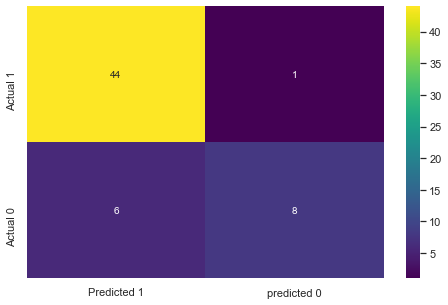

In [76]:
cm_rfcl_tuned = metrics.confusion_matrix(y_test, test_pred_tuned_rfcl, labels = [1,0])

df_cm_rfcl_tuned = pd.DataFrame(cm_rfcl_tuned, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl_tuned, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 09
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 05 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

<font color = teal>
    
Compare to the model without tuning, here with tuning of the hyper parameter we could nullify the value of FN totally and controlled the model from overfitting

In [77]:
print(metrics.classification_report(y_test,test_pred_tuned_rfcl, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.88      0.98      0.93        45

    accuracy                           0.88        59
   macro avg       0.88      0.77      0.81        59
weighted avg       0.88      0.88      0.87        59



f1-score and accuracy of the test model were decreased but, the model is free from overfitting and met our requirement to minimize the value of False Negative 

In [78]:
tempresultsdf = pd.DataFrame({'Technique w/o scaling': ['Random Forest with Tuning'], 'Accuracy (%)': [rfcl_tuned.score(x_test, y_test)*100] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0        Logistic Regression     81.355932
0                        GNB     74.576271
0                        KNN     83.050847
0                        SVM     86.440678
0   Random Forest w/o Tuning     93.220339
0  Random Forest with Tuning     88.135593

<font color = violet>

### XGBoost Classifier

In [79]:
# Importing and Fitting the XGBoost to the Training Set

xgbc = xgboost.XGBClassifier()
xgbc.fit(x_train, y_train)
# Predicting the Test set results
y_pred_xgbc = xgbc.predict(x_test)

In [80]:
print(xgbc.score(x_train, y_train))
print(xgbc.score(x_test, y_test))

1.0
0.9322033898305084


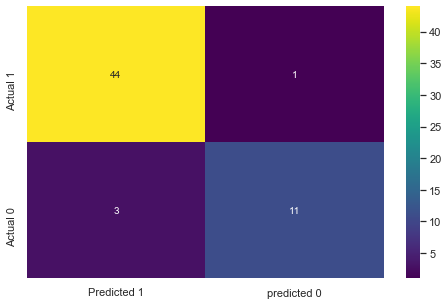

In [81]:
cm_xgbc = metrics.confusion_matrix(y_test, y_pred_xgbc, labels = [1,0])

df_cm_xgbc = pd.DataFrame(cm_xgbc, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

In [82]:
print(metrics.classification_report(y_test,y_predict_rfcl, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        45

    accuracy                           0.93        59
   macro avg       0.93      0.88      0.90        59
weighted avg       0.93      0.93      0.93        59



In [83]:
tempresultsdf = pd.DataFrame({'Technique w/o scaling': ['XGBoost w/o Tuning'], 'Accuracy (%)': [xgbc.score(x_test, y_test)*100] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0        Logistic Regression     81.355932
0                        GNB     74.576271
0                        KNN     83.050847
0                        SVM     86.440678
0   Random Forest w/o Tuning     93.220339
0  Random Forest with Tuning     88.135593
0         XGBoost w/o Tuning     93.220339

<font color = violet>

### XGBoost model Hyper Parameter Tuning

In [84]:
# 'learning_rate' - Model learning rate defined
# 'max_depth'- maximum depth of the tree we want to be, for minimizing overfitting of model
# 'min_child_weight'- minimum weight of the child required in our model
# 'gamma'- gamma value should be as low as possible to control the complexity of the model
# 'colsample_bytree'- Defining the subsample ratio of the columns for each column split
    
    
xgbc_tune = xgboost.XGBClassifier(booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100,random_state=298 )
xgbc_tune.fit(x_train, y_train)
# Predicting the Test set results
y_pred_xgbc_tune = xgbc_tune.predict(x_test)

In [85]:
print(xgbc_tune.score(x_train, y_train))
print(xgbc_tune.score(x_test, y_test))

0.8823529411764706
0.864406779661017


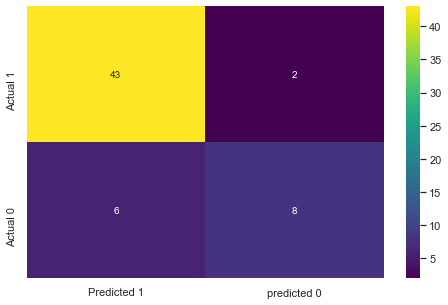

In [86]:
cm_xgbc_tune = metrics.confusion_matrix(y_test, y_pred_xgbc_tune, labels = [1,0])

df_cm_xgbc_tune = pd.DataFrame(cm_xgbc_tune, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc_tune, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 43
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 08
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 06 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 02 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

In [87]:
print(metrics.classification_report(y_test,y_pred_xgbc_tune, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.88      0.96      0.91        45

    accuracy                           0.86        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.86      0.86      0.86        59



In [88]:
tempresultsdf = pd.DataFrame({'Technique w/o scaling': ['XGBoost with Tuning'], 'Accuracy (%)': [xgbc_tune.score(x_test, y_test)*100] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Technique w/o scaling', 'Accuracy (%)']]
resultsdf

Technique w/o scaling  Accuracy (%)
0        Logistic Regression     81.355932
0                        GNB     74.576271
0                        KNN     83.050847
0                        SVM     86.440678
0   Random Forest w/o Tuning     93.220339
0  Random Forest with Tuning     88.135593
0         XGBoost w/o Tuning     93.220339
0        XGBoost with Tuning     86.440678

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   5.c. Train and Test using Stacking
<a id='O1S'></a>

In [616]:
# importing necessary package to perform Stacking
from mlxtend.classifier import StackingClassifier

In [90]:
clf1 = BaggingClassifier(random_state = 39) # Sub-Model 1, considered as Bagging 
clf2 = AdaBoostClassifier(random_state = 39) # Sub-Model 2, considered as AdaBoost
clf3 = RandomForestClassifier(random_state = 39) # Sub-Model 3, considered as RandomForest
clf4 = GaussianNB() # Sub-Model 4, considered as Gaussian NB
clf5 = LGBMClassifier(random_state = 39) # Sub-Model 5, considered as Light Gradient Boost 

In [91]:
mc = GradientBoostingClassifier(random_state = 39) # Meta Model, considered as Gradient Boosting

In [92]:
# Assigning sub models and Meta classifir to the Stacking Classifier
sclf = StackingClassifier(classifiers = [clf1,clf2,clf3,clf4,clf5], meta_classifier = mc)   

In [93]:
# Formation of a for loop to execute the Stacking classifier and print the accuracy with tollerance value
# Here we have considered Cross Validation value as 10. (as per noraml industry standard)
for clf, label in zip([clf1,clf2,clf3,clf4,clf5,sclf],['BaggingClassifier','AdaBoostClassifier', 'RandomForestClassifier', 'GaussianNB', 'LGBMClassifier','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, y, cv = 10, scoring= 'accuracy')
    print('Accuracy: %0.2f (+/- %0.2f) [%s]'% (scores.mean(), scores.std(), label))


Accuracy: 0.79 (+/- 0.10) [BaggingClassifier]
Accuracy: 0.85 (+/- 0.08) [AdaBoostClassifier]
Accuracy: 0.82 (+/- 0.11) [RandomForestClassifier]
Accuracy: 0.70 (+/- 0.17) [GaussianNB]
Accuracy: 0.87 (+/- 0.09) [LGBMClassifier]
Accuracy: 0.84 (+/- 0.08) [StackingClassifier]


<font color = blue>
    
- Among all the models including meta model, LGBM Classifier gives highest accuracy. However, if we consider the Random Forest, it has an accuracy of 82% which is not bad but it has a high variance, by which the accuracy may decrease for some data sets.

<font color = green>

### Using Probabilities in Stacking

In [94]:
clf11 = KNeighborsClassifier(n_neighbors=1)
clf22 = RandomForestClassifier(random_state=1)
clf33 = GaussianNB()

In [95]:
lr = LogisticRegression()

In [96]:
# Here we are trying to use the accuracy of the model with the help of Probability method
sclf_Prb = StackingClassifier(classifiers = [clf11,clf22,clf33], use_probas=True,
                          average_probas=False, meta_classifier = lr)

In [97]:
for clf, label in zip([clf11,clf22,clf33,sclf_Prb],
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, y, cv = 3, scoring= 'accuracy')
    print('Accuracy: %0.2f (+/- %0.2f) [%s]'% (scores.mean(), scores.std(), label))
    # Here we have considered Cross Validation value as 3. 

Accuracy: 0.76 (+/- 0.01) [KNN]
Accuracy: 0.83 (+/- 0.05) [Random Forest]
Accuracy: 0.68 (+/- 0.01) [Naive Bayes]
Accuracy: 0.80 (+/- 0.01) [StackingClassifier]


<font color = blue>
    
- Among all the models including meta model, Random forest gives highest accuracy as always, whereas, the Meta Classifier (Logistic Regression) has an accuracy just below to Random Forest

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   5.d. Observations on accuracies w/o Scaling
<a id='O1O'></a>

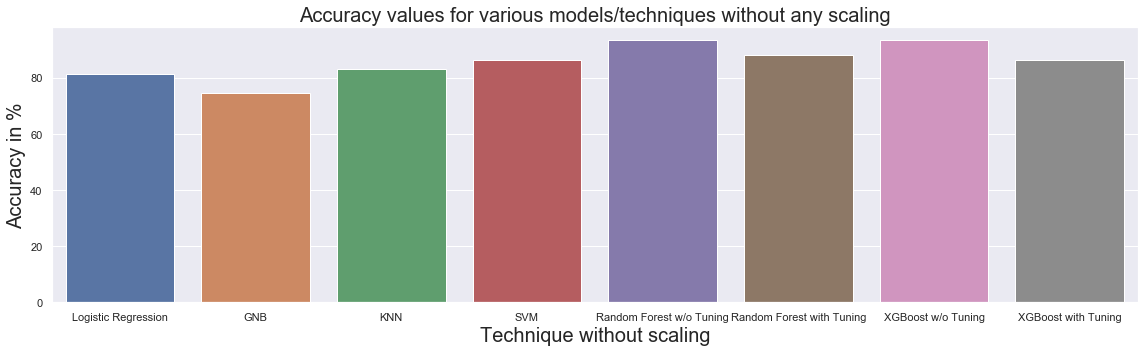

In [98]:
fig = plt.figure(figsize = (16,5))
plt.title ('Accuracy values for various models/techniques without any scaling',y=1, size = 20)

sns.barplot(y = resultsdf['Accuracy (%)'], x = resultsdf['Technique w/o scaling'] );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique without scaling', size = 20)
plt.tight_layout()

<font color = blue>

- It can be observed that, the maximum accuracy has been attained by both Random Forest and XGBoost which is around 93%. Whereas the training accuracy for both the model is 100%, straight way signifies the overfitting model with inclusion of noise. Hence to avoid such kind of complexity, we have tuned these models, after tuning, we have almost around 86% accuracy for these two models only, which is highest among all the models we have used. 

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 6. Operation -2 With Standard Scaling
<a id='O2SE'></a>

In [103]:
df1 = df
df1.columns

Index(['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

<font color = blue>

#### 1.Since all columns are numerical in nature and has different units and range, so to get a standardized dataset, we need to make the convert different scales of measurement into a single one, so that the data in each column can be of same nature or unit.
#### 2.Basically, there are two ways to bring down the multi scale of measurements into a single scale, such as Normalization and Scalling or Standardization.
#### 3.So in StandardScalar Normalization, the formula used is &nbsp;


$$ Z-score = \frac{X - Mean}{Standard Deviation}$$ 
&nbsp;

#### 4. MinMaxScalar normalizes the data using formula 
$$  \frac{X - Minimum}{Maximum - Minimum}$$ 
&nbsp; 

In [104]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

std_scale
# Creat list of numerical variables only
num_vars = [ 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']
# Fit and transform the data 
df1[num_vars] = std_scale.fit_transform(df1[num_vars])
print(df1.head(2))

   MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  MDVP_Jitter_Abs  \
0   -0.829300    -0.436165    -0.952037         0.334914         0.749759   
1   -0.770972    -0.530974    -0.057721         0.715418         1.037674   

   MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
0  0.132963  0.760800    0.131755      0.745985         0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731         1.768464  ...   

   Shimmer_DDA       NHR       HNR  status      RPDE       DFA   spread1  \
0     0.607532 -0.067893 -0.193225       1 -0.807838  1.760814  0.801323   
1     1.548254 -0.137843 -0.634508       1 -0.387524  1.837562  1.479853   

    spread2        D2       PPE  
0  0.480477 -0.210531  0.868886  
1  1.311185  0.275077  1.803605  

[2 rows x 23 columns]


In [105]:
from sklearn.model_selection import train_test_split
X1 = df1.drop('status', axis = 1) # predictor feature columns or independent columns (22 * m)
y1 = df1['status'] # target / predicted class (1 = Parkinson, 0 = Healthy) (1 * m)
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [106]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3, random_state = 537)
x1_train.head()

MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  MDVP_Jitter_Abs  \
155   -0.880700    -0.764393    -0.476176         0.051604         0.173930   
69    -0.148694    -0.375654    -1.128357         0.289419         0.173930   
65     1.810404     0.465019    -0.071957        -0.794192        -0.977729   
19     0.052717    -0.084453     0.610402         0.301827         0.173930   
99    -0.671368    -0.606519    -0.381358         2.717202         3.053077   

     MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
155  0.085668 -0.162201    0.084461      0.061721        -0.032161  ...   
69   0.460648  0.034028    0.459440      1.306369         1.104805  ...   
65  -0.657537 -0.743619   -0.657616     -0.651786        -0.659807  ...   
19   0.139719  0.197552    0.139638      0.544481         0.338254  ...   
99   2.798364  2.345164    2.797150      2.000736         1.938238  ...   

     MDVP_APQ  Shimmer_DDA       NHR       HNR      RPDE       DFA   spread1  \
155 -0.003638     0.091419  0.036288  0.123465  1.251648 -1.197129  1.931817   
69   0.725809     1.767800 -0.013322 -0.038051 -0.107341  0.166938 -0.530384   
65  -0.694630    -0.616262 -0.512148  0.602806 -1.862617 -0.657466 -1.498829   
19   1.125141     0.152971  0.218355 -1.072167  1.456655 -0.580121  1.039104   
99   1.996572     2.018944  3.536998 -2.140941  1.350467 -0.781720  1.769389   

      spread2        D2       PPE  
155 -0.223536  0.151306 -0.003289  
69  -1.268810 -0.641018 -0.718602  
65  -2.647338 -0.689416 -1.279433  
19   1.366311  1.243661  1.285593  
99   0.196542  0.662117  1.912730  

[5 rows x 22 columns]

In [214]:
df1.describe().T

count      mean       std  min       25%       50%       75%  \
MDVP_Fo_Hz       195.0  0.383623  0.240959  0.0  0.170220  0.351961  0.549775   
MDVP_Fhi_Hz      195.0  0.193841  0.186761  0.0  0.066786  0.150411  0.249162   
MDVP_Flo_Hz      195.0  0.292748  0.250564  0.0  0.108323  0.223606  0.429160   
MDVP_Jitter_per  195.0  0.144233  0.154007  0.0  0.056544  0.103558  0.180591   
MDVP_Jitter_Abs  195.0  0.146083  0.137636  0.0  0.051383  0.090909  0.209486   
MDVP_RAP         195.0  0.126513  0.142956  0.0  0.047206  0.087669  0.151975   
MDVP_PPQ         195.0  0.135389  0.147855  0.0  0.050375  0.094855  0.162647   
Jitter_DDP       195.0  0.126504  0.142934  0.0  0.047279  0.087494  0.151951   
MDVP_Shimmer     195.0  0.184126  0.172147  0.0  0.063584  0.122604  0.258764   
MDVP_Shimmer_dB  195.0  0.162080  0.160129  0.0  0.052177  0.111750  0.217749   
Shimmer_APQ3     195.0  0.214063  0.195554  0.0  0.071167  0.158706  0.302677   
Shimmer_APQ5     195.0  0.165241  0.163144  0.0  0.052646  0.105427  0.226323   
MDVP_APQ         195.0  0.129347  0.129771  0.0  0.045103  0.084769  0.170074   
Shimmer_DDA      195.0  0.214101  0.195527  0.0  0.071222  0.158685  0.302703   
NHR              195.0  0.077019  0.128652  0.0  0.016790  0.035045  0.079543   
HNR              195.0  0.546410  0.179865  0.0  0.437170  0.554499  0.676034   
status           195.0  0.753846  0.431878  0.0  1.000000  1.000000  1.000000   
RPDE             195.0  0.564574  0.242525  0.0  0.384375  0.558550  0.772299   
DFA              195.0  0.572963  0.220456  0.0  0.400291  0.589516  0.747391   
spread1          195.0  0.412332  0.197110  0.0  0.273893  0.405738  0.527720   
spread2          195.0  0.495783  0.187758  0.0  0.378364  0.478618  0.614472   
D2               195.0  0.426421  0.170294  0.0  0.300658  0.417393  0.539698   
PPE              195.0  0.335549  0.186649  0.0  0.192433  0.309661  0.431709   

                 max  
MDVP_Fo_Hz       1.0  
MDVP_Fhi_Hz      1.0  
MDVP_Flo_Hz      1.0  
MDVP_Jitter_per  1.0  
MDVP_Jitter_Abs  1.0  
MDVP_RAP         1.0  
MDVP_PPQ         1.0  
Jitter_DDP       1.0  
MDVP_Shimmer     1.0  
MDVP_Shimmer_dB  1.0  
Shimmer_APQ3     1.0  
Shimmer_APQ5     1.0  
MDVP_APQ         1.0  
Shimmer_DDA      1.0  
NHR              1.0  
HNR              1.0  
status           1.0  
RPDE             1.0  
DFA              1.0  
spread1          1.0  
spread2          1.0  
D2               1.0  
PPE              1.0

In [107]:
# Correlation of entire dataframe
corr_matrix = df1.corr()
# Features more related to Patient's Status
corr_matrix['status'].sort_values(ascending = False)

status             1.000000
spread1            0.564838
PPE                0.531039
spread2            0.454842
MDVP_Shimmer       0.367430
MDVP_APQ           0.364316
Shimmer_APQ5       0.351148
MDVP_Shimmer_dB    0.350697
Shimmer_APQ3       0.347617
Shimmer_DDA        0.347608
D2                 0.340232
MDVP_Jitter_Abs    0.338653
RPDE               0.308567
MDVP_PPQ           0.288698
MDVP_Jitter_per    0.278220
MDVP_RAP           0.266668
Jitter_DDP         0.266646
DFA                0.231739
NHR                0.189429
MDVP_Fhi_Hz       -0.166136
HNR               -0.361515
MDVP_Flo_Hz       -0.380200
MDVP_Fo_Hz        -0.383535
Name: status, dtype: float64

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   6.a. Train and test using Standard Classification Algorithms
<a id='O2SC'></a>

<font color = violet>

### Classification Model Logistic Regression

In [158]:
# Fit the model on train
model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(x1_train, y1_train)

# Predict on test
y1_predict = model_lr.predict(x1_test)

# Checking for the coefficient / slope of all columns and the intercepter 
coef_df = pd.DataFrame(model_lr.coef_)
coef_df['intercepter'] = model_lr.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.564737 -0.153485 -0.231987 -0.440786 -0.851527  0.653668 -0.283864   

          7         8         9  ...      13        14        15        16  \
0  0.650601  0.141754 -0.148043  ...  0.1222 -0.348133  0.091267 -0.493026   

         17        18        19        20        21  intercepter  
0  0.280955  1.053434  0.521329  0.606395  0.738294     1.893548  

[1 rows x 23 columns]


In [159]:
model_score_train = model_lr.score(x1_train, y1_train)
print('The accuracy of train model is {0:0.2f}%'.format(model_score_train*100))

model_score_test = model_lr.score(x1_test, y1_test)
print("The accuracy of Test model is {0:0.2f}% ".format(model_score_test*100))

The accuracy of train model is 86.76%
The accuracy of Test model is 88.14% 


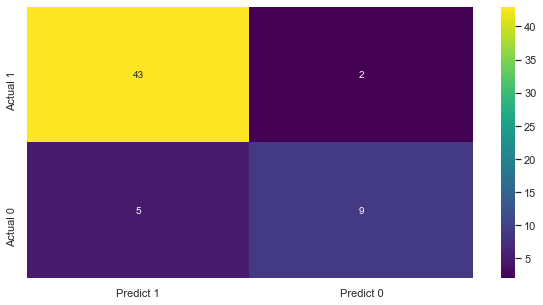

In [160]:
cm = metrics.confusion_matrix(y1_test, y1_predict, labels = [1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 1', 'Actual 0']],
                                 columns = [i for i in ['Predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red' );


<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 43
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 9
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 5 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 2 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

<font color = black>

### Classification Report - Logistic

In [161]:
print(metrics.classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.90      0.96      0.92        45

    accuracy                           0.88        59
   macro avg       0.86      0.80      0.82        59
weighted avg       0.88      0.88      0.88        59



In [162]:
resultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['Logistic Regression'], 'Accuracy(%)': [model_score_test*100]})
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593

<font color = violet>

### Classification Model - Naive Bayes

In [163]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB_fit = model_GNB.fit(x1_train, y1_train)

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

In [164]:
y1_train_pred_GNB = model_GNB.predict(x1_train)

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
print('Training model Accuracy: {0:0.2f}%'.format(metrics.accuracy_score(y1_train, y1_train_pred_GNB)*100))
print()
y1_test_pred_GNB = model_GNB.predict(x1_test)
test_score_GNB = model_GNB.score(x1_test, y1_test)
# print('Testing Model Accuracy: {0:0.2f}%'.format(metrics.accuracy_score(y1_test, y1_test_pred_GNB)))

print('Testing Model Accuracy: {0:0.2f}%'.format(test_score_GNB*100))

Training model Accuracy: 70.59%

Testing Model Accuracy: 71.19%


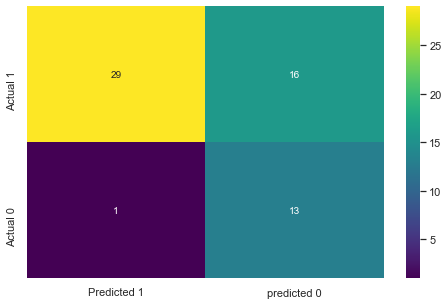

In [165]:
cmGNB1 = metrics.confusion_matrix(y1_test, y1_test_pred_GNB, labels = [1,0])
df_cmGNB1 = pd.DataFrame(cmGNB1, index = [ i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmGNB1, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 29
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 13
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 1 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 16 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - GNB

In [166]:
print(metrics.classification_report(y1_test, y1_test_pred_GNB, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.97      0.64      0.77        45
           0       0.45      0.93      0.60        14

    accuracy                           0.71        59
   macro avg       0.71      0.79      0.69        59
weighted avg       0.84      0.71      0.73        59



Here f1-score is more than 70% for class 1, however the FN value is coming very high..

In [167]:
tempresultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['GNB'], 'Accuracy(%)': [test_score_GNB*100]})
resultsdf_scale1 = pd.concat([resultsdf_scale1, tempresultsdf_scale1])
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441

<font color = violet>

### Classification Model - K_NN

Build the model and train, test on Training Set and Testing Set Respectively using Scikit-Learn. Print the accuracy of the model with different values of k = 3, 5, 9

In [168]:

# Learning the model (k=3)
knn3 = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
knn_fit3 = knn3.fit(x1_train, y1_train)

y1_train_pred_knn3 = knn_fit3.predict(x1_train)
print('Training Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y1_train, y1_train_pred_knn3)))

y1_test_pred_knn3 = knn_fit3.predict(x1_test)
print('Testing Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y1_test, y1_test_pred_knn3)))
print()

# Learning the model (k=5)
knn5 = KNeighborsClassifier(n_neighbors = 5)

# Fitting the model
knn_fit5 = knn5.fit(x1_train, y1_train)

y1_train_pred_knn5 = knn_fit5.predict(x1_train)
print('Training Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y1_train, y1_train_pred_knn5)))

y1_test_pred_knn5 = knn_fit5.predict(x1_test)
print('Testing Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y1_test, y1_test_pred_knn5)))
print()

# Learning the model (k=9)
knn9 = KNeighborsClassifier(n_neighbors = 9)

# Fitting the model
knn_fit9 = knn9.fit(x1_train, y1_train)

y1_train_pred_knn9 = knn_fit9.predict(x1_train)
print('Training Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y1_train, y1_train_pred_knn9)))

y1_test_pred_knn9 = knn_fit9.predict(x1_test)
print('Testing Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y1_test, y1_test_pred_knn9)))
print()

Training Model Accuracy for k = 3:0.98%
Testing Model Accuracy for k = 3:0.90%

Training Model Accuracy for k = 5:0.96%
Testing Model Accuracy for k = 5:0.90%

Training Model Accuracy for k = 9:0.93%
Testing Model Accuracy for k = 9:0.92%



In [169]:
# Creating odd list of k for KNN
mylist = list(range(1,20))

# Substituting just the odd ones
neighbors = list(filter(lambda x: x % 2!=0, mylist))

#### Run the KNN with No. of Neighbours ranging from 1,3,5,9...19 and find the optimal number of neighbours from the above list using the Misclassification error

In [170]:
# Creating an empty list to hold accurcy scores
ac_scores = []

# Performing accuracy metrics for values from 1,3,5,7...19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x1_train, y1_train)
    # predict the response
    y1_predKNN = knn.predict(x1_test)
    # Evaluate accuracy
    scores = accuracy_score(y1_test, y1_predKNN)
    ac_scores.append(scores)
    
# Changing to miscalssification error
MSE = [1-x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The Optimal number of neighbors is %d'% optimal_k)

The Optimal number of neighbors is 1


<font color = green>

#### Plot misclassification error vs k (with k value on x-axis) using matplotlib.

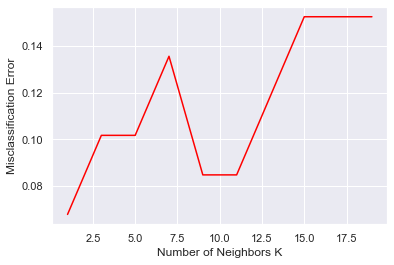

In [171]:
# Misclassification error Vs. K
plt.plot(neighbors, MSE, color = 'red')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Hence, the misclassification error is minimum at k valus of 1 

In [172]:
# Using k = 7 for the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)
#  Fitting the model
knn_fit = knn.fit(x1_train, y1_train)

y1_train_pred_knn = knn_fit.predict(x1_train)

print('Training Model Accuracy value for k=7: {0:0.2f}% '.format(metrics.accuracy_score(y1_train, y1_train_pred_knn)))

print('Training Model recall value for k = 7:{0:0.2f}%'.format(metrics.recall_score(y1_train, y1_train_pred_knn)))
print()

y1_test_pred_knn = knn_fit.predict(x1_test)
print('Testing Model Accuracy value for k=7: {0:0.2f}%'.format(metrics.accuracy_score(y1_test, y1_test_pred_knn)))
print('Testing Model Recall value for k=7: {0:0.2f}%'.format(metrics.recall_score(y1_test, y1_test_pred_knn)))

Training Model Accuracy value for k=7: 1.00% 
Training Model recall value for k = 7:1.00%

Testing Model Accuracy value for k=7: 0.93%
Testing Model Recall value for k=7: 0.96%


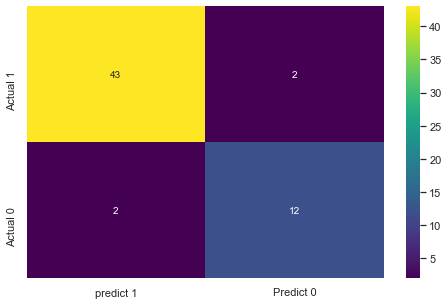

In [173]:
cmKNN1 = metrics.confusion_matrix(y1_test, y1_test_pred_knn, labels = [1,0])

df_cmKNN1 = pd.DataFrame(cmKNN1, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmKNN1, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 43
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 12
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 2 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - KNN

In [174]:
print(metrics.classification_report(y1_test, y1_test_pred_knn, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        45
           0       0.86      0.86      0.86        14

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59



In [175]:
tempresultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['KNN'], 'Accuracy(%)': [metrics.accuracy_score(y1_test, y1_test_pred_knn)*100]})
resultsdf_scale1 = pd.concat([resultsdf_scale1, tempresultsdf_scale1])
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441
0                         KNN    93.220339

<font color = violet>

### Classification model using SVM

In [176]:

# Building a support vector Machine on train data
svc_model = SVC(C =0.1, kernel = 'linear', gamma = 1)
svc_fit = svc_model.fit(x1_train, y1_train)

y1_train_pred_svc = svc_fit.predict(x1_train)

print('Training Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y1_train,y1_train_pred_svc)))

y1_test_pred_svc = svc_fit.predict(x1_test)
print('Testing Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y1_test, y1_test_pred_svc)))

Training Model Accuracy value: 0.89%
Testing Model Accuracy value: 0.90%


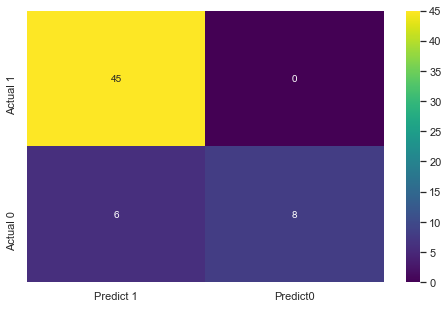

In [177]:
cmSVC1= metrics.confusion_matrix(y1_test, y1_test_pred_svc, labels = [1,0])
df_cmSVC1 = pd.DataFrame(cmSVC1, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [ i for i in ['Predict 1', 'Predict0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC1, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 8
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 6 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - SVM

In [178]:
print(metrics.classification_report(y1_test,y1_test_pred_svc, labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.88      1.00      0.94        45

    accuracy                           0.90        59
   macro avg       0.94      0.79      0.83        59
weighted avg       0.91      0.90      0.89        59



In [179]:
tempresultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['SVM'], 'Accuracy(%)': [accuracy_score(y1_test, y1_test_pred_svc)*100]})
resultsdf_scale1 = pd.concat([resultsdf_scale1, tempresultsdf_scale1])
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441
0                         KNN    93.220339
0                         SVM    89.830508

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   6.b. Train and test using Standard Ensemble Models
<a id='O2SEM'></a>

<font color = violet>

### Random Forest Classifier

In [180]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state = 559, max_features = 12 )
rfcl = rfcl.fit(x1_train, y1_train)


y1_predict_rfcl = rfcl.predict(x1_test)

In [181]:
print(rfcl.score(x1_train, y1_train))
print(rfcl.score(x1_test, y1_test))

1.0
0.9322033898305084


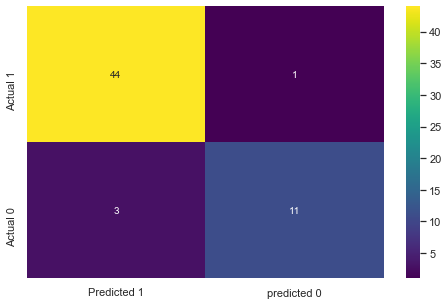

In [182]:
cm_rfcl1 = metrics.confusion_matrix(y1_test, y1_predict_rfcl, labels = [1,0])

df_cm_rfcl1 = pd.DataFrame(cm_rfcl1, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl1, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - RandomForest Classifier

In [183]:
print(metrics.classification_report(y1_test,y1_predict_rfcl, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        45

    accuracy                           0.93        59
   macro avg       0.93      0.88      0.90        59
weighted avg       0.93      0.93      0.93        59



In [184]:
tempresultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['Random Forest w/o tuning'], 'Accuracy(%)': [rfcl.score(x1_test, y1_test)*100]})
resultsdf_scale1 = pd.concat([resultsdf_scale1, tempresultsdf_scale1])
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441
0                         KNN    93.220339
0                         SVM    89.830508
0    Random Forest w/o tuning    93.220339

<font color = green>

### RFCL model Hyper Parameter Tuning

In [185]:
rfcl_tuned = RandomForestClassifier(n_estimators = 50, random_state = 559, criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 4, min_samples_leaf=4)
rfcl_tuned = rfcl_tuned.fit(x1_train, y1_train)
test_pred_tuned_rfcl1 = rfcl_tuned.predict(x1_test)

print(rfcl_tuned.score(x1_train, y1_train))
print(rfcl_tuned.score(x1_test, y1_test))

0.9632352941176471
0.8983050847457628


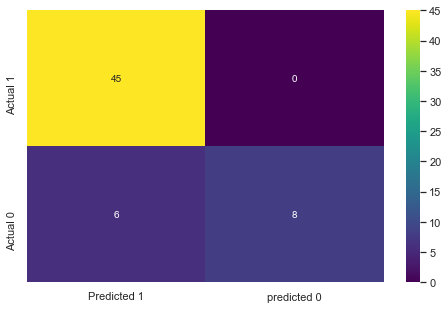

In [186]:
cm_rfcl_tuned1 = metrics.confusion_matrix(y1_test, test_pred_tuned_rfcl1, labels = [1,0])

df_cm_rfcl_tuned1 = pd.DataFrame(cm_rfcl_tuned1, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl_tuned1, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 10
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 4 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

<font color = teal >

Comparing to the model without tuning, here with tuning of the hyper parameter we could nullify the value of FN totally and controlled the model from overfitting

### Classification Report - RandomForest Classifier after tuning

In [187]:
print(metrics.classification_report(y1_test,test_pred_tuned_rfcl1, labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.88      1.00      0.94        45

    accuracy                           0.90        59
   macro avg       0.94      0.79      0.83        59
weighted avg       0.91      0.90      0.89        59



f1-score and accuracy of the test model were decreased but, the model is free from overfitting and met our requirement to minimize the value of False Negative 

In [188]:
tempresultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['Random Forest with tuning'], 'Accuracy(%)': [rfcl_tuned.score(x1_test, y1_test)*100]})
resultsdf_scale1 = pd.concat([resultsdf_scale1, tempresultsdf_scale1])
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441
0                         KNN    93.220339
0                         SVM    89.830508
0    Random Forest w/o tuning    93.220339
0   Random Forest with tuning    89.830508

<font color = violet>

### XGBoost Classifier

In [189]:
# calling and initializing the XGBoost classifier
xgbc = xgboost.XGBClassifier()
xgbc.fit(x1_train, y1_train)
# Predicting the Test set results
y1_pred_xgbc = xgbc.predict(x1_test)

In [190]:
print(xgbc.score(x1_train, y1_train))
print(xgbc.score(x1_test, y1_test))

1.0
0.9322033898305084


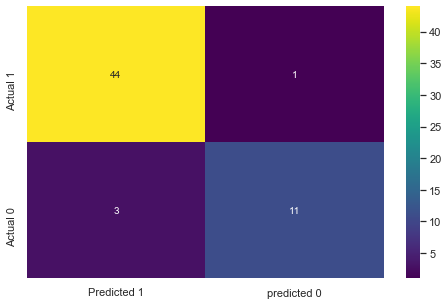

In [191]:
cm_xgbc1 = metrics.confusion_matrix(y1_test, y1_pred_xgbc, labels = [1,0])

df_cm_xgbc1 = pd.DataFrame(cm_xgbc1, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc1, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - XGBoost Classifier

In [192]:
print(metrics.classification_report(y1_test,y1_pred_xgbc, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        45

    accuracy                           0.93        59
   macro avg       0.93      0.88      0.90        59
weighted avg       0.93      0.93      0.93        59



In [193]:
tempresultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['XGBoost w/o tuning'], 'Accuracy(%)': [xgbc.score(x1_test, y1_test)*100]})
resultsdf_scale1 = pd.concat([resultsdf_scale1, tempresultsdf_scale1])
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441
0                         KNN    93.220339
0                         SVM    89.830508
0    Random Forest w/o tuning    93.220339
0   Random Forest with tuning    89.830508
0          XGBoost w/o tuning    93.220339

<font color = green>

### XGBoost model Hyper Parameter Tuning

In [194]:
# 'learning_rate' - Model learning rate defined
# 'max_depth'- maximum depth of the tree we want to be, for minimizing overfitting of model
# 'min_child_weight'- minimum weight of the child required in our model
# 'gamma'- gamma value should be as low as possible to control the complexity of the model
# 'colsample_bytree'- Defining the subsample ratio of the columns for each column split
    
    
xgbc_tune1 = xgboost.XGBClassifier(booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100,random_state=298 )
xgbc_tune1.fit(x1_train, y1_train)
# Predicting the Test set results
y1_pred_xgbc_tune = xgbc_tune1.predict(x1_test)

In [195]:
print(xgbc_tune1.score(x1_train, y1_train))
print(xgbc_tune1.score(x1_test, y1_test))

0.8823529411764706
0.864406779661017


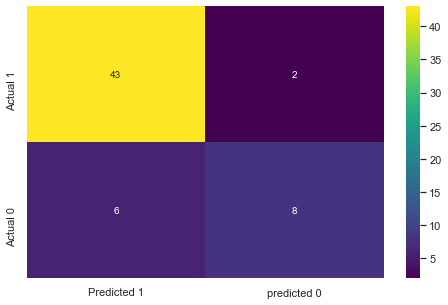

In [196]:
cm_xgbc_tune1 = metrics.confusion_matrix(y1_test, y1_pred_xgbc_tune, labels = [1,0])

df_cm_xgbc_tune1 = pd.DataFrame(cm_xgbc_tune1, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc_tune1, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 43
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 08
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 06 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 02 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - XGBoost Classifier after tuning

In [197]:
print(metrics.classification_report(y1_test,y1_pred_xgbc_tune, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.88      0.96      0.91        45

    accuracy                           0.86        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.86      0.86      0.86        59



In [198]:
tempresultsdf_scale1 = pd.DataFrame({'Method_scaling(Std. Scalar)': ['XGBoost with tuning'], 'Accuracy(%)': [xgbc_tune1.score(x1_test, y1_test)*100]})
resultsdf_scale1 = pd.concat([resultsdf_scale1, tempresultsdf_scale1])
resultsdf_scale1 = resultsdf_scale1[['Method_scaling(Std. Scalar)', 'Accuracy(%)']]
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441
0                         KNN    93.220339
0                         SVM    89.830508
0    Random Forest w/o tuning    93.220339
0   Random Forest with tuning    89.830508
0          XGBoost w/o tuning    93.220339
0         XGBoost with tuning    86.440678

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   6.c. Train and Test using Stacking
<a id='O2S'></a>

In [199]:
# assigning various techniques / models to be used in stacking
clf1 = BaggingClassifier(random_state = 39)
clf2 = AdaBoostClassifier(random_state = 39)
clf3 = RandomForestClassifier(random_state = 39)
clf4 = GaussianNB()
clf5 = LGBMClassifier(random_state = 39)

In [201]:
# making a meatal model for stacking
mc = GradientBoostingClassifier(random_state = 39)

In [202]:
# assigning the stacking model to perform 
sclf = StackingClassifier(classifiers = [clf1,clf2,clf3,clf4,clf5], meta_classifier = mc)

In [203]:
# checking for accuracy for both meta model and normal model
for clf, label in zip([clf1,clf2,clf3,clf4,clf5,sclf],['BaggingClassifier','AdaBoostClassifier', 'RandomForestClassifier', 'GaussianNB', 'LGBMClassifier','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X1, y1, cv = 10, scoring= 'accuracy')
    print('Accuracy: %0.2f (+/- %0.2f) [%s]'% (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.10) [BaggingClassifier]
Accuracy: 0.85 (+/- 0.08) [AdaBoostClassifier]
Accuracy: 0.82 (+/- 0.11) [RandomForestClassifier]
Accuracy: 0.66 (+/- 0.16) [GaussianNB]
Accuracy: 0.88 (+/- 0.08) [LGBMClassifier]
Accuracy: 0.84 (+/- 0.08) [StackingClassifier]


<font color = blue>
    
- Among all the models including meta model, LGBM Classifier gives highest accuracy. However, if we consider the Random Forest, it has an accuracy of 82% which is not bad but it has a high variance, by which the accuracy may decrease for some data sets.

<font color = green>

### Using Probabilities in Stacking

In [204]:
clf11 = KNeighborsClassifier(n_neighbors=1)
clf22 = RandomForestClassifier(random_state=1)
clf33 = GaussianNB()

In [205]:
lr = LogisticRegression()

In [206]:
sclf_Prb = StackingClassifier(classifiers = [clf11,clf22,clf33], use_probas=True,
                          average_probas=False, meta_classifier = lr)

In [207]:
for clf, label in zip([clf11,clf22,clf33,sclf_Prb],
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X1, y1, cv = 3, scoring= 'accuracy')
    print('Accuracy: %0.2f (+/- %0.2f) [%s]'% (scores.mean(), scores.std(), label))

Accuracy: 0.81 (+/- 0.05) [KNN]
Accuracy: 0.83 (+/- 0.05) [Random Forest]
Accuracy: 0.67 (+/- 0.01) [Naive Bayes]
Accuracy: 0.81 (+/- 0.06) [StackingClassifier]


<font color = blue>
    
- Among all the models including meta model, Random Forest gives the highest accuracy as always, whereas Meta Classifier (Logistic Regression) has an accuray of 81% 

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   6.d. Observations on accuracies with Standard Scalar
<a id='O2O'></a>

In [209]:
resultsdf_scale1

Method_scaling(Std. Scalar)  Accuracy(%)
0         Logistic Regression    88.135593
0                         GNB    71.186441
0                         KNN    93.220339
0                         SVM    89.830508
0    Random Forest w/o tuning    93.220339
0   Random Forest with tuning    89.830508
0          XGBoost w/o tuning    93.220339
0         XGBoost with tuning    86.440678

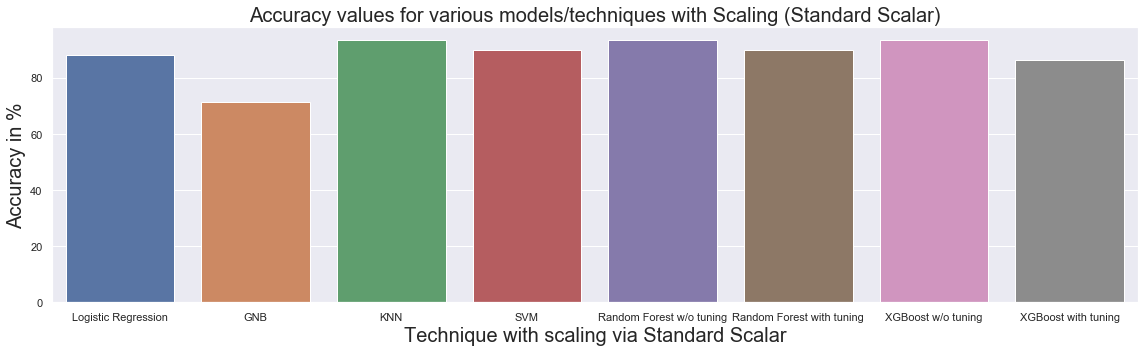

In [208]:
fig = plt.figure(figsize = (16,5))
plt.title ('Accuracy values for various models/techniques with Scaling (Standard Scalar)',y=1, size = 20)

sns.barplot(y = resultsdf_scale1['Accuracy(%)'], x = resultsdf_scale1['Method_scaling(Std. Scalar)'] );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique with scaling via Standard Scalar', size = 20)
plt.tight_layout()

<font color = blue>

- It can be observed that, the maximum accuracy has been attained by KNN, Random Forest and XGBoost which is around 93%. Whereas the training accuracy for both the Random Forest and XGBoost is 100%, straight way it signifies the overfitting of model with inclusion of noise. Hence to avoid such kind of complexity, we have tuned these two models, after tuning, we have 89% & 86% accuracy for Random Forest & XGBoost models respectively, and the accuracy of SVM coincides with the accuracy of Random Forest after tuning. 

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 7. Operation -3 With MinMax Scaling
<a id='O3SE'></a>

In [475]:
df2 = df
df2.columns

Index(['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [476]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()

minmax_scale
# Creat list of numerical variables only
num_vars = [ 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_per',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']
# Fit and transform the data 
df2[num_vars] = minmax_scale.fit_transform(df2[num_vars])
print(df2.tail(2))

     MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  MDVP_Jitter_Abs  \
193    0.642893     0.601807     0.054279         0.181703         0.130435   
194    0.733274     0.322794     0.071948         0.126747         0.090909   

     MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
193  0.145472  0.159700    0.145288      0.122512         0.128184  ...   
194  0.109345  0.120579    0.109327      0.084900         0.086278  ...   

     Shimmer_DDA       NHR       HNR  status      RPDE       DFA   spread1  \
193     0.155989  0.227838  0.429936       0  0.454176  0.277579  0.220650   
194     0.110027  0.137919  0.518898       0  0.481200  0.358856  0.405161   

      spread2        D2       PPE  
193  0.452885  0.318222  0.163137  
194  0.415095  0.503673  0.215460  

[2 rows x 23 columns]


In [477]:
from sklearn.model_selection import train_test_split
X2 = df2.drop('status', axis = 1) # predictor feature columns or independent columns (22 * m)
y2 = df2['status'] # target / predicted class (1 = Parkinson, 0 = Healthy) (1 * m)
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [478]:
df2.describe().T

count      mean       std  min       25%       50%       75%  \
MDVP_Fo_Hz       195.0  0.383623  0.240959  0.0  0.170220  0.351961  0.549775   
MDVP_Fhi_Hz      195.0  0.193841  0.186761  0.0  0.066786  0.150411  0.249162   
MDVP_Flo_Hz      195.0  0.292748  0.250564  0.0  0.108323  0.223606  0.429160   
MDVP_Jitter_per  195.0  0.144233  0.154007  0.0  0.056544  0.103558  0.180591   
MDVP_Jitter_Abs  195.0  0.146083  0.137636  0.0  0.051383  0.090909  0.209486   
MDVP_RAP         195.0  0.126513  0.142956  0.0  0.047206  0.087669  0.151975   
MDVP_PPQ         195.0  0.135389  0.147855  0.0  0.050375  0.094855  0.162647   
Jitter_DDP       195.0  0.126504  0.142934  0.0  0.047279  0.087494  0.151951   
MDVP_Shimmer     195.0  0.184126  0.172147  0.0  0.063584  0.122604  0.258764   
MDVP_Shimmer_dB  195.0  0.162080  0.160129  0.0  0.052177  0.111750  0.217749   
Shimmer_APQ3     195.0  0.214063  0.195554  0.0  0.071167  0.158706  0.302677   
Shimmer_APQ5     195.0  0.165241  0.163144  0.0  0.052646  0.105427  0.226323   
MDVP_APQ         195.0  0.129347  0.129771  0.0  0.045103  0.084769  0.170074   
Shimmer_DDA      195.0  0.214101  0.195527  0.0  0.071222  0.158685  0.302703   
NHR              195.0  0.077019  0.128652  0.0  0.016790  0.035045  0.079543   
HNR              195.0  0.546410  0.179865  0.0  0.437170  0.554499  0.676034   
status           195.0  0.753846  0.431878  0.0  1.000000  1.000000  1.000000   
RPDE             195.0  0.564574  0.242525  0.0  0.384375  0.558550  0.772299   
DFA              195.0  0.572963  0.220456  0.0  0.400291  0.589516  0.747391   
spread1          195.0  0.412332  0.197110  0.0  0.273893  0.405738  0.527720   
spread2          195.0  0.495783  0.187758  0.0  0.378364  0.478618  0.614472   
D2               195.0  0.426421  0.170294  0.0  0.300658  0.417393  0.539698   
PPE              195.0  0.335549  0.186649  0.0  0.192433  0.309661  0.431709   

                 max  
MDVP_Fo_Hz       1.0  
MDVP_Fhi_Hz      1.0  
MDVP_Flo_Hz      1.0  
MDVP_Jitter_per  1.0  
MDVP_Jitter_Abs  1.0  
MDVP_RAP         1.0  
MDVP_PPQ         1.0  
Jitter_DDP       1.0  
MDVP_Shimmer     1.0  
MDVP_Shimmer_dB  1.0  
Shimmer_APQ3     1.0  
Shimmer_APQ5     1.0  
MDVP_APQ         1.0  
Shimmer_DDA      1.0  
NHR              1.0  
HNR              1.0  
status           1.0  
RPDE             1.0  
DFA              1.0  
spread1          1.0  
spread2          1.0  
D2               1.0  
PPE              1.0

In [479]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3, random_state = 537)
x2_train.head()

MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_per  MDVP_Jitter_Abs  \
155    0.171955     0.051449     0.173742         0.152160         0.169960   
69     0.347886     0.123864     0.010749         0.188691         0.169960   
65     0.818736     0.280466     0.274765         0.022236         0.011858   
19     0.396293     0.178109     0.445300         0.190597         0.169960   
99     0.222266     0.080858     0.197439         0.561626         0.565217   

     MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
155  0.138728  0.111468    0.138546      0.194723         0.156943  ...   
69   0.192197  0.140407    0.192005      0.408435         0.338537  ...   
65   0.032755  0.025723    0.032750      0.072211         0.056697  ...   
19   0.146435  0.164523    0.146412      0.277615         0.216105  ...   
99   0.525530  0.481243    0.525285      0.527661         0.471652  ...   

     MDVP_APQ  Shimmer_DDA       NHR       HNR      RPDE       DFA   spread1  \
155  0.128877     0.231930  0.081676  0.568561  0.867351  0.309726  0.792135   
69   0.223294     0.558865  0.075310  0.539584  0.538608  0.609671  0.308056   
65   0.039436     0.093914  0.011300  0.654556  0.114002  0.428392  0.117655   
19   0.274983     0.243934  0.105039  0.354060  0.916942  0.445400  0.616624   
99   0.387779     0.607844  0.530891  0.162318  0.891255  0.401070  0.760201   

      spread2        D2       PPE  
155  0.453920  0.452122  0.334937  
69   0.258165  0.317540  0.201768  
65   0.000000  0.309319  0.097358  
19   0.751661  0.637666  0.574888  
99   0.532591  0.538887  0.691642  

[5 rows x 22 columns]

In [480]:
# Correlation of entire dataframe
corr_matrix = df2.corr()
# Features more related to Patient's Status
corr_matrix['status'].sort_values(ascending = False)

status             1.000000
spread1            0.564838
PPE                0.531039
spread2            0.454842
MDVP_Shimmer       0.367430
MDVP_APQ           0.364316
Shimmer_APQ5       0.351148
MDVP_Shimmer_dB    0.350697
Shimmer_APQ3       0.347617
Shimmer_DDA        0.347608
D2                 0.340232
MDVP_Jitter_Abs    0.338653
RPDE               0.308567
MDVP_PPQ           0.288698
MDVP_Jitter_per    0.278220
MDVP_RAP           0.266668
Jitter_DDP         0.266646
DFA                0.231739
NHR                0.189429
MDVP_Fhi_Hz       -0.166136
HNR               -0.361515
MDVP_Flo_Hz       -0.380200
MDVP_Fo_Hz        -0.383535
Name: status, dtype: float64

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.a. Train and test using Standard Classification Algorithms
<a id='O3SC'></a>

<font color = violet>

### Classification Model Logistic Regression

In [348]:

from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
# Fit the model on train
model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(x2_train, y2_train)

# Predict on test
y2_predict = model_lr.predict(x2_test)

# Checking for the coefficient / slope of all columns and the intercepter 
coef_df = pd.DataFrame(model_lr.coef_)
coef_df['intercepter'] = model_lr.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0 -1.326779 -0.306507 -0.76891  0.057892  0.110046  0.197532  0.133148   

          7         8         9  ...        13        14        15        16  \
0  0.197014  0.398828  0.289268  ...  0.367182 -0.167926 -0.428319 -0.221292   

         17        18        19        20        21  intercepter  
0  0.772387  1.633485  1.327449  0.956747  1.322729    -0.376087  

[1 rows x 23 columns]


In [349]:
model_score_train = model_lr.score(x2_train, y2_train)
print('The accuracy of train model is {0:0.2f}%'.format(model_score_train*100))

model_score_test = model_lr.score(x2_test, y2_test)
print("The accuracy of Test model is {0:0.2f}% ".format(model_score_test*100))

The accuracy of train model is 85.29%
The accuracy of Test model is 86.44% 


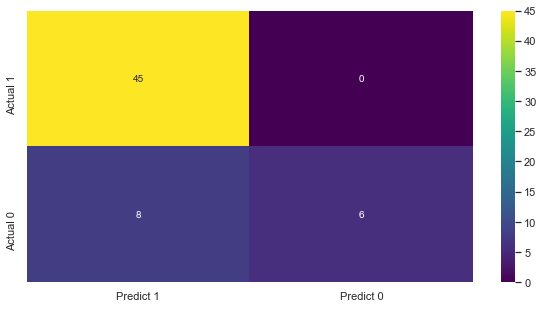

In [350]:
cm2 = metrics.confusion_matrix(y2_test, y2_predict, labels = [1,0])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ['Actual 1', 'Actual 0']],
                                 columns = [i for i in ['Predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df_cm2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red' );


<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 6
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 8 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - Logistic

In [351]:
print(metrics.classification_report(y2_test, y2_predict))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.85      1.00      0.92        45

    accuracy                           0.86        59
   macro avg       0.92      0.71      0.76        59
weighted avg       0.88      0.86      0.84        59



In [352]:
resultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['Logistic Regression'], 'Accuracy(%)': [model_score_test*100]})
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678

<font color = violet>

### Classification Model - Naive Bayes

In [353]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB_fit = model_GNB.fit(x2_train, y2_train)

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

In [354]:
# To calculate the accuracy score of the model
y2_train_pred_GNB = model_GNB.predict(x2_train)
from sklearn.metrics import accuracy_score
print('Training model Accuracy: {0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_GNB)))
print()
y2_test_pred_GNB = model_GNB.predict(x2_test)
print('Testing Model Accuracy: {0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_GNB)))

Training model Accuracy: 0.71%

Testing Model Accuracy: 0.71%


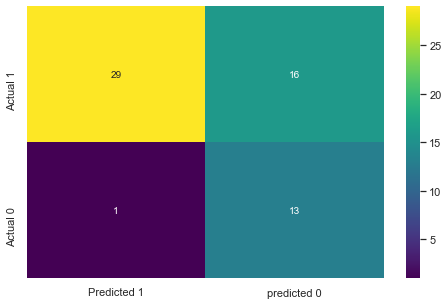

In [355]:
cmGNB2 = metrics.confusion_matrix(y2_test, y2_test_pred_GNB, labels = [1,0])
df_cmGNB2 = pd.DataFrame(cmGNB2, index = [ i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmGNB2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 29
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 13
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 1 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 16 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - GNB

In [356]:
print(metrics.classification_report(y2_test, y2_test_pred_GNB, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.97      0.64      0.77        45
           0       0.45      0.93      0.60        14

    accuracy                           0.71        59
   macro avg       0.71      0.79      0.69        59
weighted avg       0.84      0.71      0.73        59



Here f1-score is slightly more than 70%, however the FN value is coming very high..

In [357]:
tempresultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['GNB'], 'Accuracy(%)': [metrics.accuracy_score(y2_test, y2_test_pred_GNB)*100]})
resultsdf_minmax = pd.concat([resultsdf_minmax, tempresultsdf_minmax])
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441

<font color = violet>

### Classification Model - K-NN

Build the model and train, test on Training Set and Testing Set Respectively using Scikit-Learn. Print the accuracy of the model with different values of k = 3, 5, 9

In [358]:
# Loading Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Learning the model (k=3)
knn3 = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
knn_fit3 = knn3.fit(x2_train, y2_train)

y2_train_pred_knn3 = knn_fit3.predict(x2_train)
print('Training Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_knn3)))

y2_test_pred_knn3 = knn_fit3.predict(x2_test)
print('Testing Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn3)))
print()

# Learning the model (k=5)
knn5 = KNeighborsClassifier(n_neighbors = 5)

# Fitting the model
knn_fit5 = knn5.fit(x2_train, y2_train)

y2_train_pred_knn5 = knn_fit5.predict(x2_train)
print('Training Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_knn5)))

y2_test_pred_knn5 = knn_fit5.predict(x2_test)
print('Testing Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn5)))
print()

# Learning the model (k=9)
knn9 = KNeighborsClassifier(n_neighbors = 9)

# Fitting the model
knn_fit9 = knn9.fit(x2_train, y2_train)

y2_train_pred_knn9 = knn_fit9.predict(x2_train)
print('Training Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_knn9)))

y2_test_pred_knn9 = knn_fit9.predict(x2_test)
print('Testing Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn9)))
print()

Training Model Accuracy for k = 3:0.99%
Testing Model Accuracy for k = 3:0.90%

Training Model Accuracy for k = 5:0.97%
Testing Model Accuracy for k = 5:0.92%

Training Model Accuracy for k = 9:0.93%
Testing Model Accuracy for k = 9:0.92%



In [359]:
# Creating odd list of k for KNN
mylist = list(range(1,20))

# Substituting just the odd ones
neighbors = list(filter(lambda x: x % 2!=0, mylist))

#### Run the KNN with No. of Neighbours ranging from 1,3,5,9...19 and find the optimal number of neighbours from the above list using the Misclassification error

In [360]:
# Creating an empty list to hold accurcy scores
ac_scores = []

# Performing accuracy metrics for values from 1,3,5,7...19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x2_train, y2_train)
    # predict the response
    y2_predKNN = knn.predict(x2_test)
    # Evaluate accuracy
    scores = accuracy_score(y2_test, y2_predKNN)
    ac_scores.append(scores)
    
# Changing to miscalssification error
MSE = [1-x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The Optimal number of neighbors is %d'% optimal_k)

The Optimal number of neighbors is 5


#### Plot misclassification error vs k (with k value on x-axis) using matplotlib.

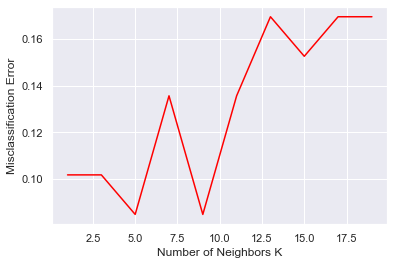

In [361]:
# Misclassification error Vs. K
plt.plot(neighbors, MSE, color = 'red')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Hence, the misclassification error is minimum at k valus of 5 

In [362]:
# Using k = 7 for the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 5)
#  Fitting the model
knn_fit = knn.fit(x2_train, y2_train)

y2_train_pred_knn = knn_fit.predict(x2_train)

print('Training Model Accuracy value for k=7: {0:0.2f}% '.format(metrics.accuracy_score(y2_train, y2_train_pred_knn)))

print('Training Model recall value for k = 7:{0:0.2f}%'.format(metrics.recall_score(y2_train, y2_train_pred_knn)))
print()

y2_test_pred_knn = knn_fit.predict(x2_test)
print('Testing Model Accuracy value for k=7: {0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn)))
print('Testing Model Recall value for k=7: {0:0.2f}%'.format(metrics.recall_score(y2_test, y2_test_pred_knn)))

Training Model Accuracy value for k=7: 0.97% 
Training Model recall value for k = 7:0.97%

Testing Model Accuracy value for k=7: 0.92%
Testing Model Recall value for k=7: 0.98%


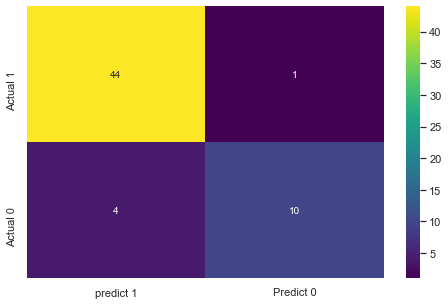

In [363]:
cmKNN2 = metrics.confusion_matrix(y2_test, y2_test_pred_knn, labels = [1,0])

df_cmKNN2 = pd.DataFrame(cmKNN2, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmKNN2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 10
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 4 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - KNN

In [364]:
print(metrics.classification_report(y2_test, y2_test_pred_knn, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95        45
           0       0.91      0.71      0.80        14

    accuracy                           0.92        59
   macro avg       0.91      0.85      0.87        59
weighted avg       0.91      0.92      0.91        59



In [365]:
tempresultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['KNN'], 'Accuracy(%)': [metrics.accuracy_score(y2_test, y2_test_pred_knn)*100]})
resultsdf_minmax = pd.concat([resultsdf_minmax, tempresultsdf_minmax])
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441
0                           KNN    91.525424

<font color = violet>

### Classification model using SVM

In [366]:
from sklearn.svm import SVC

# Building a support vector Machine on train data
svc_model = SVC(C =0.1, kernel = 'linear', gamma = 1)
svc_fit = svc_model.fit(x2_train, y2_train)

y2_train_pred_svc = svc_fit.predict(x2_train)

print('Training Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y2_train,y2_train_pred_svc)))

y2_test_pred_svc = svc_fit.predict(x2_test)
print('Testing Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y2_test, y2_test_pred_svc)))

Training Model Accuracy value: 0.75%
Testing Model Accuracy value: 0.76%


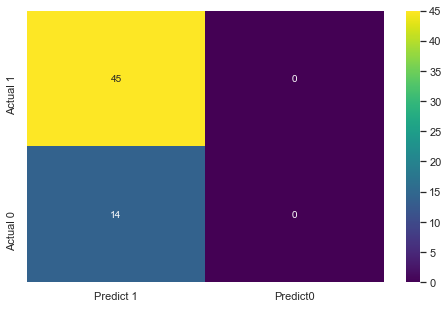

In [367]:
cmSVC2 = metrics.confusion_matrix(y2_test, y2_test_pred_svc, labels = [1,0])
df_cmSVC2 = pd.DataFrame(cmSVC2, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [ i for i in ['Predict 1', 'Predict0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 0
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 14 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - SVM

In [368]:
print(metrics.classification_report(y2_test,y2_test_pred_svc, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.76      1.00      0.87        45

    accuracy                           0.76        59
   macro avg       0.38      0.50      0.43        59
weighted avg       0.58      0.76      0.66        59



C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [369]:
tempresultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['SVM'], 'Accuracy(%)': [accuracy_score(y2_test, y2_test_pred_svc)*100]})
resultsdf_minmax = pd.concat([resultsdf_minmax, tempresultsdf_minmax])
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441
0                           KNN    91.525424
0                           SVM    76.271186

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.b. Train and test using Standard Ensemble Models
<a id='O3SEM'></a>

<font color = violet>

### Random Forest Classifier

In [370]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state = 559, max_features = 12 )
rfcl = rfcl.fit(x2_train, y2_train)


y2_predict_rfcl = rfcl.predict(x2_test)

In [371]:
print(rfcl.score(x2_train, y2_train))
print(rfcl.score(x2_test, y2_test))

1.0
0.9322033898305084


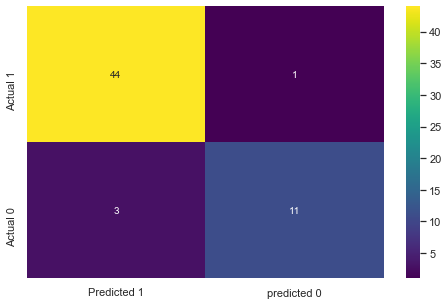

In [372]:
cm_rfcl2 = metrics.confusion_matrix(y2_test, y2_predict_rfcl, labels = [1,0])

df_cm_rfcl2 = pd.DataFrame(cm_rfcl2, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - Random Forest

In [373]:
print(metrics.classification_report(y2_test,y2_predict_rfcl, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        45

    accuracy                           0.93        59
   macro avg       0.93      0.88      0.90        59
weighted avg       0.93      0.93      0.93        59



In [374]:
tempresultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['Random Forest w/o tuning'], 'Accuracy(%)': [rfcl.score(x2_test, y2_test)*100]})
resultsdf_minmax = pd.concat([resultsdf_minmax, tempresultsdf_minmax])
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441
0                           KNN    91.525424
0                           SVM    76.271186
0      Random Forest w/o tuning    93.220339

<font color = green>

### RFCL model Hyper Parameter Tuning

In [375]:
rfcl_tuned = RandomForestClassifier(n_estimators = 50, random_state = 559, criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 4, min_samples_leaf=4)
rfcl_tuned = rfcl_tuned.fit(x2_train, y2_train)
test_pred_tuned_rfcl2 = rfcl_tuned.predict(x2_test)

print(rfcl_tuned.score(x2_train, y2_train))
print(rfcl_tuned.score(x2_test, y2_test))

0.9632352941176471
0.8983050847457628


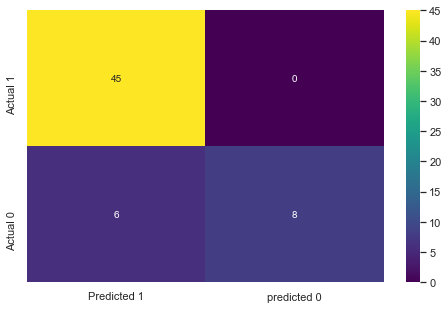

In [376]:
cm_rfcl_tuned2 = metrics.confusion_matrix(y2_test, test_pred_tuned_rfcl2, labels = [1,0])

df_cm_rfcl_tuned2 = pd.DataFrame(cm_rfcl_tuned2, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl_tuned2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue> 

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 08
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 6 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

<font color = teal>

Compare to the model without tuning, here with tuning of the hyper parameter we could nullify the value of FN totally and controlled the model from overfitting

### Classification Report - Random Forest after tuning

In [377]:
print(metrics.classification_report(y2_test,test_pred_tuned_rfcl2, labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.88      1.00      0.94        45

    accuracy                           0.90        59
   macro avg       0.94      0.79      0.83        59
weighted avg       0.91      0.90      0.89        59



f1-score and accuracy of the test model were decreased but, the model is free from overfitting and met our requirement to minimize the value of False Negative 

In [378]:
tempresultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['Random Forest with tuning'], 'Accuracy(%)': [rfcl_tuned.score(x2_test, y2_test)*100]})
resultsdf_minmax = pd.concat([resultsdf_minmax, tempresultsdf_minmax])
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441
0                           KNN    91.525424
0                           SVM    76.271186
0      Random Forest w/o tuning    93.220339
0     Random Forest with tuning    89.830508

<font color = violet>

### XGBoost Classifier

In [379]:
xgbc = xgboost.XGBClassifier()
xgbc.fit(x2_train, y2_train)
# Predicting the Test set results
y2_pred_xgbc = xgbc.predict(x2_test)

In [380]:
print(xgbc.score(x2_train, y2_train))
print(xgbc.score(x2_test, y2_test))

1.0
0.9322033898305084


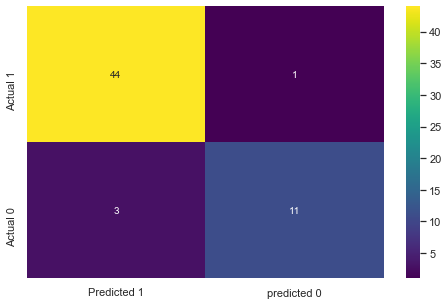

In [381]:
cm_xgbc2 = metrics.confusion_matrix(y2_test, y2_pred_xgbc, labels = [1,0])

df_cm_xgbc2 = pd.DataFrame(cm_xgbc2, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - XGBoost Classifier

In [382]:
print(metrics.classification_report(y2_test,y2_pred_xgbc, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        45

    accuracy                           0.93        59
   macro avg       0.93      0.88      0.90        59
weighted avg       0.93      0.93      0.93        59



In [383]:
tempresultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['XGBoost w/o tuning'], 'Accuracy(%)': [xgbc.score(x2_test, y2_test)*100]})
resultsdf_minmax = pd.concat([resultsdf_minmax, tempresultsdf_minmax])
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441
0                           KNN    91.525424
0                           SVM    76.271186
0      Random Forest w/o tuning    93.220339
0     Random Forest with tuning    89.830508
0            XGBoost w/o tuning    93.220339

<font color = green>

### XGBoost model Hyper Parameter Tuning

In [384]:
# 'learning_rate' - Model learning rate defined
# 'max_depth'- maximum depth of the tree we want to be, for minimizing overfitting of model
# 'min_child_weight'- minimum weight of the child required in our model
# 'gamma'- gamma value should be as low as possible to control the complexity of the model
# 'colsample_bytree'- Defining the subsample ratio of the columns for each column split
    
    
xgbc_tune2 = xgboost.XGBClassifier(booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=7, missing=None,
       n_estimators=100,random_state=293 )
xgbc_tune2.fit(x2_train, y2_train)
# Predicting the Test set results
y2_pred_xgbc_tune = xgbc_tune2.predict(x2_test)

In [385]:
print(xgbc_tune2.score(x2_train, y2_train))
print(xgbc_tune2.score(x2_test, y2_test))

0.875
0.864406779661017


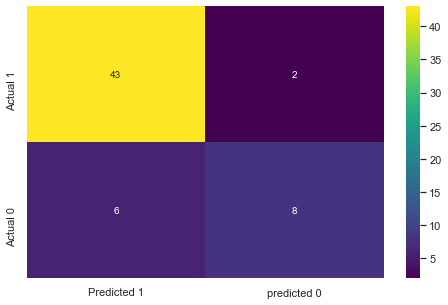

In [386]:
cm_xgbc_tune2 = metrics.confusion_matrix(y2_test, y2_pred_xgbc_tune, labels = [1,0])

df_cm_xgbc_tune2 = pd.DataFrame(cm_xgbc_tune2, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc_tune2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 43
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 08
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 06 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 02 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - XGBoost Classifier after tuning

In [387]:
print(metrics.classification_report(y2_test,y2_pred_xgbc_tune, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.88      0.96      0.91        45

    accuracy                           0.86        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.86      0.86      0.86        59



In [388]:
tempresultsdf_minmax = pd.DataFrame({'Method_scaling(MinMax Scalar)': ['XGBoost with tuning'], 'Accuracy(%)': [xgbc_tune2.score(x2_test, y2_test)*100]})
resultsdf_minmax = pd.concat([resultsdf_minmax, tempresultsdf_minmax])
resultsdf_minmax = resultsdf_minmax[['Method_scaling(MinMax Scalar)', 'Accuracy(%)']]
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441
0                           KNN    91.525424
0                           SVM    76.271186
0      Random Forest w/o tuning    93.220339
0     Random Forest with tuning    89.830508
0            XGBoost w/o tuning    93.220339
0           XGBoost with tuning    86.440678

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.c. Train and Test using Stacking
<a id='O3S'></a>

In [389]:
# assigning various techniques / models to be used in stacking
clf1 = BaggingClassifier(random_state = 39)
clf2 = AdaBoostClassifier(random_state = 39)
clf3 = RandomForestClassifier(random_state = 39)
clf4 = GaussianNB()
clf5 = LGBMClassifier(random_state = 39)

In [390]:
# making a meatal model for stacking
mc = GradientBoostingClassifier(random_state = 39)

In [391]:
# assigning the stacking model to perform 
sclf = StackingClassifier(classifiers = [clf1,clf2,clf3,clf4,clf5], meta_classifier = mc)

In [392]:
# checking for accuracy for both meta model and normal model
for clf, label in zip([clf1,clf2,clf3,clf4,clf5,sclf],['BaggingClassifier','AdaBoostClassifier', 'RandomForestClassifier', 'GaussianNB', 'LGBMClassifier','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X2, y2, cv = 10, scoring= 'accuracy')
    print('Accuracy: %0.2f (+/- %0.2f) [%s]'% (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.10) [BaggingClassifier]
Accuracy: 0.85 (+/- 0.08) [AdaBoostClassifier]
Accuracy: 0.82 (+/- 0.11) [RandomForestClassifier]
Accuracy: 0.66 (+/- 0.16) [GaussianNB]
Accuracy: 0.88 (+/- 0.08) [LGBMClassifier]
Accuracy: 0.86 (+/- 0.09) [StackingClassifier]


<font color = blue>
    
- Among all the models including meta model, LGBM Classifier gives highest accuracy. However, if we consider the Random Forest, it has an accuracy of 82% which is not bad but it has a high variance, by which the accuracy may decrease for some data sets. It can also be noted that, in this dataset after Scaling with MinMaxScalar, Meta Classifier has gained its accuracy value with low variance 

<font color = green>

### Using Probabilities in Stacking

In [393]:
clf11 = KNeighborsClassifier(n_neighbors=1)
clf22 = RandomForestClassifier(random_state=1)
clf33 = GaussianNB()

In [394]:
lr = LogisticRegression()

In [395]:
sclf_Prb = StackingClassifier(classifiers = [clf11,clf22,clf33], use_probas=True,
                          average_probas=False, meta_classifier = lr)

In [396]:
for clf, label in zip([clf11,clf22,clf33,sclf_Prb],
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X2, y2, cv = 3, scoring= 'accuracy')
    print('Accuracy: %0.2f (+/- %0.2f) [%s]'% (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.06) [KNN]
Accuracy: 0.83 (+/- 0.05) [Random Forest]
Accuracy: 0.67 (+/- 0.01) [Naive Bayes]
Accuracy: 0.86 (+/- 0.08) [StackingClassifier]


<font color = blue>
    
- Among all the models including meta model, here after Scaling with the help of MinMax Scalar, KNN is giving maximum accuracy with MetaClassifer accuracy of 86%

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.d. Observations on accuracies with MinMax Scalar
<a id='O3O'></a>

In [397]:
resultsdf_minmax

Method_scaling(MinMax Scalar)  Accuracy(%)
0           Logistic Regression    86.440678
0                           GNB    71.186441
0                           KNN    91.525424
0                           SVM    76.271186
0      Random Forest w/o tuning    93.220339
0     Random Forest with tuning    89.830508
0            XGBoost w/o tuning    93.220339
0           XGBoost with tuning    86.440678

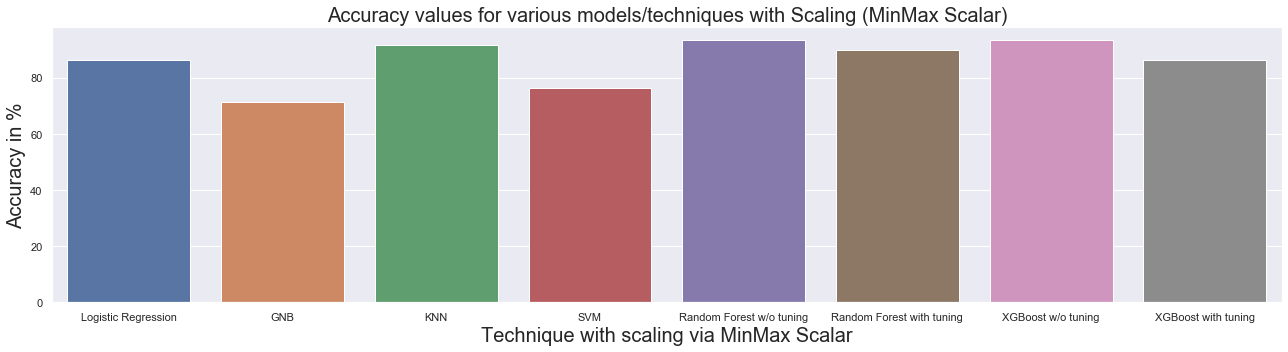

In [618]:
fig = plt.figure(figsize = (18,5))
plt.title ('Accuracy values for various models/techniques with Scaling (MinMax Scalar)',y=1, size = 20)

sns.barplot(y = resultsdf_minmax['Accuracy(%)'], x = resultsdf_minmax['Method_scaling(MinMax Scalar)'] );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique with scaling via MinMax Scalar', size = 20)
plt.tight_layout()

<font color = blue>

- It can be observed that, the maximum accuracy has been attained by Random Forest and XGBoost which is around 93%. Whereas the training accuracy for both the Random Forest and XGBoost is 100%, straight way it signifies the overfitting of model with inclusion of noise. Hence to avoid such kind of complexity, we have tuned these two models, after tuning, we have 89% & 86% accuracy for Random Forest & XGBoost models respectively, and the accuracy of SVM decreased after using MinMax Scalar, thus the maximum accuracy has been attained by KNN model followed by Random Forest.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 8. Operation -4 With MinMax Scaling & Column Deletion
<a id='O4SE'></a>

<font color = grey>

Here we will be checking the p-value and correlation of each independent columns, based upon the correlation value (>0.95), we will delete the columns, and by taking some selective columns with MinMax Sclar normalisation, we will be checking the accuracy values of all models.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   8.a. Train and test using Standard Classification Algorithms
<a id='O4SC'></a>

<font color = tiel>

### Logistic Regression

In [481]:
 
# Fit the model on train
model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(x2_train, y2_train)

# Predict on test
y2_predict = model_lr.predict(x2_test)


In [482]:
model_score_train = model_lr.score(x2_train, y2_train)
print('The accuracy of train model is {0:0.2f}%'.format(model_score_train*100))

model_score_test = model_lr.score(x2_test, y2_test)
print("The accuracy of Test model is {0:0.2f}% ".format(model_score_test*100))

The accuracy of train model is 85.29%
The accuracy of Test model is 86.44% 


In [483]:
logit1 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg1 = logit1.fit()
lg1.summary()

         Current function value: inf
         Iterations: 35


C:\Users\VAIO\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\VAIO\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

<font color = red>

>> The above error is coming may be due to Duplicate columns or the columns having a correlation score of 1.0 resulting in singularity, or we have two features that are perfectly correleted. Thus to avoid such kind of problem we will have to drop some of the columns before doing any further operation.
   
>> Columns such as MDVP_RAP and Jitter_DDP; Shimmer_APQ3 & Shimmer_DDA; are having a correlation value of 1.0 with each other. Hence, here will drop any two among them.


In [484]:
x2_train = x2_train.drop(['MDVP_RAP', 'Shimmer_APQ3' ], axis =1)
#Fit the model on train
model_lr1 = LogisticRegression(solver = 'liblinear')
model_lr1.fit(x2_train, y2_train)

# Predict on test
x2_test = x2_test.drop(['MDVP_RAP', 'Shimmer_APQ3' ], axis =1)
y2_predict1 = model_lr1.predict(x2_test)

In [485]:
model_score_train1 = model_lr1.score(x2_train, y2_train)
print('The accuracy of train model is {0:0.2f}%'.format(model_score_train1*100))

model_score_test1 = model_lr1.score(x2_test, y2_test)
print("The accuracy of Test model is {0:0.2f}% ".format(model_score_test1*100))

The accuracy of train model is 85.29%
The accuracy of Test model is 86.44% 


In [486]:
logit1 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg1 = logit1.fit()
lg1.summary()

Optimization terminated successfully.
         Current function value: 0.204252
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                           20
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.6368
Time:                        23:17:12   Log-Likelihood:                -27.778
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 3.669e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.0044      6.886     -0.872      0.383     -19.500       7.491
MDVP_Fo_Hz        -10.5041      5.697     -1.844      0.065     -21.670       0.662
MDVP_Fhi_Hz         2.0479      6.284      0.326      0.745     -10.269      14.365
MDVP_Flo_Hz         0.6863      2.883      0.238      0.812      -4.963       6.336
MDVP_Jitter_per   -38.3540     50.135     -0.765      0.444    -136.617      59.909
MDVP_Jitter_Abs   -40.9995     31.359     -1.307      0.191    -102.463      20.464
MDVP_PPQ          -30.8751     46.081     -0.670      0.503    -121.191      59.441
Jitter_DDP        112.1483     39.631      2.830      0.005      34.473     189.823
MDVP_Shimmer     -101.5389    105.743     -0.960      0.337    -308.792     105.714
MDVP_Shimmer_dB   -14.4882     58.755     -0.247      0.805    -129.647     100.670
Shimmer_APQ5       25.3071     46.662      0.542      0.588     -66.149     116.763
MDVP_APQ           47.3272     48.384      0.978      0.328     -47.504     142.159
Shimmer_DDA        55.1424     54.515      1.012      0.312     -51.704     161.989
NHR                 0.4434     21.840      0.020      0.984     -42.362      43.248
HNR                 3.3613      7.029      0.478      0.632     -10.415      17.137
RPDE               -4.5630      3.281     -1.391      0.164     -10.995       1.869
DFA                 1.4241      2.849      0.500      0.617      -4.159       7.008
spread1             5.6092     13.218      0.424      0.671     -20.298      31.516
spread2             9.6651      4.123      2.344      0.019       1.583      17.747
D2                  3.5823      4.833      0.741      0.459      -5.891      13.056
PPE                14.1752     17.493      0.810      0.418     -20.111      48.462
===================================================================================
"""

In [487]:
#ways of dropping variables:
#significance of variables (p-values)
#VIF--variance inflation factor

#Computing VIF
#VIF=1/1-r^2
#create a dataframe which will contain all the features and their respective VIF values
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features      VIF
7      MDVP_Shimmer  2321.77
11      Shimmer_DDA   713.29
3   MDVP_Jitter_per   373.87
9      Shimmer_APQ5   255.24
5          MDVP_PPQ   234.94
8   MDVP_Shimmer_dB   225.78
6        Jitter_DDP   182.75
10         MDVP_APQ   159.57
19              PPE   145.19
16          spread1   111.36
4   MDVP_Jitter_Abs   109.46
13              HNR    27.28
18               D2    23.71
0        MDVP_Fo_Hz    22.57
17          spread2    19.21
12              NHR    18.57
15              DFA    18.08
14             RPDE    13.45
2       MDVP_Flo_Hz     4.91
1       MDVP_Fhi_Hz     4.37

<font color = Blue>
    
**Assumption:**

a) A VIF value of 1 indicates there is no relationship / correlation between independent variables and any others.

b) A VIF value between 1 to 5 shows a moderate correlation but not severe enough to warrant corrective measures.

c) A VIF value greater than 5 shows critical levels of multicollinearity and the p value to be checked for.

Thus, Here, we will remove the one by one which are having VIF>5 and p > 0.05

<font color = green>

The column 'MDVP_Shimmer' has a VIF of 2321.77 and p-value of 0.337, which is far above our threshold value of 5 and 0.05 respectively.
Therefor, we will drop the column first and again check for the VIF value of others.

In [488]:
x2_train = x2_train.drop(['MDVP_Shimmer'], axis = 1)
logit2 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg2 = logit2.fit()
lg2.summary()

Optimization terminated successfully.
         Current function value: 0.207545
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                           19
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.6309
Time:                        23:17:14   Log-Likelihood:                -28.226
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 2.290e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.5776      6.535     -0.701      0.484     -17.385       8.230
MDVP_Fo_Hz         -9.8378      5.755     -1.709      0.087     -21.118       1.442
MDVP_Fhi_Hz         2.2757      6.654      0.342      0.732     -10.765      15.316
MDVP_Flo_Hz         0.7760      2.803      0.277      0.782      -4.717       6.269
MDVP_Jitter_per   -39.7237     49.774     -0.798      0.425    -137.280      57.832
MDVP_Jitter_Abs   -41.4348     31.297     -1.324      0.186    -102.776      19.906
MDVP_PPQ          -19.0442     44.014     -0.433      0.665    -105.310      67.222
Jitter_DDP         99.8899     35.806      2.790      0.005      29.712     170.068
MDVP_Shimmer_dB   -18.9809     55.380     -0.343      0.732    -127.524      89.562
Shimmer_APQ5       -3.7055     34.020     -0.109      0.913     -70.384      62.973
MDVP_APQ           12.2486     32.224      0.380      0.704     -50.909      75.407
Shimmer_DDA        11.6674     29.414      0.397      0.692     -45.984      69.319
NHR                -2.3882     21.833     -0.109      0.913     -45.180      40.404
HNR                 1.5645      6.554      0.239      0.811     -11.282      14.411
RPDE               -3.7739      3.020     -1.250      0.211      -9.693       2.145
DFA                 1.7675      2.776      0.637      0.524      -3.673       7.208
spread1             4.6605     12.936      0.360      0.719     -20.694      30.015
spread2             8.2311      3.597      2.288      0.022       1.180      15.282
D2                  4.1365      4.788      0.864      0.388      -5.248      13.521
PPE                14.6660     17.523      0.837      0.403     -19.678      49.010
===================================================================================
"""

In [489]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features     VIF
3   MDVP_Jitter_per  369.50
5          MDVP_PPQ  217.19
7   MDVP_Shimmer_dB  198.11
6        Jitter_DDP  180.53
18              PPE  144.68
8      Shimmer_APQ5  138.01
10      Shimmer_DDA  118.42
15          spread1  111.33
4   MDVP_Jitter_Abs  109.32
9          MDVP_APQ   77.65
12              HNR   26.43
17               D2   23.69
0        MDVP_Fo_Hz   21.64
16          spread2   19.15
11              NHR   18.53
14              DFA   17.37
13             RPDE   13.13
2       MDVP_Flo_Hz    4.90
1       MDVP_Fhi_Hz    4.20

<font color = green>

The column 'MDVP_Jitter_per' has a VIF of 395.50 and p-value of 0.425, which is far above our threshold value of 5 and 0.05 respectively.
Therefor, we will drop the column first and again check for the VIF value of others.

In [490]:
x2_train = x2_train.drop(['MDVP_Jitter_per'], axis = 1)
logit3 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg3 = logit3.fit()
lg3.summary()

Optimization terminated successfully.
         Current function value: 0.209995
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      117
Method:                           MLE   Df Model:                           18
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.6266
Time:                        23:17:15   Log-Likelihood:                -28.559
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 1.274e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.5223      6.509     -0.848      0.396     -18.280       7.235
MDVP_Fo_Hz        -11.2466      5.708     -1.970      0.049     -22.434      -0.059
MDVP_Fhi_Hz         2.3314      7.002      0.333      0.739     -11.393      16.056
MDVP_Flo_Hz         1.2762      2.739      0.466      0.641      -4.092       6.645
MDVP_Jitter_Abs   -56.9657     25.436     -2.240      0.025    -106.820      -7.112
MDVP_PPQ          -35.8661     39.208     -0.915      0.360    -112.712      40.980
Jitter_DDP         89.5907     32.257      2.777      0.005      26.368     152.814
MDVP_Shimmer_dB   -17.3359     55.942     -0.310      0.757    -126.980      92.308
Shimmer_APQ5       11.8816     28.367      0.419      0.675     -43.717      67.480
MDVP_APQ            4.3149     29.924      0.144      0.885     -54.335      62.965
Shimmer_DDA         4.4837     26.961      0.166      0.868     -48.359      57.326
NHR                -5.1521     20.503     -0.251      0.802     -45.337      35.033
HNR                 3.3184      6.150      0.540      0.589      -8.736      15.372
RPDE               -3.0646      2.878     -1.065      0.287      -8.706       2.577
DFA                 1.2351      2.721      0.454      0.650      -4.097       6.567
spread1             5.7302     12.818      0.447      0.655     -19.392      30.852
spread2             7.4808      3.359      2.227      0.026       0.897      14.065
D2                  4.4969      4.804      0.936      0.349      -4.919      13.912
PPE                15.3719     17.629      0.872      0.383     -19.181      49.925
===================================================================================
"""

In [491]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features     VIF
6   MDVP_Shimmer_dB  198.10
5        Jitter_DDP  151.13
4          MDVP_PPQ  143.17
17              PPE  143.03
9       Shimmer_DDA  116.09
14          spread1  110.83
7      Shimmer_APQ5  109.43
3   MDVP_Jitter_Abs   82.37
8          MDVP_APQ   68.87
11              HNR   25.11
16               D2   23.42
0        MDVP_Fo_Hz   19.09
15          spread2   18.42
10              NHR   17.74
13              DFA   17.29
12             RPDE   12.54
2       MDVP_Flo_Hz    4.48
1       MDVP_Fhi_Hz    4.20

<font color = green>

The column 'MDVP_Shimmer_dB' has a VIF of 198.10 and p-value of 0.757, which is far above our threshold value of 5 and 0.05 respectively.
Therefor, we will drop the column first and again check for the VIF value of others.

In [492]:
x2_train = x2_train.drop(['MDVP_Shimmer_dB'], axis = 1)
logit4 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg4 = logit4.fit()
lg4.summary()

Optimization terminated successfully.
         Current function value: 0.210355
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                           17
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.6259
Time:                        23:17:17   Log-Likelihood:                -28.608
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 5.445e-13
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.6354      6.497     -0.867      0.386     -18.370       7.099
MDVP_Fo_Hz        -10.9224      5.457     -2.001      0.045     -21.619      -0.226
MDVP_Fhi_Hz         1.3777      5.829      0.236      0.813     -10.048      12.803
MDVP_Flo_Hz         1.3835      2.701      0.512      0.609      -3.911       6.678
MDVP_Jitter_Abs   -59.2840     24.609     -2.409      0.016    -107.516     -11.052
MDVP_PPQ          -39.2169     37.465     -1.047      0.295    -112.646      34.212
Jitter_DDP         91.4197     32.075      2.850      0.004      28.555     154.285
Shimmer_APQ5        8.3111     25.118      0.331      0.741     -40.920      57.542
MDVP_APQ            0.0623     27.211      0.002      0.998     -53.270      53.394
Shimmer_DDA        -2.6032     14.265     -0.182      0.855     -30.562      25.355
NHR                -4.1893     20.033     -0.209      0.834     -43.453      35.074
HNR                 3.2617      6.075      0.537      0.591      -8.644      15.168
RPDE               -2.6658      2.567     -1.038      0.299      -7.697       2.366
DFA                 1.3834      2.631      0.526      0.599      -3.774       6.541
spread1             5.1163     12.646      0.405      0.686     -19.669      29.902
spread2             7.3483      3.286      2.236      0.025       0.907      13.790
D2                  4.3282      4.756      0.910      0.363      -4.992      13.649
PPE                17.2118     16.782      1.026      0.305     -15.680      50.103
===================================================================================
"""

In [493]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features     VIF
5        Jitter_DDP  144.82
16              PPE  120.88
6      Shimmer_APQ5  109.39
13          spread1  106.94
4          MDVP_PPQ  106.72
3   MDVP_Jitter_Abs   82.26
8       Shimmer_DDA   71.05
7          MDVP_APQ   35.08
10              HNR   25.03
15               D2   22.34
0        MDVP_Fo_Hz   19.03
14          spread2   18.38
9               NHR   17.53
12              DFA   17.27
11             RPDE   12.27
2       MDVP_Flo_Hz    4.47
1       MDVP_Fhi_Hz    3.90

<font color = green>

The column 'Jitter_DDP' has a VIF of 144.82 which is far above our threshold value of 5 and p-value of 0.004, which is far below our threshold value of 0.05 therefore, we will retain the same, and move on to next feature to check.
    
The column 'PPE' has a VIF of 120.88 and p-value of 0.305, which is far above our threshold value of 5 and 0.05 respectively.
    
Therefor, we will drop the column first and again check for the VIF value of others..

In [494]:
x2_train = x2_train.drop(['PPE'], axis = 1)
logit5 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg5 = logit5.fit()
lg5.summary()

Optimization terminated successfully.
         Current function value: 0.214510
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                           16
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.6185
Time:                        23:17:18   Log-Likelihood:                -29.173
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 3.513e-13
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.2050      6.408     -0.812      0.417     -17.764       7.354
MDVP_Fo_Hz        -10.7340      5.373     -1.998      0.046     -21.266      -0.203
MDVP_Fhi_Hz         1.8870      5.896      0.320      0.749      -9.668      13.442
MDVP_Flo_Hz         1.4631      2.570      0.569      0.569      -3.575       6.501
MDVP_Jitter_Abs   -54.8510     24.122     -2.274      0.023    -102.130      -7.572
MDVP_PPQ          -30.1270     34.194     -0.881      0.378     -97.145      36.892
Jitter_DDP         85.3337     29.430      2.900      0.004      27.653     143.015
Shimmer_APQ5        7.6638     26.346      0.291      0.771     -43.973      59.301
MDVP_APQ            5.0418     27.480      0.183      0.854     -48.819      58.903
Shimmer_DDA        -3.2346     14.954     -0.216      0.829     -32.543      26.074
NHR               -13.5747     16.343     -0.831      0.406     -45.607      18.458
HNR                 2.7042      6.114      0.442      0.658      -9.279      14.688
RPDE               -2.7653      2.590     -1.068      0.286      -7.842       2.311
DFA                 1.0467      2.544      0.411      0.681      -3.939       6.033
spread1            17.2036      5.750      2.992      0.003       5.934      28.473
spread2             7.3136      3.249      2.251      0.024       0.945      13.682
D2                  3.9806      4.613      0.863      0.388      -5.060      13.022
===================================================================================
"""

In [495]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features     VIF
5        Jitter_DDP  136.29
6      Shimmer_APQ5  109.00
4          MDVP_PPQ  104.70
8       Shimmer_DDA   68.79
3   MDVP_Jitter_Abs   68.01
7          MDVP_APQ   33.45
13          spread1   30.69
10              HNR   23.46
15               D2   22.31
14          spread2   18.29
0        MDVP_Fo_Hz   18.11
12              DFA   17.08
9               NHR   17.05
11             RPDE   12.26
2       MDVP_Flo_Hz    4.46
1       MDVP_Fhi_Hz    3.89

<font color = green>

Considering the VIF value as 136.29 and p-score as 0.004, we will delete the column 'Jitter_DDP'.

In [496]:
x2_train = x2_train.drop(['Jitter_DDP'], axis = 1)
logit6 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg6 = logit6.fit()
lg6.summary()

Optimization terminated successfully.
         Current function value: 0.258599
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                           15
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.5401
Time:                        23:17:19   Log-Likelihood:                -35.169
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 2.314e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.1871      5.475     -1.313      0.189     -17.918       3.543
MDVP_Fo_Hz         -5.9071      3.895     -1.516      0.129     -13.542       1.728
MDVP_Fhi_Hz        -1.9857      2.788     -0.712      0.476      -7.450       3.479
MDVP_Flo_Hz         0.1733      2.091      0.083      0.934      -3.926       4.272
MDVP_Jitter_Abs   -42.2224     20.448     -2.065      0.039     -82.300      -2.145
MDVP_PPQ           38.9395     24.625      1.581      0.114      -9.324      87.203
Shimmer_APQ5      -24.7061     25.046     -0.986      0.324     -73.795      24.382
MDVP_APQ           23.8224     25.768      0.924      0.355     -26.683      74.328
Shimmer_DDA        11.4029     12.080      0.944      0.345     -12.273      35.079
NHR                 2.4890      9.927      0.251      0.802     -16.967      21.945
HNR                 4.7168      5.302      0.890      0.374      -5.674      15.108
RPDE               -2.0067      2.390     -0.840      0.401      -6.690       2.677
DFA                 1.3928      2.427      0.574      0.566      -3.365       6.150
spread1            12.9446      4.581      2.826      0.005       3.966      21.924
spread2             3.0487      2.766      1.102      0.270      -2.373       8.470
D2                  7.0665      4.075      1.734      0.083      -0.919      15.052
===================================================================================
"""

In [497]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
5      Shimmer_APQ5  67.44
3   MDVP_Jitter_Abs  56.23
7       Shimmer_DDA  51.16
4          MDVP_PPQ  49.41
12          spread1  30.55
6          MDVP_APQ  30.48
9               HNR  22.78
14               D2  20.86
11              DFA  17.08
13          spread2  16.59
0        MDVP_Fo_Hz  16.01
8               NHR  14.12
10             RPDE  12.26
2       MDVP_Flo_Hz   4.46
1       MDVP_Fhi_Hz   3.68

<font color = green>

Considering the VIF value as 67.44 (>5) and p-score as 0.324 (>0.05), we will delete the column 'Shimmer_APQ5'.

In [498]:
x2_train = x2_train.drop(['Shimmer_APQ5'], axis = 1)
logit7 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg7 = logit7.fit()
lg7.summary()

Optimization terminated successfully.
         Current function value: 0.262152
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      121
Method:                           MLE   Df Model:                           14
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.5338
Time:                        23:17:21   Log-Likelihood:                -35.653
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 1.397e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.1945      5.398     -1.333      0.183     -17.774       3.385
MDVP_Fo_Hz         -5.2863      3.655     -1.446      0.148     -12.451       1.878
MDVP_Fhi_Hz        -2.0866      2.771     -0.753      0.451      -7.518       3.345
MDVP_Flo_Hz        -0.3399      2.030     -0.167      0.867      -4.319       3.640
MDVP_Jitter_Abs   -33.3420     17.514     -1.904      0.057     -67.668       0.984
MDVP_PPQ           30.6805     22.342      1.373      0.170     -13.109      74.470
MDVP_APQ            6.9452     19.150      0.363      0.717     -30.587      44.478
Shimmer_DDA         4.1482      8.617      0.481      0.630     -12.741      21.038
NHR                 1.5573     10.538      0.148      0.883     -19.096      22.211
HNR                 5.4965      5.147      1.068      0.286      -4.592      15.585
RPDE               -2.4871      2.352     -1.057      0.290      -7.097       2.123
DFA                 1.0449      2.435      0.429      0.668      -3.727       5.816
spread1            12.3981      4.512      2.748      0.006       3.556      21.241
spread2             3.8803      2.670      1.453      0.146      -1.353       9.113
D2                  5.6562      3.709      1.525      0.127      -1.613      12.925
===================================================================================
"""

In [499]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3   MDVP_Jitter_Abs  53.94
4          MDVP_PPQ  42.53
11          spread1  30.16
5          MDVP_APQ  25.07
8               HNR  22.61
6       Shimmer_DDA  20.75
13               D2  20.61
10              DFA  17.08
12          spread2  16.53
0        MDVP_Fo_Hz  15.97
7               NHR  12.69
9              RPDE  11.95
2       MDVP_Flo_Hz   4.43
1       MDVP_Fhi_Hz   3.59

<font color = green>

Considering the VIF value as 53.94 (>5) and p-score as 0.057 (>0.05), we will delete the column 'MDVP_Jitter_Abs'.

In [500]:
x2_train = x2_train.drop(['MDVP_Jitter_Abs'], axis = 1)
logit8 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg8 = logit8.fit()
lg8.summary()

Optimization terminated successfully.
         Current function value: 0.276165
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                           13
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.5089
Time:                        23:17:25   Log-Likelihood:                -37.558
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 2.809e-11
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.2051      5.091     -1.022      0.307     -15.184       4.774
MDVP_Fo_Hz     -0.8862      2.676     -0.331      0.741      -6.131       4.359
MDVP_Fhi_Hz    -1.2397      2.983     -0.416      0.678      -7.086       4.607
MDVP_Flo_Hz    -0.8637      1.758     -0.491      0.623      -4.308       2.581
MDVP_PPQ       -2.8885     12.653     -0.228      0.819     -27.687      21.910
MDVP_APQ       14.9122     18.795      0.793      0.428     -21.925      51.749
Shimmer_DDA    -2.0139      7.893     -0.255      0.799     -17.485      13.457
NHR            -3.4659     10.280     -0.337      0.736     -23.614      16.682
HNR             1.4652      4.457      0.329      0.742      -7.271      10.201
RPDE           -3.0502      2.227     -1.370      0.171      -7.415       1.315
DFA             1.5564      2.298      0.677      0.498      -2.948       6.060
spread1        12.0843      4.564      2.647      0.008       3.138      21.031
spread2         2.5979      2.427      1.071      0.284      -2.158       7.354
D2              3.7005      3.439      1.076      0.282      -3.040      10.441
===============================================================================
"""

In [501]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
10      spread1  28.95
3      MDVP_PPQ  20.76
12           D2  20.36
7           HNR  19.36
4      MDVP_APQ  17.92
9           DFA  17.06
11      spread2  16.50
5   Shimmer_DDA  15.88
8          RPDE  11.53
0    MDVP_Fo_Hz  11.09
6           NHR   9.07
2   MDVP_Flo_Hz   4.43
1   MDVP_Fhi_Hz   3.52

<font color = green>

Considering the VIF value as 28.95 (>5) and p-score as 0.008 (<0.05), we will delete the column 'spread1'.

In [502]:
x2_train = x2_train.drop(['spread1'], axis = 1)
logit9 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg9 = logit9.fit()
lg9.summary()

Optimization terminated successfully.
         Current function value: 0.309366
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      123
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.4499
Time:                        23:17:27   Log-Likelihood:                -42.074
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 5.350e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.7383      4.098     -0.424      0.671      -9.770       6.293
MDVP_Fo_Hz     -3.7510      2.344     -1.601      0.109      -8.344       0.842
MDVP_Fhi_Hz    -0.4968      2.692     -0.185      0.854      -5.773       4.779
MDVP_Flo_Hz    -0.5693      1.637     -0.348      0.728      -3.778       2.640
MDVP_PPQ       14.3483     10.552      1.360      0.174      -6.333      35.029
MDVP_APQ       17.7060     18.598      0.952      0.341     -18.745      54.157
Shimmer_DDA    -3.6059      8.002     -0.451      0.652     -19.289      12.077
NHR           -14.9972      8.040     -1.865      0.062     -30.756       0.761
HNR            -0.4162      3.898     -0.107      0.915      -8.055       7.223
RPDE           -1.6857      1.910     -0.882      0.378      -5.430       2.058
DFA             0.2148      2.115      0.102      0.919      -3.931       4.361
spread2         4.1243      2.207      1.868      0.062      -0.202       8.451
D2              6.4099      3.256      1.969      0.049       0.028      12.792
===============================================================================
"""

In [503]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
7           HNR  18.44
4      MDVP_APQ  17.92
11           D2  17.52
9           DFA  16.90
10      spread2  15.85
5   Shimmer_DDA  15.84
3      MDVP_PPQ  13.85
0    MDVP_Fo_Hz   9.86
8          RPDE   8.65
6           NHR   7.69
2   MDVP_Flo_Hz   4.41
1   MDVP_Fhi_Hz   3.50

<font color = green>

Considering the VIF value as 18.44 (>5) and p-score as 0.915 (>0.05), we will delete the column 'HNR'.

In [504]:
x2_train = x2_train.drop(['HNR'], axis = 1)
logit10 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg10 = logit10.fit()
lg10.summary()

Optimization terminated successfully.
         Current function value: 0.309408
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      124
Method:                           MLE   Df Model:                           11
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.4498
Time:                        23:17:31   Log-Likelihood:                -42.080
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 2.068e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1092      2.174     -0.970      0.332      -6.370       2.151
MDVP_Fo_Hz     -3.6823      2.253     -1.634      0.102      -8.098       0.734
MDVP_Fhi_Hz    -0.4921      2.707     -0.182      0.856      -5.797       4.813
MDVP_Flo_Hz    -0.6065      1.605     -0.378      0.706      -3.753       2.540
MDVP_PPQ       14.6030     10.290      1.419      0.156      -5.566      34.772
MDVP_APQ       17.9295     18.538      0.967      0.333     -18.405      54.264
Shimmer_DDA    -3.5150      8.001     -0.439      0.660     -19.196      12.166
NHR           -15.0430      8.064     -1.865      0.062     -30.849       0.763
RPDE           -1.5950      1.709     -0.933      0.351      -4.945       1.755
DFA             0.2177      2.117      0.103      0.918      -3.932       4.367
spread2         4.0691      2.143      1.899      0.058      -0.131       8.269
D2              6.4779      3.197      2.026      0.043       0.211      12.744
===============================================================================
"""

In [505]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
10           D2  16.80
4      MDVP_APQ  16.15
9       spread2  15.64
5   Shimmer_DDA  15.47
3      MDVP_PPQ  13.41
8           DFA   9.64
0    MDVP_Fo_Hz   9.20
7          RPDE   7.79
6           NHR   7.56
2   MDVP_Flo_Hz   4.30
1   MDVP_Fhi_Hz   3.44

<font color = green>

Considering the VIF value as 16.80 (>5) and p-score as 0.043 (<0.05), we will delete the column 'D2'.

In [506]:
x2_train = x2_train.drop(['D2'], axis = 1)
logit11 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg11 = logit11.fit()
lg11.summary()

Optimization terminated successfully.
         Current function value: 0.326713
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                           10
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.4190
Time:                        23:17:35   Log-Likelihood:                -44.433
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 6.052e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1396      1.879     -0.074      0.941      -3.823       3.544
MDVP_Fo_Hz     -2.4635      2.133     -1.155      0.248      -6.644       1.717
MDVP_Fhi_Hz    -0.6839      2.636     -0.259      0.795      -5.850       4.483
MDVP_Flo_Hz    -1.1678      1.541     -0.758      0.449      -4.188       1.852
MDVP_PPQ       13.4192      9.539      1.407      0.159      -5.277      32.115
MDVP_APQ       25.9493     19.486      1.332      0.183     -12.243      64.141
Shimmer_DDA    -5.0180      8.840     -0.568      0.570     -22.343      12.307
NHR           -12.5567      7.710     -1.629      0.103     -27.667       2.554
RPDE           -2.7808      1.613     -1.724      0.085      -5.942       0.380
DFA            -0.3287      1.950     -0.169      0.866      -4.151       3.494
spread2         5.7898      1.993      2.905      0.004       1.883       9.696
===============================================================================
"""

In [507]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
5  Shimmer_DDA  15.24
4     MDVP_APQ  14.34
3     MDVP_PPQ  12.55
9      spread2  12.21
8          DFA   9.15
7         RPDE   7.78
6          NHR   6.84
0   MDVP_Fo_Hz   6.66
2  MDVP_Flo_Hz   4.09
1  MDVP_Fhi_Hz   3.43

<font color = green>

Considering the VIF value as 15.24 (>5) and p-score as 0.570 (>0.05), we will delete the column 'Shimmer_DDA'.

In [508]:
x2_train = x2_train.drop(['Shimmer_DDA'], axis = 1)
logit12 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg12 = logit12.fit()
lg12.summary()

Optimization terminated successfully.
         Current function value: 0.327950
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                            9
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.4168
Time:                        23:17:38   Log-Likelihood:                -44.601
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 2.521e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1431      1.814      0.079      0.937      -3.412       3.698
MDVP_Fo_Hz     -3.0158      1.929     -1.563      0.118      -6.797       0.766
MDVP_Fhi_Hz    -0.4254      2.668     -0.159      0.873      -5.655       4.804
MDVP_Flo_Hz    -1.0758      1.517     -0.709      0.478      -4.048       1.897
MDVP_PPQ       13.8878      9.503      1.461      0.144      -4.738      32.514
MDVP_APQ       16.0534      7.376      2.177      0.030       1.597      30.509
NHR           -13.6512      7.518     -1.816      0.069     -28.386       1.083
RPDE           -2.8955      1.597     -1.813      0.070      -6.026       0.235
DFA            -0.5715      1.897     -0.301      0.763      -4.290       3.147
spread2         6.0799      1.951      3.116      0.002       2.256       9.904
===============================================================================
"""

In [509]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3     MDVP_PPQ  12.54
8      spread2  11.77
7          DFA   8.26
6         RPDE   7.72
4     MDVP_APQ   7.19
0   MDVP_Fo_Hz   6.58
5          NHR   6.26
2  MDVP_Flo_Hz   4.02
1  MDVP_Fhi_Hz   3.43

<font color = green>

Considering the VIF value as 12.54 (>5) and p-score as 0.144 (>0.05), we will delete the column 'MDVP_PPQ'.

In [510]:
x2_train = x2_train.drop(['MDVP_PPQ'], axis = 1)
logit13 = sm.Logit(y2_train, sm.add_constant(x2_train))
lg13 = logit13.fit()
lg13.summary()

Optimization terminated successfully.
         Current function value: 0.336706
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                          Logit   Df Residuals:                      127
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.4012
Time:                        23:17:42   Log-Likelihood:                -45.792
converged:                       True   LL-Null:                       -76.478
Covariance Type:            nonrobust   LLR p-value:                 2.507e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6535      1.766     -0.370      0.711      -4.115       2.808
MDVP_Fo_Hz     -2.5121      1.811     -1.387      0.165      -6.062       1.038
MDVP_Fhi_Hz    -0.0034      2.569     -0.001      0.999      -5.039       5.033
MDVP_Flo_Hz    -1.3804      1.454     -0.949      0.343      -4.231       1.470
MDVP_APQ       19.5277      7.556      2.584      0.010       4.718      34.338
NHR            -4.9248      4.414     -1.116      0.265     -13.576       3.727
RPDE           -1.9823      1.448     -1.369      0.171      -4.821       0.856
DFA             0.8409      1.634      0.515      0.607      -2.361       4.043
spread2         5.7812      1.939      2.981      0.003       1.980       9.582
===============================================================================
"""

In [511]:
vif=pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.values,i) for i in range(x2_train.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
7      spread2  11.77
5         RPDE   7.32
6          DFA   6.52
0   MDVP_Fo_Hz   6.47
3     MDVP_APQ   5.13
2  MDVP_Flo_Hz   4.02
1  MDVP_Fhi_Hz   3.38
4          NHR   2.82

<font color = green>

Considering the VIF value as 11.77 (>5) and p-score as 0.003 (<0.05) for the column 'spread2', here onwards we will retain all the columns and calculate the accuracy for models

In [512]:
x2_test = x2_test.drop([ 'MDVP_Jitter_per','MDVP_Jitter_Abs','MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer','MDVP_Shimmer_dB',  
                        'Shimmer_APQ5','Shimmer_DDA', 'HNR', 'spread1','D2', 'PPE'], axis =1) 
#Fit the model on train
model_lr2 = LogisticRegression(solver = 'liblinear')
model_lr2.fit(x2_train, y2_train)

#predict on test
y2_predict2 = model_lr2.predict(x2_test)

In [526]:
model_score_train2 = model_lr2.score(x2_train, y2_train)
print('The accuracy of train model is {0:0.2f}%'.format(model_score_train2*100))

model_score_test2 = model_lr2.score(x2_test, y2_test)
print("The accuracy of Test model is {0:0.2f}% ".format(model_score_test2*100))

The accuracy of train model is 84.56%
The accuracy of Test model is 84.75% 


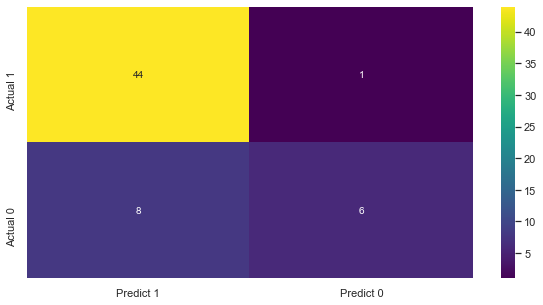

In [527]:
cm_VIF = metrics.confusion_matrix(y2_test, y2_predict2, labels = [1,0])
df_cm_VIF = pd.DataFrame(cm_VIF, index = [i for i in ['Actual 1', 'Actual 0']],
                                 columns = [i for i in ['Predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df_cm_VIF, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red' );


<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 6
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 8 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - Logistic

In [528]:
print(metrics.classification_report(y2_test, y2_predict2))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57        14
           1       0.85      0.98      0.91        45

    accuracy                           0.85        59
   macro avg       0.85      0.70      0.74        59
weighted avg       0.85      0.85      0.83        59



In [619]:
resultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['Logistic Regression'], 'Accuracy(%)': [model_score_test2*100]})
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763

<font color = violet>

### Classification Model - Naive Bayes

In [620]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB_fit = model_GNB.fit(x2_train, y2_train)

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

In [621]:
# To calculate the accuracy score of the model
y2_train_pred_GNB_VIF = model_GNB.predict(x2_train)
from sklearn.metrics import accuracy_score
print('Training model Accuracy: {0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_GNB_VIF)))
print()
y2_test_pred_GNB_VIF = model_GNB.predict(x2_test)
print('Testing Model Accuracy: {0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_GNB_VIF)))

Training model Accuracy: 0.74%

Testing Model Accuracy: 0.78%


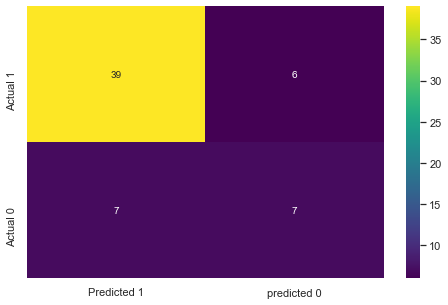

In [622]:
cmGNB2_VIF = metrics.confusion_matrix(y2_test, y2_test_pred_GNB_VIF, labels = [1,0])
df_cmGNB2_VIF = pd.DataFrame(cmGNB2_VIF, index = [ i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmGNB2_VIF, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 39
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 7
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error") 7 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error") 6 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - GNB

In [623]:
print(metrics.classification_report(y2_test, y2_test_pred_GNB_VIF, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.85      0.87      0.86        45
           0       0.54      0.50      0.52        14

    accuracy                           0.78        59
   macro avg       0.69      0.68      0.69        59
weighted avg       0.77      0.78      0.78        59



<font color = green>

Here f1-score is slightly more than 70%, however the FN value has decreased from the above GNB models (a drastical decrease has been observed after scaling the dataset with the help of VIF)..

In [624]:
tempresultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['GNB'], 'Accuracy(%)': [metrics.accuracy_score(y2_test, y2_test_pred_GNB_VIF)*100]})
resultsdf_minmax_VIF = pd.concat([resultsdf_minmax_VIF, tempresultsdf_minmax_VIF])
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102

<font color = violet>

### Classification Model - K-NN

Build the model and train, test on Training Set and Testing Set Respectively using Scikit-Learn. Print the accuracy of the model with different values of k = 3, 5, 9

In [625]:
# Loading Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Learning the model (k=3)
knn3 = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
knn_fit3 = knn3.fit(x2_train, y2_train)

y2_train_pred_knn3 = knn_fit3.predict(x2_train)
print('Training Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_knn3)))

y2_test_pred_knn3 = knn_fit3.predict(x2_test)
print('Testing Model Accuracy for k = 3:{0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn3)))
print()

# Learning the model (k=5)
knn5 = KNeighborsClassifier(n_neighbors = 5)

# Fitting the model
knn_fit5 = knn5.fit(x2_train, y2_train)

y2_train_pred_knn5 = knn_fit5.predict(x2_train)
print('Training Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_knn5)))

y2_test_pred_knn5 = knn_fit5.predict(x2_test)
print('Testing Model Accuracy for k = 5:{0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn5)))
print()

# Learning the model (k=9)
knn9 = KNeighborsClassifier(n_neighbors = 9)

# Fitting the model
knn_fit9 = knn9.fit(x2_train, y2_train)

y2_train_pred_knn9 = knn_fit9.predict(x2_train)
print('Training Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y2_train, y2_train_pred_knn9)))

y2_test_pred_knn9 = knn_fit9.predict(x2_test)
print('Testing Model Accuracy for k = 9:{0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn9)))
print()

Training Model Accuracy for k = 3:0.97%
Testing Model Accuracy for k = 3:0.88%

Training Model Accuracy for k = 5:0.98%
Testing Model Accuracy for k = 5:0.83%

Training Model Accuracy for k = 9:0.91%
Testing Model Accuracy for k = 9:0.88%



In [626]:
# Creating odd list of k for KNN
mylist = list(range(1,20))

# Substituting just the odd ones
neighbors = list(filter(lambda x: x % 2!=0, mylist))

#### Run the KNN with No. of Neighbours ranging from 1,3,5,9...19 and find the optimal number of neighbours from the above list using the Misclassification error

In [627]:
# Creating an empty list to hold accurcy scores
ac_scores = []

# Performing accuracy metrics for values from 1,3,5,7...19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x2_train, y2_train)
    # predict the response
    y2_predKNN = knn.predict(x2_test)
    # Evaluate accuracy
    scores = accuracy_score(y2_test, y2_predKNN)
    ac_scores.append(scores)
    
# Changing to miscalssification error
MSE = [1-x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The Optimal number of neighbors is %d'% optimal_k)

The Optimal number of neighbors is 1


#### Plot misclassification error vs k (with k value on x-axis) using matplotlib.

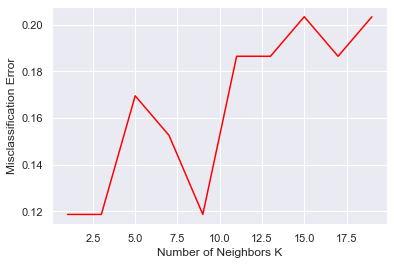

In [628]:
# Misclassification error Vs. K
plt.plot(neighbors, MSE, color = 'red')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Hence, the misclassification error is minimum at k valus of 1

In [629]:
# Using k = 7 for the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)
#  Fitting the model
knn_fit = knn.fit(x2_train, y2_train)

y2_train_pred_knn = knn_fit.predict(x2_train)

print('Training Model Accuracy value for k=1: {0:0.2f}% '.format(metrics.accuracy_score(y2_train, y2_train_pred_knn)))

print('Training Model recall value for k = 1:{0:0.2f}%'.format(metrics.recall_score(y2_train, y2_train_pred_knn)))
print()

y2_test_pred_knn = knn_fit.predict(x2_test)
print('Testing Model Accuracy value for k=1: {0:0.2f}%'.format(metrics.accuracy_score(y2_test, y2_test_pred_knn)))
print('Testing Model Recall value for k=1: {0:0.2f}%'.format(metrics.recall_score(y2_test, y2_test_pred_knn)))

Training Model Accuracy value for k=1: 1.00% 
Training Model recall value for k = 1:1.00%

Testing Model Accuracy value for k=1: 0.88%
Testing Model Recall value for k=1: 0.91%


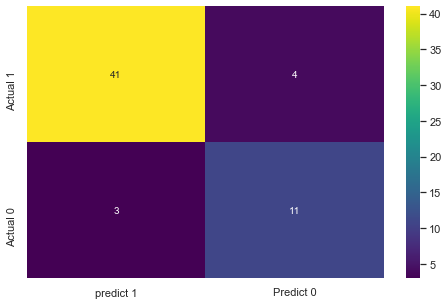

In [630]:
cmKNN2 = metrics.confusion_matrix(y2_test, y2_test_pred_knn, labels = [1,0])

df_cmKNN2 = pd.DataFrame(cmKNN2, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [i for i in ['predict 1', 'Predict 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmKNN2, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 41
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 03 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 04 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

<font color = green>
    
The FN value has been increased after scaling the data based upon the VIF and p-score

### Classification Report - KNN

In [631]:
print(metrics.classification_report(y2_test, y2_test_pred_knn, labels = [1,0]))

              precision    recall  f1-score   support

           1       0.93      0.91      0.92        45
           0       0.73      0.79      0.76        14

    accuracy                           0.88        59
   macro avg       0.83      0.85      0.84        59
weighted avg       0.88      0.88      0.88        59



In [632]:
tempresultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['KNN'], 'Accuracy(%)': [metrics.accuracy_score(y2_test, y2_test_pred_knn)*100]})
resultsdf_minmax_VIF = pd.concat([resultsdf_minmax_VIF, tempresultsdf_minmax_VIF])
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102
0                                    KNN    88.135593

<font color = violet>

### Classification model using SVM

In [633]:
from sklearn.svm import SVC

# Building a support vector Machine on train data
svc_model = SVC(C =0.1, kernel = 'linear', gamma = 1)
svc_fit_VIF = svc_model.fit(x2_train, y2_train)

y2_train_pred_svc_VIF = svc_fit_VIF.predict(x2_train)

print('Training Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y2_train,y2_train_pred_svc_VIF)))

y2_test_pred_svc_VIF = svc_fit_VIF.predict(x2_test)
print('Testing Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y2_test, y2_test_pred_svc_VIF)))

Training Model Accuracy value: 0.75%
Testing Model Accuracy value: 0.76%


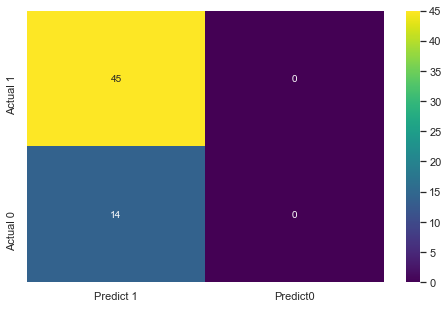

In [634]:
cmSVC2_VIF = metrics.confusion_matrix(y2_test, y2_test_pred_svc_VIF, labels = [1,0])
df_cmSVC2_VIF = pd.DataFrame(cmSVC2_VIF, index = [i for i in ['Actual 1', 'Actual 0']],
                       columns = [ i for i in ['Predict 1', 'Predict0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC2_VIF, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 45
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 0
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 14 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 0 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - SVM

In [635]:
print(metrics.classification_report(y2_test,y2_test_pred_svc_VIF, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.76      1.00      0.87        45

    accuracy                           0.76        59
   macro avg       0.38      0.50      0.43        59
weighted avg       0.58      0.76      0.66        59



C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [636]:
tempresultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['SVM'], 'Accuracy(%)': [accuracy_score(y2_test, y2_test_pred_svc_VIF)*100]})
resultsdf_minmax_VIF = pd.concat([resultsdf_minmax_VIF, tempresultsdf_minmax_VIF])
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102
0                                    KNN    88.135593
0                                    SVM    76.271186

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   8.b. Train and test using Standard Ensemble Models
<a id='O4SEM'></a>

<font color = violet>

### Random Forest Classifier

In [637]:
rfcl_VIF = RandomForestClassifier(n_estimators = 50, random_state = 559, max_features = 4)
rfcl_VIF = rfcl_VIF.fit(x2_train, y2_train)


y2_predict_rfcl_VIF = rfcl_VIF.predict(x2_test)

In [638]:
print(rfcl_VIF.score(x2_train, y2_train))
print(rfcl_VIF.score(x2_test, y2_test))

1.0
0.8983050847457628


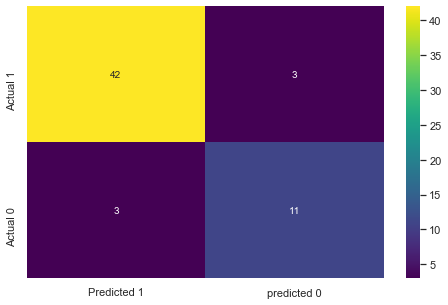

In [639]:
cm_rfcl2_VIF = metrics.confusion_matrix(y2_test, y2_predict_rfcl_VIF, labels = [1,0])

df_cm_rfcl2_VIF = pd.DataFrame(cm_rfcl2_VIF, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl2_VIF, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 1 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - Random Forest

In [640]:
print(metrics.classification_report(y2_test,y2_predict_rfcl_VIF, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.93      0.93      0.93        45

    accuracy                           0.90        59
   macro avg       0.86      0.86      0.86        59
weighted avg       0.90      0.90      0.90        59



In [641]:
tempresultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['Random Forest w/o tuning'], 'Accuracy(%)': [rfcl_VIF.score(x2_test, y2_test)*100]})
resultsdf_minmax_VIF = pd.concat([resultsdf_minmax_VIF, tempresultsdf_minmax_VIF])
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102
0                                    KNN    88.135593
0                                    SVM    76.271186
0               Random Forest w/o tuning    89.830508

<font color = green>

### RFCL model Hyper Parameter Tuning

In [642]:
rfcl_tuned_VIF = RandomForestClassifier(n_estimators = 50, random_state = 559, criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 4, min_samples_leaf=4)
rfcl_tuned_VIF = rfcl_tuned_VIF.fit(x2_train, y2_train)
test_pred_tuned_rfcl2_VIF = rfcl_tuned_VIF.predict(x2_test)

print(rfcl_tuned_VIF.score(x2_train, y2_train))
print(rfcl_tuned_VIF.score(x2_test, y2_test))

0.9338235294117647
0.847457627118644


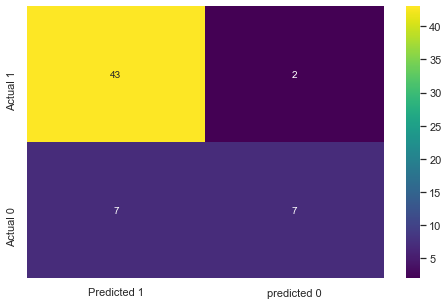

In [643]:
cm_rfcl_tuned2_VIF = metrics.confusion_matrix(y2_test, test_pred_tuned_rfcl2_VIF, labels = [1,0])

df_cm_rfcl_tuned2_VIF = pd.DataFrame(cm_rfcl_tuned2_VIF, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_rfcl_tuned2_VIF, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue> 

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 43
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 07
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 7 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 2 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

<font color = teal>

Compare to the VIF model without tuning , here with VIF & tuning of the hyper parameter we could decrease the value of FN by 1 only, but it is not better than the model without VIF.

### Classification Report - Random Forest after tuning

In [644]:
print(metrics.classification_report(y2_test,test_pred_tuned_rfcl2_VIF, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.86      0.96      0.91        45

    accuracy                           0.85        59
   macro avg       0.82      0.73      0.76        59
weighted avg       0.84      0.85      0.83        59



f1-score and accuracy of the test model were decreased but, the model is free from overfitting and met our requirement to minimize the value of False Negative 

In [645]:
tempresultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['Random Forest with tuning'], 'Accuracy(%)': [rfcl_tuned_VIF.score(x2_test, y2_test)*100]})
resultsdf_minmax_VIF = pd.concat([resultsdf_minmax_VIF, tempresultsdf_minmax_VIF])
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102
0                                    KNN    88.135593
0                                    SVM    76.271186
0               Random Forest w/o tuning    89.830508
0              Random Forest with tuning    84.745763

<font color = violet>

### XGBoost Classifier

In [646]:
xgbc_VIF = xgboost.XGBClassifier()
xgbc_VIF.fit(x2_train, y2_train)
# Predicting the Test set results
y2_pred_xgbc_VIF = xgbc_VIF.predict(x2_test)

In [647]:
print(xgbc_VIF.score(x2_train, y2_train))
print(xgbc_VIF.score(x2_test, y2_test))

1.0
0.8983050847457628


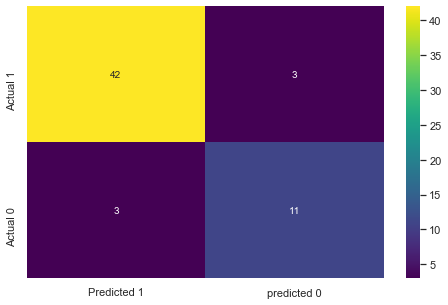

In [648]:
cm_xgbc2_VIF = metrics.confusion_matrix(y2_test, y2_pred_xgbc_VIF, labels = [1,0])

df_cm_xgbc2_VIF = pd.DataFrame(cm_xgbc2_VIF, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc2_VIF, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 42
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 11
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 3 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 3 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - XGBoost Classifier

In [649]:
print(metrics.classification_report(y2_test,y2_pred_xgbc_VIF, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.93      0.93      0.93        45

    accuracy                           0.90        59
   macro avg       0.86      0.86      0.86        59
weighted avg       0.90      0.90      0.90        59



In [650]:
tempresultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['XGBoost w/o tuning'], 'Accuracy(%)': [xgbc_VIF.score(x2_test, y2_test)*100]})
resultsdf_minmax_VIF = pd.concat([resultsdf_minmax_VIF, tempresultsdf_minmax_VIF])
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102
0                                    KNN    88.135593
0                                    SVM    76.271186
0               Random Forest w/o tuning    89.830508
0              Random Forest with tuning    84.745763
0                     XGBoost w/o tuning    89.830508

<font color = green>

### XGBoost model Hyper Parameter Tuning

In [651]:
# 'learning_rate' - Model learning rate defined
# 'max_depth'- maximum depth of the tree we want to be, for minimizing overfitting of model
# 'min_child_weight'- minimum weight of the child required in our model
# 'gamma'- gamma value should be as low as possible to control the complexity of the model
# 'colsample_bytree'- Defining the subsample ratio of the columns for each column split
    
    
xgbc_tune2_VIF = xgboost.XGBClassifier(booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=7, missing=None,
       n_estimators=100,random_state=293 )
xgbc_tune2_VIF.fit(x2_train, y2_train)
# Predicting the Test set results
y2_pred_xgbc_tune_VIF = xgbc_tune2_VIF.predict(x2_test)

In [652]:
print(xgbc_tune2_VIF.score(x2_train, y2_train))
print(xgbc_tune2_VIF.score(x2_test, y2_test))

0.9117647058823529
0.8983050847457628


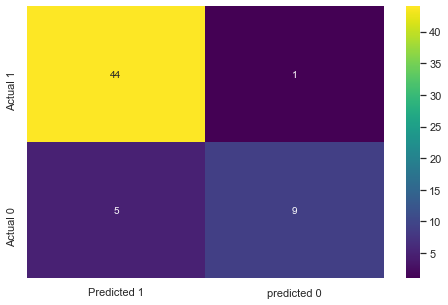

In [653]:
cm_xgbc_tune2_VIF = metrics.confusion_matrix(y2_test, y2_pred_xgbc_tune_VIF, labels = [1,0])

df_cm_xgbc_tune2_VIF = pd.DataFrame(cm_xgbc_tune2_VIF, index = [i for i in ['Actual 1', 'Actual 0']],
                         columns = [i for i in ['Predicted 1', 'predicted 0']])

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df_cm_xgbc_tune2_VIF, annot = True, fmt = 'g',cmap = colormap,linecolor = 'red');

<font color = blue>

### The confusion matrix Explanation:
#### True Positives (TP): we correctly predicted them as affected by PD and they turned out to be positive: 44
#### True Negatives (TN): we correctly predicted them that the patients are healthy and they turned out to be healthy: 09
#### False Positives (FP): we incorrectly predicted that the patients are affected by PD and actually they are healthy (a "Type I error"): 05 Falsely predict positive Type I error.
#### False Negatives (FN): we incorrectly predicted that the patients are healthy and actually all are turned out to be affected by PD (a "Type II error"): 01 Falsely predict negative Type II error
#### So, here we should be more concern about the FN value that is Type II error, because, there is a chance of misclassifiing such patients as Healthy and leave them to go freely without proper treatment, which can cost us some valuable lives.  Thus, our aim should be to minimise the value of FN to save patient's life by providing proper treatment.m

### Classification Report - XGBoost Classifier after tuning

In [654]:
print(metrics.classification_report(y2_test,y2_pred_xgbc_tune_VIF, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.90      0.98      0.94        45

    accuracy                           0.90        59
   macro avg       0.90      0.81      0.84        59
weighted avg       0.90      0.90      0.89        59



In [655]:
tempresultsdf_minmax_VIF = pd.DataFrame({'Method_scaling(MinMax Scalar with VIF)': ['XGBoost with tuning'], 'Accuracy(%)': [xgbc_tune2_VIF.score(x2_test, y2_test)*100]})
resultsdf_minmax_VIF = pd.concat([resultsdf_minmax_VIF, tempresultsdf_minmax_VIF])
resultsdf_minmax_VIF = resultsdf_minmax_VIF[['Method_scaling(MinMax Scalar with VIF)', 'Accuracy(%)']]
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102
0                                    KNN    88.135593
0                                    SVM    76.271186
0               Random Forest w/o tuning    89.830508
0              Random Forest with tuning    84.745763
0                     XGBoost w/o tuning    89.830508
0                    XGBoost with tuning    89.830508

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   8.c. Observations on accuracies with VIF & MinMax Scaling
<a id='O4O'></a>

In [656]:
resultsdf_minmax_VIF

Method_scaling(MinMax Scalar with VIF)  Accuracy(%)
0                    Logistic Regression    84.745763
0                                    GNB    77.966102
0                                    KNN    88.135593
0                                    SVM    76.271186
0               Random Forest w/o tuning    89.830508
0              Random Forest with tuning    84.745763
0                     XGBoost w/o tuning    89.830508
0                    XGBoost with tuning    89.830508

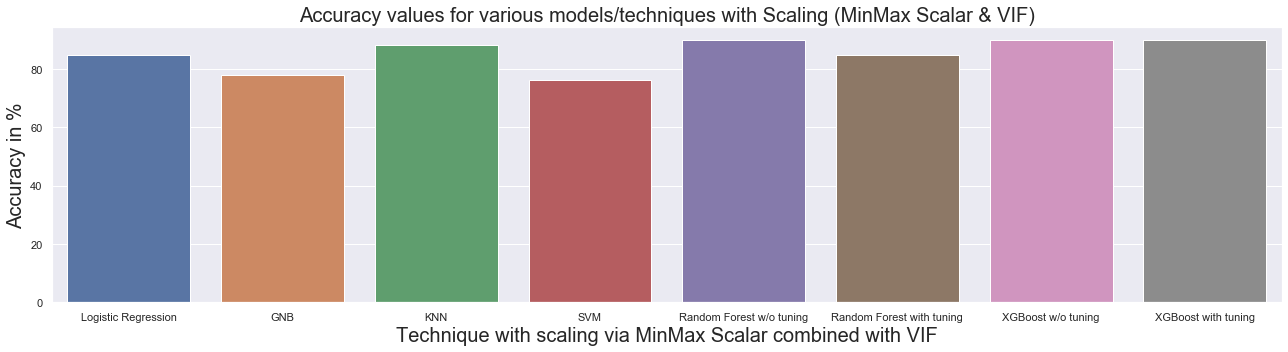

In [657]:
fig = plt.figure(figsize = (18,5))
plt.title ('Accuracy values for various models/techniques with Scaling (MinMax Scalar & VIF)',y=1, size = 20)

sns.barplot(y = resultsdf_minmax_VIF['Accuracy(%)'], x = resultsdf_minmax_VIF['Method_scaling(MinMax Scalar with VIF)'] );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique with scaling via MinMax Scalar combined with VIF', size = 20)
plt.tight_layout()

<font color = blue>
    
- Compareing the XGBoost model without tuning and with tuning, the test accuracy remained same, however a little increase in f1-score is observed with a decrease of FN value by 2. This accuracy and f-score gives us the best model after tuning which is totally free from overfiting.  
    
- It can also be observed that, the maximum accuracy has been attained by Random Forest and XGBoost which is around 89%. Whereas the training accuracy for both the Random Forest and XGBoost is 100%, straight way it signifies the overfitting of model with inclusion of noise. Hence to avoid such kind of complexity, we have tuned these two models, after tuning, we have 84% & 89% accuracy for Random Forest & XGBoost models respectively, hence, the maximum accuracy has been attained XGBoost model as 89% followed by KNN model followed by Random Forest after performing the feature engineering with the help of VIF score and p1-score.

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 9. Observations / Conclusion / Comments
<a id='C'></a>

<Span style="font-family: Arial;font-size:0.8 em;color:darkgreen;">


> Here, we have tried to study the data pattern and correlation among all the features with the help of various kind of plots like univariate, bivariate and multivariate plots. To check the skewness and spread of the data points for each features Violin plots and box plots were also drawn. In-addition, skewness matrix has also been checked to have a clear idea on degree of skewness. From boxplots, presence of outliers were witnessed and to nullify the effect of outliers scaling has been done with the help of Z-score. To check the correlation between the feature columns pair plot, correlation matrix and correlation heat map also been drawn. Those above three plots/matrix clearly indicated a strong correlation or the multicollinearity between many features. In fact some of the features were seen to be duplicated of one another. To treat such kind of problems VIF and p-score were taken into consideration while calculating the accuracy values and f1-score of various models.


> To calculate classification results various methodologies were imputed such as some standard classification methodologies (Logistic Regression, GNB, KNN, and SVM), some Standard Ensemble Models (Random Forest and XGBoost) and Stacking methodology using sub classifier and Meta classifiers.

> The classification results were computed with the confusion matrix metric, in terms of true positive (TP), True negative (TN), False Positive (FP), False Negative (FN). Based on the confusion matrix, the parameters of overall Accuracy, Recall / Sensitivity / TPR, Precision and F1-score were calculated as:&nbsp;


$$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$ 
&nbsp;

$$ Recall /  Sensitivity /  TPR = \frac{TP}{TP + FN}$$ 
&nbsp;

$$ Precision = \frac{TP}{TP + FP}$$ 
&nbsp;

$$ f1-score = \frac{2 * Recall * Precision}{Recall + Precision}$$ 
&nbsp;

> To ensure the highest accuracy with f1-score, various scaling methodologies were adopted for feature engineering process, such as Standardisation, Normalisation, VIF, p-value (Statistical Significance) etc...


<font color = tiel>

### Comparing Overall Accuracy of various models graphically......

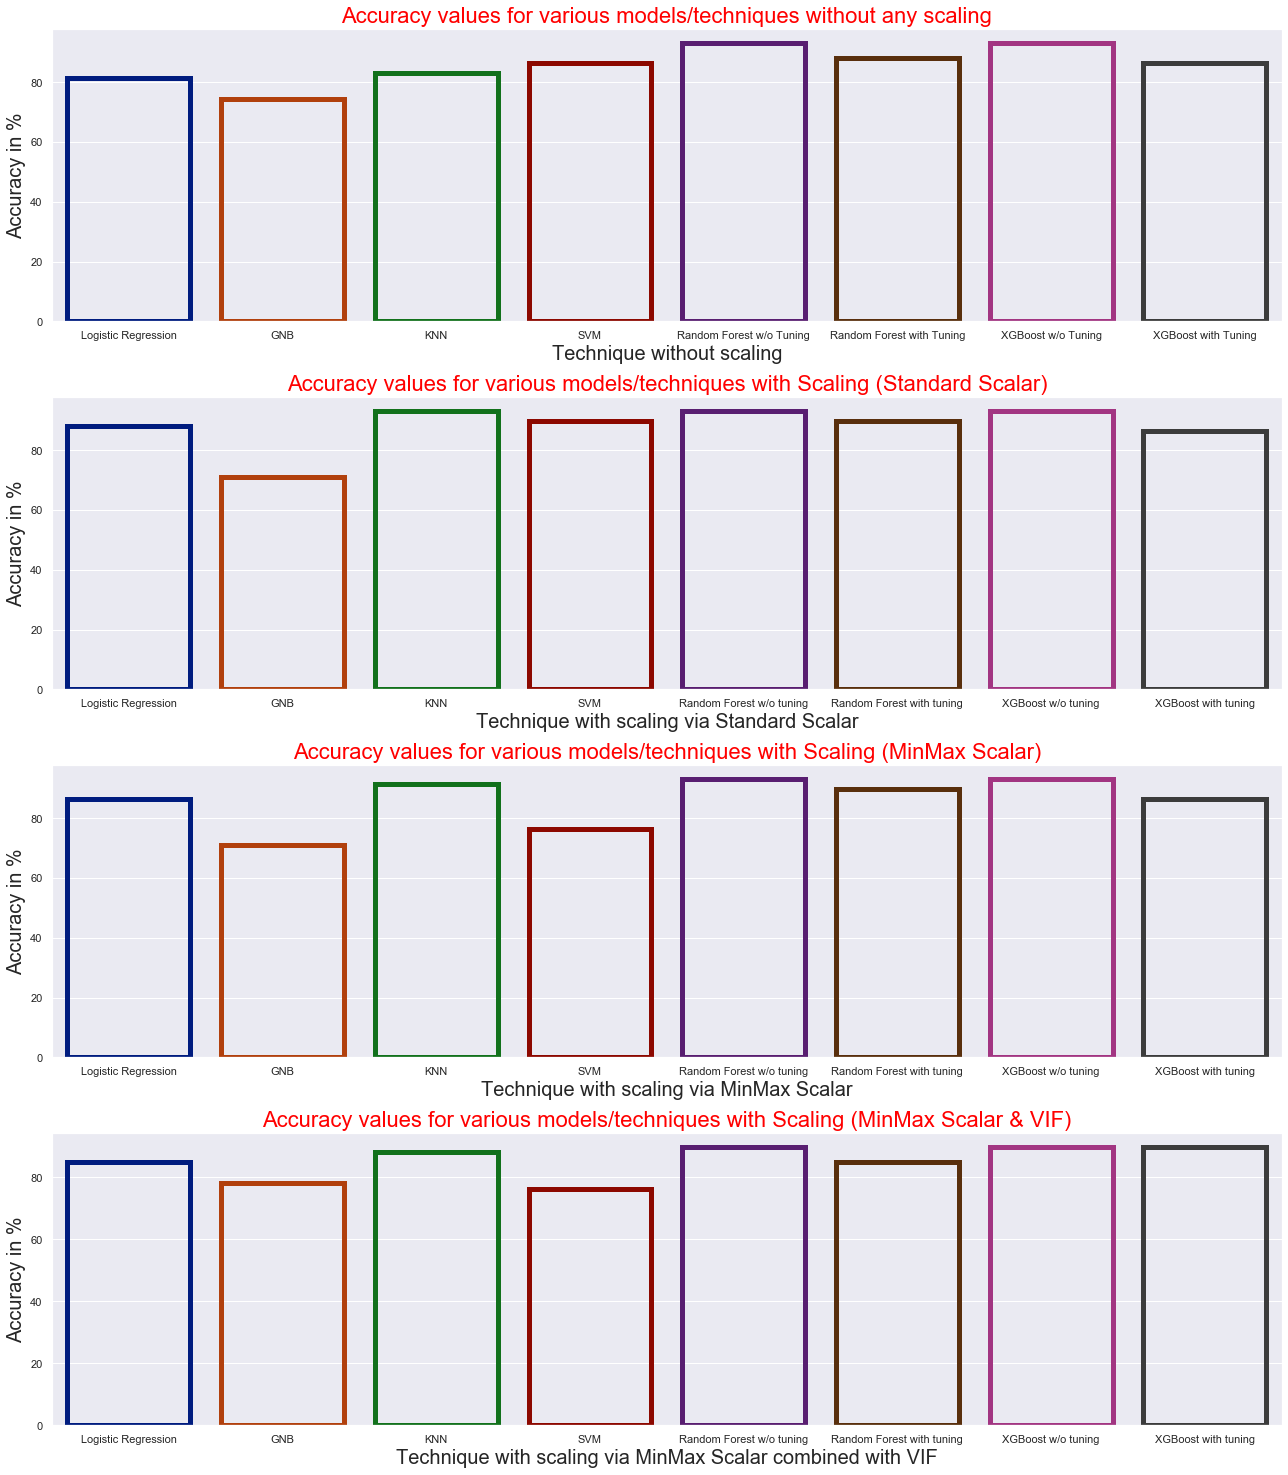

In [658]:
fig = plt.figure(figsize = (18,20))


plt.subplot(4,1,1)
plt.title ('Accuracy values for various models/techniques without any scaling',y=1, size = 22, color = 'red')

sns.barplot(y = resultsdf['Accuracy (%)'], x = resultsdf['Technique w/o scaling'], facecolor = (0,1,0,0), linewidth = 5, edgecolor = sns.color_palette ('dark', 9) );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique without scaling', size = 20)
plt.tight_layout()


plt.subplot(4,1,2)
plt.title ('Accuracy values for various models/techniques with Scaling (Standard Scalar)',y=1, size = 22, color = 'red')

sns.barplot(y = resultsdf_scale1['Accuracy(%)'], x = resultsdf_scale1['Method_scaling(Std. Scalar)'], facecolor = (0,1,0,0), linewidth = 5, edgecolor = sns.color_palette ('dark', 9) );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique with scaling via Standard Scalar', size = 20)
plt.tight_layout()

plt.subplot(4,1,3)
plt.title ('Accuracy values for various models/techniques with Scaling (MinMax Scalar)',y=1, size = 22, color = 'red')

sns.barplot(y = resultsdf_minmax['Accuracy(%)'], x = resultsdf_minmax['Method_scaling(MinMax Scalar)'], facecolor = (0,1,0,0), linewidth = 5, edgecolor = sns.color_palette ('dark', 9));

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique with scaling via MinMax Scalar', size = 20)
plt.tight_layout()

plt.subplot(4,1,4)
plt.title ('Accuracy values for various models/techniques with Scaling (MinMax Scalar & VIF)',y=1, size = 22, color = 'red')

sns.barplot(y = resultsdf_minmax_VIF['Accuracy(%)'],x = resultsdf_minmax_VIF['Method_scaling(MinMax Scalar with VIF)'], facecolor = (0,1,0,0), linewidth = 5, edgecolor = sns.color_palette ('dark', 9) );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Technique with scaling via MinMax Scalar combined with VIF', size = 20);


<font color = green>

From the above bar plot, below interpretation were drawn;
- Out of all the models Random Forest Classifier and XGBoost Classifier models have maximum accuracy 100% for training set and around 93% for testing set, this is because of the overfitting of models means the models contains noise during the training. This kind of situation also signifies the low bias and high variance. this problem of overfitting has been sidesteped by tuning the hyperparameter. and this hyper parameter tuning gave almost similar accuracy for both training and testing sets.

> For the case, where we have not performed any kind of scaling, 

>> Accuracy: 
- Random Forest (88%) > XGBoost & SVM (86%)  > KNN (83%)  > Logistic Regression  (81%) > GNB (74%)

>> F1-score:
- XGBoost (0.96)> Random Forest (0.93) > SVM (0.92) > KNN (0.89) > Logistic Regression (0.88) > GNB (0.8)

>> FN value :
- SVM (0) < Random Forest (1) < XGBoost (2) < KNN & LR (3) < GNB (15)

> For the case scaling with Standard Scalar,

>> Accuracy: 
- KNN (93%) > Random Forest & SVM (89%) > Logistic Regression (88%)> XGBoost (86%)   > GNB (71%)

>> F1-score:
- KNN (0.96) > Random Forest (0.94) & SVM (0.94) )> Logistic Regression (0.92)  > XGBoost (0.91) > GNB (0.77)

>> FN value:
- SVM (0) & Random Forest (0) < XGBoost (2) & KNN & LR (2) < GNB (16)

> For the case scaling with MinMax Scalar, 

>> Accuracy: 
- KNN (91%) > Random Forest (89%)  > Logistic Regression (86%) & XGBoost (86%) > SVM (76%)   > GNB (71%)

>> F1-score:
- KNN (0.95) > Random Forest (0.94) > Logistic Regression (0.92)   > XGBoost (0.91) > SVM (0.87) > GNB (0.77)

>> FN value:
- SVM & LR & Random Forest (0) < KNN (1) < XGBoost (2) < GNB (16)


> For the case scaling with VIF & MinMax Scalar, 

>> Accuracy: 
- XGBoost (89%) > KNN (88%) > Random Forest (84%) & Logistic Regression (84%) > GNB (77%) > SVM (76%)  

>> F1-score:
- XGBoost (0.94) > KNN (0.92) > Random Forest (0.91) &Logistic Regression (0.91)   > SVM (0.87) > GNB (0.86)

>> FN value:
- SVM (0) < LR (1) &  XGBoost (1)  < Random Forest (2) & KNN (2) < GNB (06)


<font color = purple>

> - Random Forest is the best model to predict the Parkinson's Dieses from the Voice Records of Patients, when we don't scale the data. 
- Support Vector Machine & Random Forest followed by KNN model are the best models to predict the Parkinson's Dieses from the Voice Records of Patients, when we scale the data with the help of Standard Scalar. 
- Random Forest followed by KNN are the two best models to predict the Parkinson's Dieses from the Voice Records of Patients, when we scale the data with the help of MinMaxScalar. 
- XGBoost is the best model to predict the Parkinson's Dieses from the Voice Records of Patients, when we scale the data with the help of VIF & MinMax Scalar.

> *Note:*
- After imputing VIF and p-value to check the Variable inflation rate, we have deleted lot of columns, which in turn decreased the accuracy and f1 score of most of the models. Further improvements can be done to enhance the accuracy and f1-score while retaining the same FN value.

<font color = blue>

> Stacking - In this method, we used 10-fold and 3-flod cross validation techniques to test the generalization capability of classification method. These two CV techniques first divided the entire set of 105 vocal instances into 10 and 3 disjoint subsets i.e. 19.5 and 65 in each subsets respectively. In each validation procedure, one subset was selected for testing, and the remaining subsets were used for training the classifiers. Such validation steps were carried out repeatedly until all 10 or 3 subsets had been tested for pattern classification.

<font color = green>

> The present work also has some limitation. The correlations between a numbers of vocal parameters limit the performance improvement of classifiers. In addition, the current voice dataset with a relative small size (195 records) limits the further study and analysis of vocal parameters and patterns, as well as the effectiveness of all classifiers. Classification performance of some of the models or techniques still needs to be evaluated with a much larger data and with more feature engineering concepts.

## <span style="font-family: Algerian; font-weight:bold;font-size:1 em;color:Red; center">      THE END